In [2]:
!pip install torch torch-geometric
!pip install rdkit
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import MoleculeNet
from torch_geometric.nn import GCNConv, global_mean_pool


Information about BACE dataset

In [ ]:
import pandas as pd
from torch_geometric.datasets import MoleculeNet
from torch_geometric.loader import DataLoader

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

# Get dataset information
data_info = {
    'Number of graphs': len(dataset),
    'Number of features': dataset.num_features,
    'Number of classes': dataset.num_classes
}

# Convert the information to a dataframe
df_info = pd.DataFrame([data_info])
print("BACE Dataset Information:")
print(df_info)

# Display first few samples to get a sense of the data
loader = DataLoader(dataset, batch_size=32, shuffle=True)
first_batch = next(iter(loader))

# Debug: Print out the structure of the first_batch
print("First Batch Type:", type(first_batch))
print("First Batch Content:", first_batch)

# Attempt to access attributes
if isinstance(first_batch, tuple):
    first_batch = first_batch[0]

try:
    batch_data = {
        'node_features': [data.x.tolist() for data in first_batch],
        'edge_index': [data.edge_index.tolist() for data in first_batch],
        'labels': [data.y.tolist() for data in first_batch]
    }

    df_samples = pd.DataFrame(batch_data)
    print("BACE Dataset Sample:")
    print(df_samples)
except AttributeError as e:
    print("Error:", e)
    print("Attributes of first item in first_batch:", dir(first_batch[0]))
    if hasattr(first_batch[0], 'x'):
        print("Node features (x):", first_batch[0].x)
    if hasattr(first_batch[0], 'edge_index'):
        print("Edge indices (edge_index):", first_batch[0].edge_index)
    if hasattr(first_batch[0], 'y'):
        print("Labels (y):", first_batch[0].y)


BACE Dataset Information:
   Number of graphs  Number of features  Number of classes
0              1513                   9                  2
First Batch Type: <class 'torch_geometric.data.batch.DataBatch'>
First Batch Content: DataBatch(x=[1087, 9], edge_index=[2, 2368], edge_attr=[2368, 3], smiles=[32], y=[32, 1], batch=[1087], ptr=[33])
Error: 'tuple' object has no attribute 'x'
Attributes of first item in first_batch: ['__annotations__', '__call__', '__cat_dim__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__inc__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_edge_attr

In [ ]:
import pandas as pd
from torch_geometric.datasets import MoleculeNet
from torch_geometric.loader import DataLoader

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

# Get dataset information
data_info = {
    'Number of graphs': len(dataset),
    'Number of features': dataset.num_features,
    'Number of classes': dataset.num_classes
}

# Convert the information to a dataframe
df_info = pd.DataFrame([data_info])
print("BACE Dataset Information:")
print(df_info)

# Display first few samples to get a sense of the data
loader = DataLoader(dataset, batch_size=32, shuffle=True)
first_batch = next(iter(loader))

# Print out the structure of the first_batch
print("First Batch Type:", type(first_batch))
print("First Batch Content:", first_batch)

# Function to inspect the batch data
def inspect_batch(data_batch):
    if isinstance(data_batch, tuple):
        data_batch = data_batch[0]

    node_features = data_batch.x.tolist()
    edge_index = data_batch.edge_index.tolist()
    labels = data_batch.y.tolist()

    print("Node Features Length:", len(node_features))
    print("Edge Index Length:", len(edge_index))
    print("Labels Length:", len(labels))

    return node_features, edge_index, labels

# Inspect the first batch
node_features, edge_index, labels = inspect_batch(first_batch)

# Display the first few node features, edge indices, and labels to understand their structure
print("\nNode Features (first 5):", node_features[:5])
print("\nEdge Index (first 5):", edge_index[:5])
print("\nLabels (first 5):", labels[:5])

# Convert node features and labels to DataFrames for detailed inspection
df_node_features = pd.DataFrame(node_features)
df_labels = pd.DataFrame(labels)

print("\nNode Features DataFrame:")
print(df_node_features.head())

print("\nLabels DataFrame:")
print(df_labels.head())

# Check statistics
print("\nNode Features Statistics:")
print(df_node_features.describe())

print("\nLabels Statistics:")
print(df_labels.describe())


Upload pretraining model weights

In [4]:
from google.colab import files
file = files.upload()

Saving pretraining_model1.pth to pretraining_model1.pth
Saving pretraining_model2.pth to pretraining_model2.pth
Saving pretraining_model3.pth to pretraining_model3.pth
Saving pretraining_model4.pth to pretraining_model4.pth
Saving pretraining_model5.pth to pretraining_model5.pth
Saving pretraining_model6.pth to pretraining_model6.pth


In [6]:
import os
# Create a directory for the pretrained models
os.makedirs('pretrained_models', exist_ok=True)

# Save the uploaded files to the directory
for filename in file.keys():
    with open(os.path.join('pretrained_models', filename), 'wb') as f:
        f.write(file[filename])

# List the files to verify
print(os.listdir('pretrained_models'))

['pretraining_model6.pth', 'pretraining_model2.pth', 'pretraining_model1.pth', 'pretraining_model4.pth', 'pretraining_model3.pth', 'pretraining_model5.pth']


Check pretrained model weight

In [11]:
import torch

# Load the pretrained model file
model_path = 'pretrained_models/pretraining_model2.pth'
pretrained_state_dict = torch.load(model_path, map_location='cpu')

# Print the keys in the state dictionary to understand the contents
for key, value in pretrained_state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")


x_embedding1.weight: torch.Size([120, 300])
x_embedding2.weight: torch.Size([3, 300])
gnns.0.mlp.0.weight: torch.Size([600, 300])
gnns.0.mlp.0.bias: torch.Size([600])
gnns.0.mlp.2.weight: torch.Size([300, 600])
gnns.0.mlp.2.bias: torch.Size([300])
gnns.0.edge_embedding1.weight: torch.Size([6, 300])
gnns.0.edge_embedding2.weight: torch.Size([3, 300])
gnns.1.mlp.0.weight: torch.Size([600, 300])
gnns.1.mlp.0.bias: torch.Size([600])
gnns.1.mlp.2.weight: torch.Size([300, 600])
gnns.1.mlp.2.bias: torch.Size([300])
gnns.1.edge_embedding1.weight: torch.Size([6, 300])
gnns.1.edge_embedding2.weight: torch.Size([3, 300])
gnns.2.mlp.0.weight: torch.Size([600, 300])
gnns.2.mlp.0.bias: torch.Size([600])
gnns.2.mlp.2.weight: torch.Size([300, 600])
gnns.2.mlp.2.bias: torch.Size([300])
gnns.2.edge_embedding1.weight: torch.Size([6, 300])
gnns.2.edge_embedding2.weight: torch.Size([3, 300])
gnns.3.mlp.0.weight: torch.Size([600, 300])
gnns.3.mlp.0.bias: torch.Size([600])
gnns.3.mlp.2.weight: torch.Size([30

1st Trial : normal GNN

Evaluating model with pretraining_model1.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model1.pth
Epoch 0, Train Loss 25.4976, Train Accuracy 0.5686, Val Loss 6.7589, Val Accuracy 0.6106
Epoch 10, Train Loss 22.9465, Train Accuracy 0.6562, Val Loss 5.9436, Val Accuracy 0.6964
Epoch 20, Train Loss 20.9943, Train Accuracy 0.7165, Val Loss 5.6927, Val Accuracy 0.7426
Epoch 30, Train Loss 19.8681, Train Accuracy 0.7397, Val Loss 5.2939, Val Accuracy 0.7393
Epoch 40, Train Loss 19.2204, Train Accuracy 0.7579, Val Loss 5.0881, Val Accuracy 0.7591
Epoch 50, Train Loss 18.4063, Train Accuracy 0.7736, Val Loss 5.0708, Val Accuracy 0.7690
Epoch 60, Train Loss 18.9606, Train Accuracy 0.7579, Val Loss 5.0751, Val Accuracy 0.7690
Epoch 70, Train Loss 18.5351, Train Accuracy 0.7686, Val Loss 5.1412, Val Accuracy 0.7690
Epoch 80, Train Loss 18.9988, Train Accuracy 0.7562, Val Loss 4.9909, Val Accuracy 0.7690
Epoch 90, Train Loss 18.5206, Train Accuracy 0.7628, V

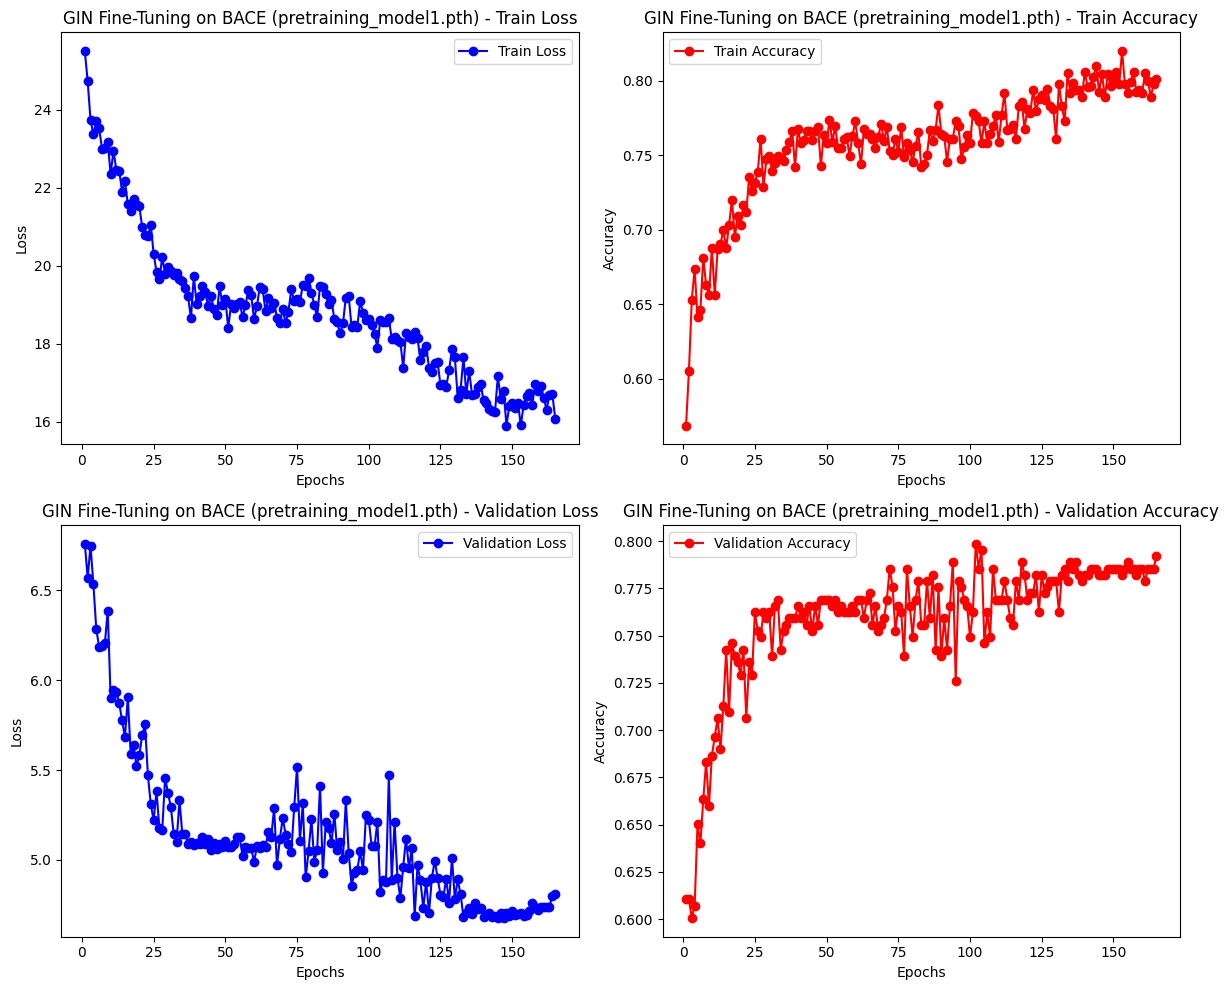

Evaluating model with pretraining_model2.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model2.pth
Epoch 0, Train Loss 25.2396, Train Accuracy 0.5876, Val Loss 6.5881, Val Accuracy 0.5941
Epoch 10, Train Loss 22.2160, Train Accuracy 0.6992, Val Loss 6.0872, Val Accuracy 0.6865
Epoch 20, Train Loss 20.3788, Train Accuracy 0.7331, Val Loss 5.4868, Val Accuracy 0.7426
Epoch 30, Train Loss 19.6851, Train Accuracy 0.7521, Val Loss 5.2468, Val Accuracy 0.7459
Epoch 40, Train Loss 18.9299, Train Accuracy 0.7570, Val Loss 5.1903, Val Accuracy 0.7459
Epoch 50, Train Loss 19.3102, Train Accuracy 0.7595, Val Loss 5.2116, Val Accuracy 0.7624
Epoch 60, Train Loss 18.7791, Train Accuracy 0.7636, Val Loss 5.2558, Val Accuracy 0.7459
Epoch 70, Train Loss 18.6066, Train Accuracy 0.7636, Val Loss 4.9848, Val Accuracy 0.7657
Epoch 80, Train Loss 19.2036, Train Accuracy 0.7570, Val Loss 5.5035, Val Accuracy 0.7360
Epoch 90, Train Loss 18.6527, Train Accuracy 0.7860, V

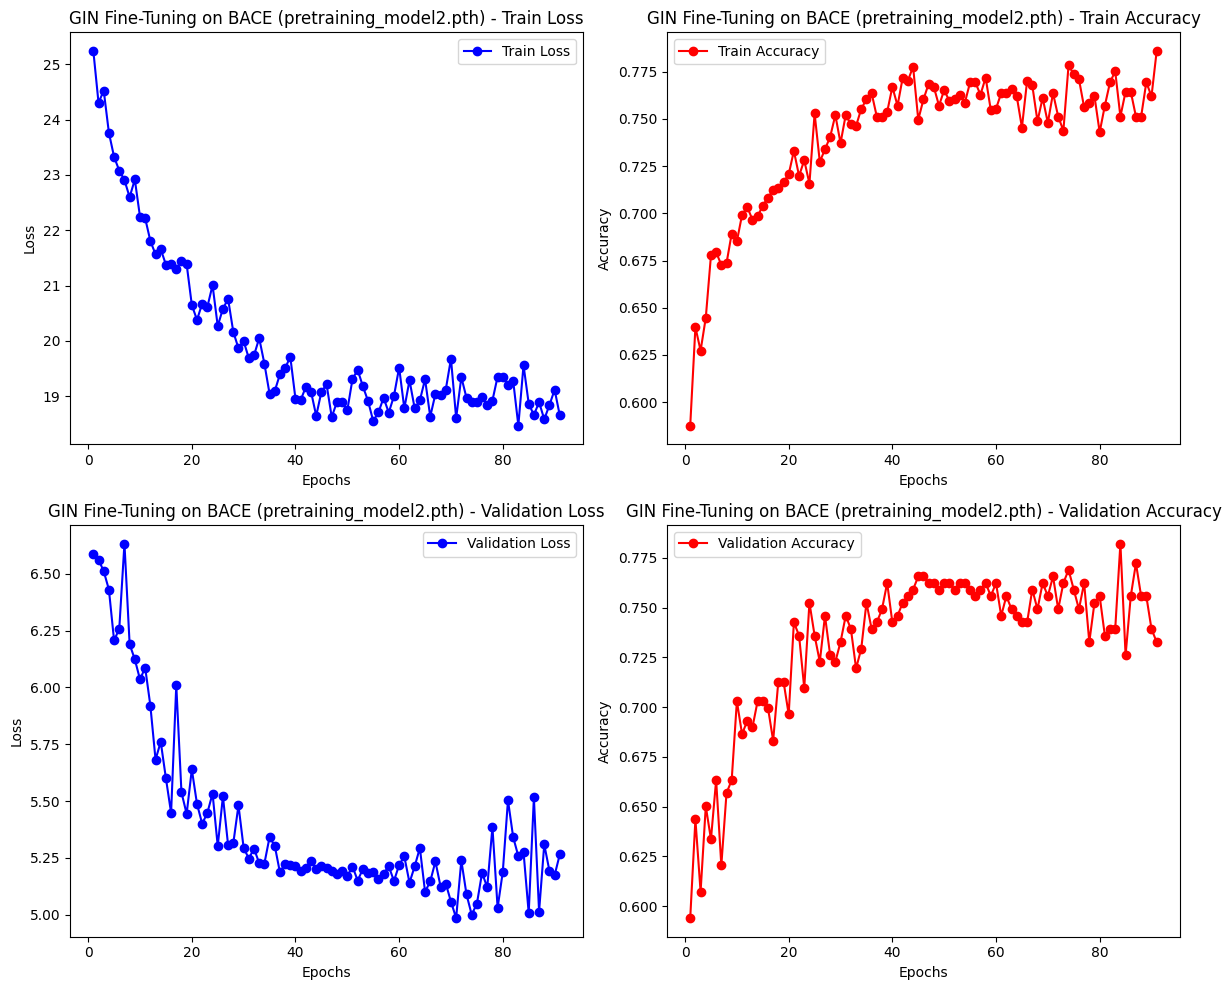

Evaluating model with pretraining_model3.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model3.pth
Epoch 0, Train Loss 25.4073, Train Accuracy 0.5793, Val Loss 6.6036, Val Accuracy 0.5941
Epoch 10, Train Loss 21.9455, Train Accuracy 0.7008, Val Loss 5.9650, Val Accuracy 0.6865
Epoch 20, Train Loss 21.1178, Train Accuracy 0.7074, Val Loss 5.5296, Val Accuracy 0.7195
Epoch 30, Train Loss 20.1150, Train Accuracy 0.7339, Val Loss 5.3413, Val Accuracy 0.7360
Epoch 40, Train Loss 18.7439, Train Accuracy 0.7636, Val Loss 5.2021, Val Accuracy 0.7492
Epoch 50, Train Loss 19.0358, Train Accuracy 0.7669, Val Loss 5.2005, Val Accuracy 0.7393
Epoch 60, Train Loss 19.3981, Train Accuracy 0.7430, Val Loss 5.1704, Val Accuracy 0.7426
Epoch 70, Train Loss 18.3422, Train Accuracy 0.7702, Val Loss 5.2502, Val Accuracy 0.7327
Epoch 80, Train Loss 19.4293, Train Accuracy 0.7521, Val Loss 5.1023, Val Accuracy 0.7492
Epoch 90, Train Loss 19.2550, Train Accuracy 0.7512, V

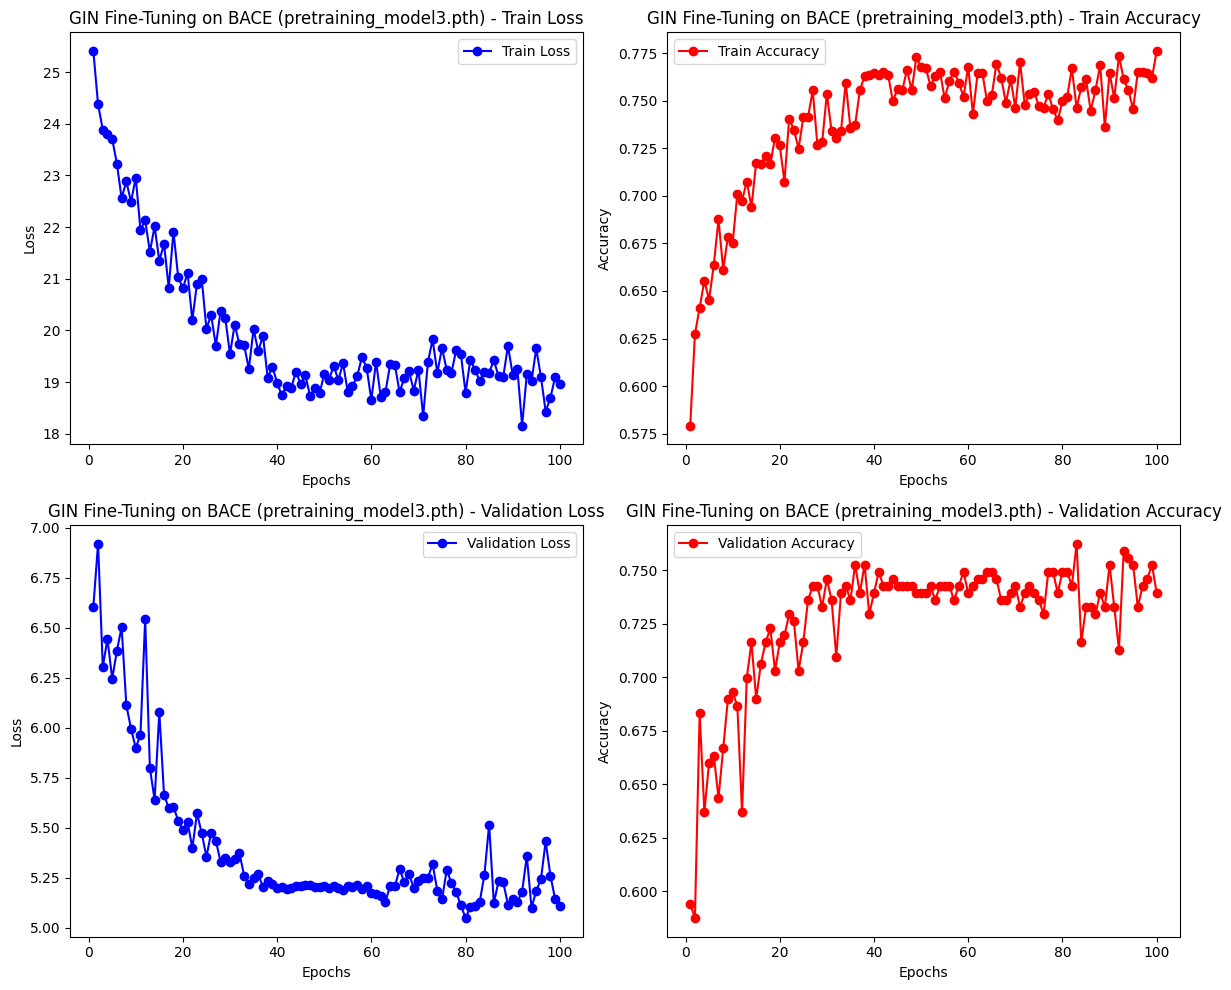

Evaluating model with pretraining_model4.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model4.pth
Epoch 0, Train Loss 25.5140, Train Accuracy 0.5612, Val Loss 6.7045, Val Accuracy 0.5974
Epoch 10, Train Loss 22.7814, Train Accuracy 0.6744, Val Loss 5.9220, Val Accuracy 0.6832
Epoch 20, Train Loss 21.4718, Train Accuracy 0.7066, Val Loss 5.3484, Val Accuracy 0.7294
Epoch 30, Train Loss 20.0476, Train Accuracy 0.7430, Val Loss 5.2224, Val Accuracy 0.7723
Epoch 40, Train Loss 18.5452, Train Accuracy 0.7570, Val Loss 5.1156, Val Accuracy 0.7492
Epoch 50, Train Loss 19.4761, Train Accuracy 0.7496, Val Loss 5.0645, Val Accuracy 0.7492
Epoch 60, Train Loss 19.0613, Train Accuracy 0.7612, Val Loss 5.0955, Val Accuracy 0.7591
Epoch 70, Train Loss 18.8285, Train Accuracy 0.7678, Val Loss 5.2103, Val Accuracy 0.7690
Epoch 80, Train Loss 19.2605, Train Accuracy 0.7554, Val Loss 5.1506, Val Accuracy 0.7756
Epoch 90, Train Loss 19.4991, Train Accuracy 0.7463, V

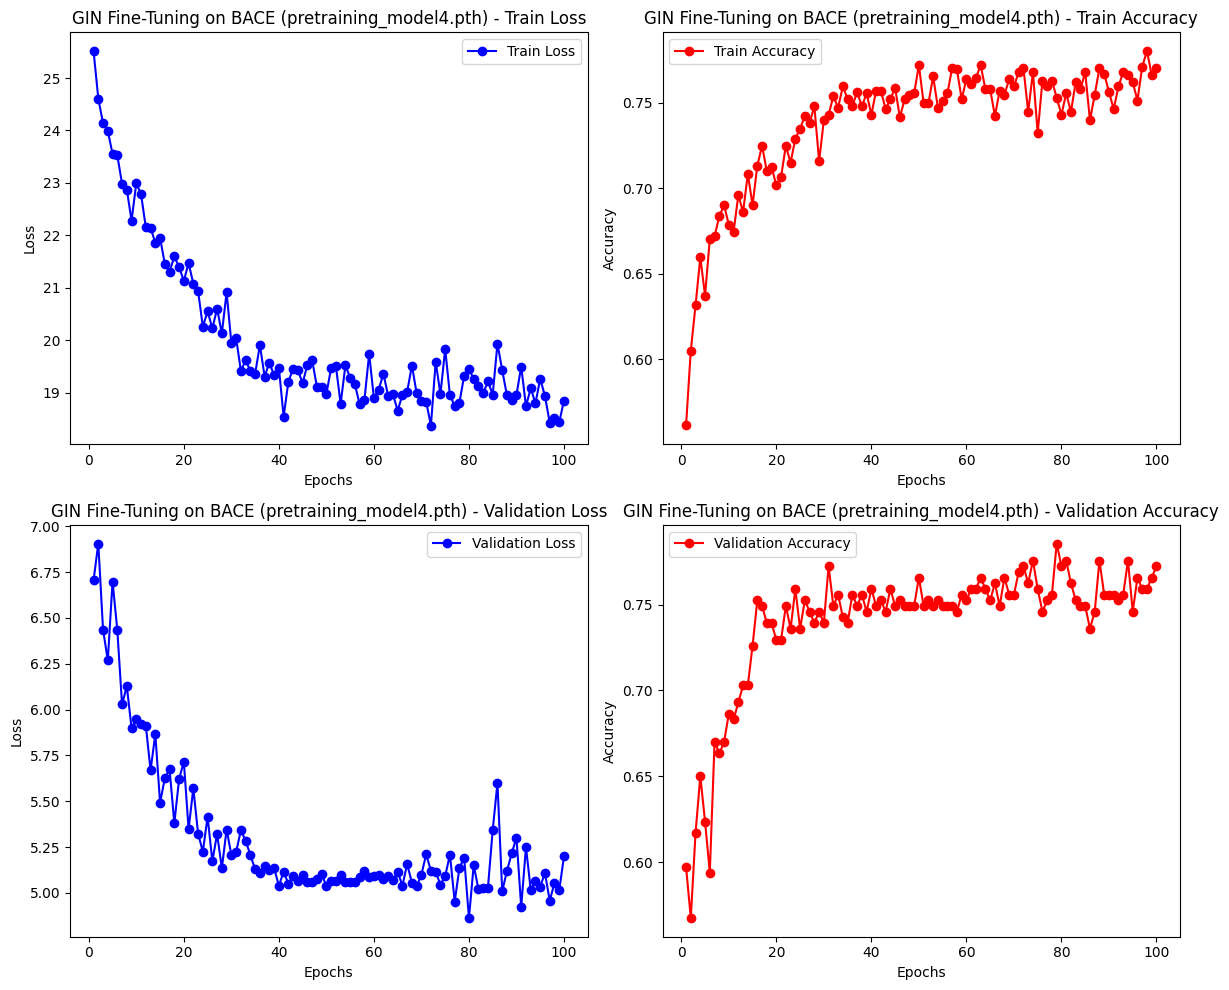

Evaluating model with pretraining_model5.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model5.pth
Epoch 0, Train Loss 25.2655, Train Accuracy 0.6033, Val Loss 6.8206, Val Accuracy 0.6271
Epoch 10, Train Loss 22.1942, Train Accuracy 0.6818, Val Loss 5.7941, Val Accuracy 0.6931
Epoch 20, Train Loss 20.5528, Train Accuracy 0.7248, Val Loss 5.4206, Val Accuracy 0.7393
Epoch 30, Train Loss 19.6842, Train Accuracy 0.7554, Val Loss 5.1403, Val Accuracy 0.7492
Epoch 40, Train Loss 19.0273, Train Accuracy 0.7562, Val Loss 5.1286, Val Accuracy 0.7492
Epoch 50, Train Loss 18.9916, Train Accuracy 0.7595, Val Loss 5.0690, Val Accuracy 0.7492
Epoch 60, Train Loss 18.5965, Train Accuracy 0.7669, Val Loss 5.0597, Val Accuracy 0.7591
Epoch 70, Train Loss 18.6682, Train Accuracy 0.7686, Val Loss 5.0781, Val Accuracy 0.7591
Epoch 80, Train Loss 18.6959, Train Accuracy 0.7661, Val Loss 5.4293, Val Accuracy 0.7393
Epoch 90, Train Loss 18.8575, Train Accuracy 0.7818, V

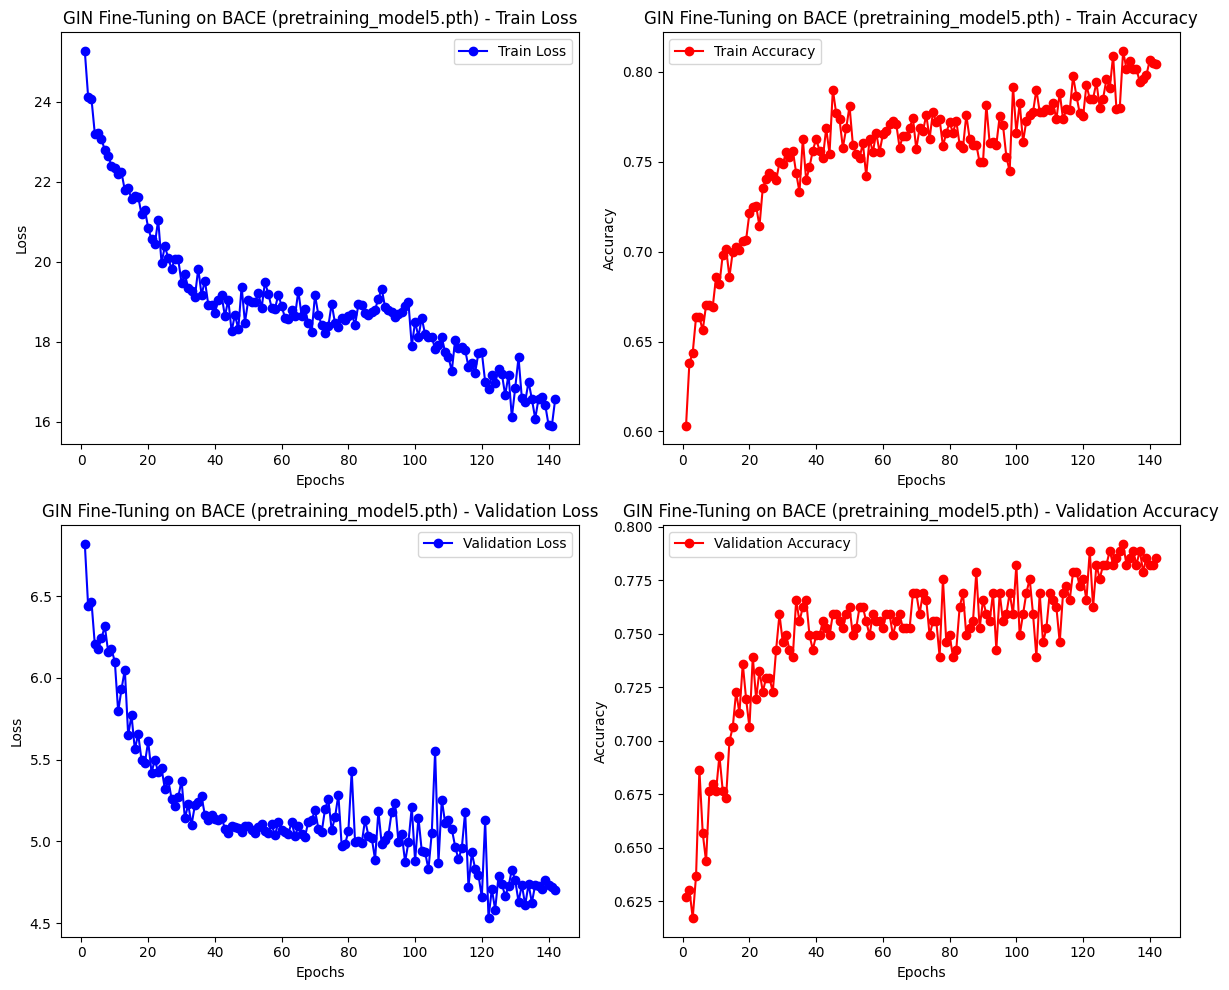

Evaluating model with pretraining_model6.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model6.pth
Epoch 0, Train Loss 25.3053, Train Accuracy 0.5802, Val Loss 6.6357, Val Accuracy 0.6238
Epoch 10, Train Loss 22.2724, Train Accuracy 0.6835, Val Loss 5.9748, Val Accuracy 0.6865
Epoch 20, Train Loss 20.6400, Train Accuracy 0.7322, Val Loss 5.2351, Val Accuracy 0.7426
Epoch 30, Train Loss 19.6631, Train Accuracy 0.7521, Val Loss 5.2124, Val Accuracy 0.7426
Epoch 40, Train Loss 18.7871, Train Accuracy 0.7653, Val Loss 5.1164, Val Accuracy 0.7558
Epoch 50, Train Loss 18.5463, Train Accuracy 0.7686, Val Loss 5.1339, Val Accuracy 0.7657
Epoch 60, Train Loss 18.7868, Train Accuracy 0.7620, Val Loss 5.1292, Val Accuracy 0.7624
Epoch 70, Train Loss 18.4105, Train Accuracy 0.7777, Val Loss 5.0488, Val Accuracy 0.7690
Epoch 80, Train Loss 18.7870, Train Accuracy 0.7595, Val Loss 5.0576, Val Accuracy 0.7591
Epoch 90, Train Loss 18.8452, Train Accuracy 0.7603, V

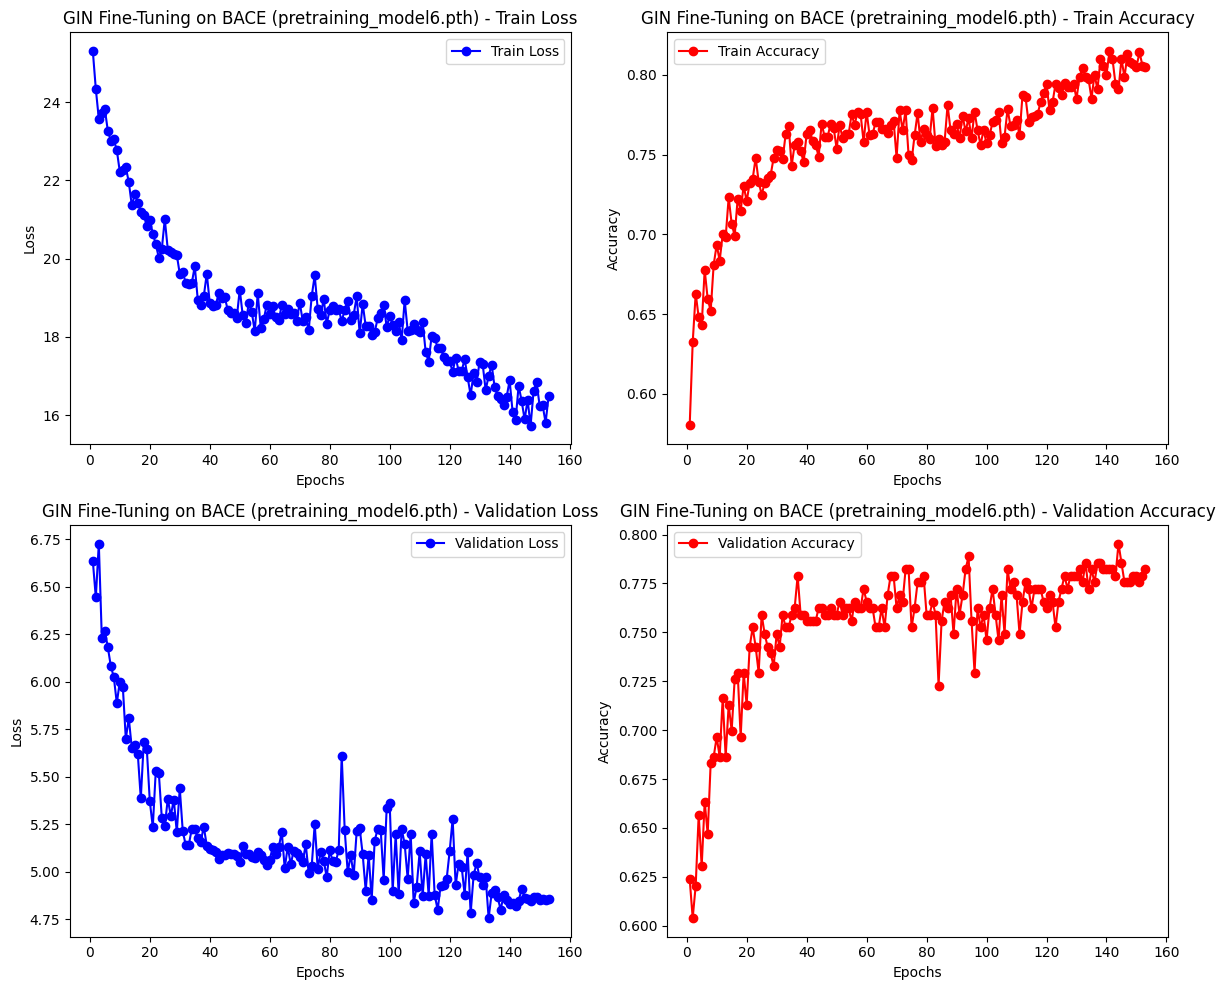

Results for pretraining_model1.pth:
  Final Training Loss: 16.0840
  Final Training Accuracy: 0.8008
  Final Validation Loss: 4.8082
  Final Validation Accuracy: 0.7921
Results for pretraining_model2.pth:
  Final Training Loss: 18.6527
  Final Training Accuracy: 0.7860
  Final Validation Loss: 5.2651
  Final Validation Accuracy: 0.7327
Results for pretraining_model3.pth:
  Final Training Loss: 18.9712
  Final Training Accuracy: 0.7760
  Final Validation Loss: 5.1101
  Final Validation Accuracy: 0.7393
Results for pretraining_model4.pth:
  Final Training Loss: 18.8522
  Final Training Accuracy: 0.7702
  Final Validation Loss: 5.1996
  Final Validation Accuracy: 0.7723
Results for pretraining_model5.pth:
  Final Training Loss: 16.5668
  Final Training Accuracy: 0.8041
  Final Validation Loss: 4.7009
  Final Validation Accuracy: 0.7855
Results for pretraining_model6.pth:
  Final Training Loss: 16.4802
  Final Training Accuracy: 0.8050
  Final Validation Loss: 4.8580
  Final Validation Acc

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=200, early_stopping_patience=20):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "pretraining_model1.pth": "pretrained_models/pretraining_model1.pth",
    "pretraining_model2.pth": "pretrained_models/pretraining_model2.pth",
    "pretraining_model3.pth": "pretrained_models/pretraining_model3.pth",
    "pretraining_model4.pth": "pretrained_models/pretraining_model4.pth",
    "pretraining_model5.pth": "pretrained_models/pretraining_model5.pth",
    "pretraining_model6.pth": "pretrained_models/pretraining_model6.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6)

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=200
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


2nd Trial : **improvement**
1. Increase the Number of GIN Layers
2. Add Learning Rate scheduler
3. Use AdamW Optimizers
4. Hyperparameter Tuning : learning rate, dropout rate, batch size

Evaluating model with pretraining_model1.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model1.pth
Epoch 0, Train Loss 25.9446, Train Accuracy 0.5512, Val Loss 6.9921, Val Accuracy 0.5281
Epoch 10, Train Loss 22.8193, Train Accuracy 0.6802, Val Loss 5.8440, Val Accuracy 0.6898
Epoch 20, Train Loss 21.0306, Train Accuracy 0.7223, Val Loss 5.8790, Val Accuracy 0.7162
Epoch 30, Train Loss 20.0383, Train Accuracy 0.7314, Val Loss 5.4995, Val Accuracy 0.7492
Epoch 40, Train Loss 19.7424, Train Accuracy 0.7405, Val Loss 5.4304, Val Accuracy 0.7459
Epoch 50, Train Loss 19.5579, Train Accuracy 0.7463, Val Loss 5.3612, Val Accuracy 0.7459
Epoch 60, Train Loss 19.5807, Train Accuracy 0.7545, Val Loss 5.4259, Val Accuracy 0.7558
Epoch 70, Train Loss 19.1948, Train Accuracy 0.7430, Val Loss 5.2534, Val Accuracy 0.7360
Epoch 80, Train Loss 19.4296, Train Accuracy 0.7488, Val Loss 5.3163, Val Accuracy 0.7492
Epoch 90, Train Loss 18.9686, Train Accuracy 0.7785, V

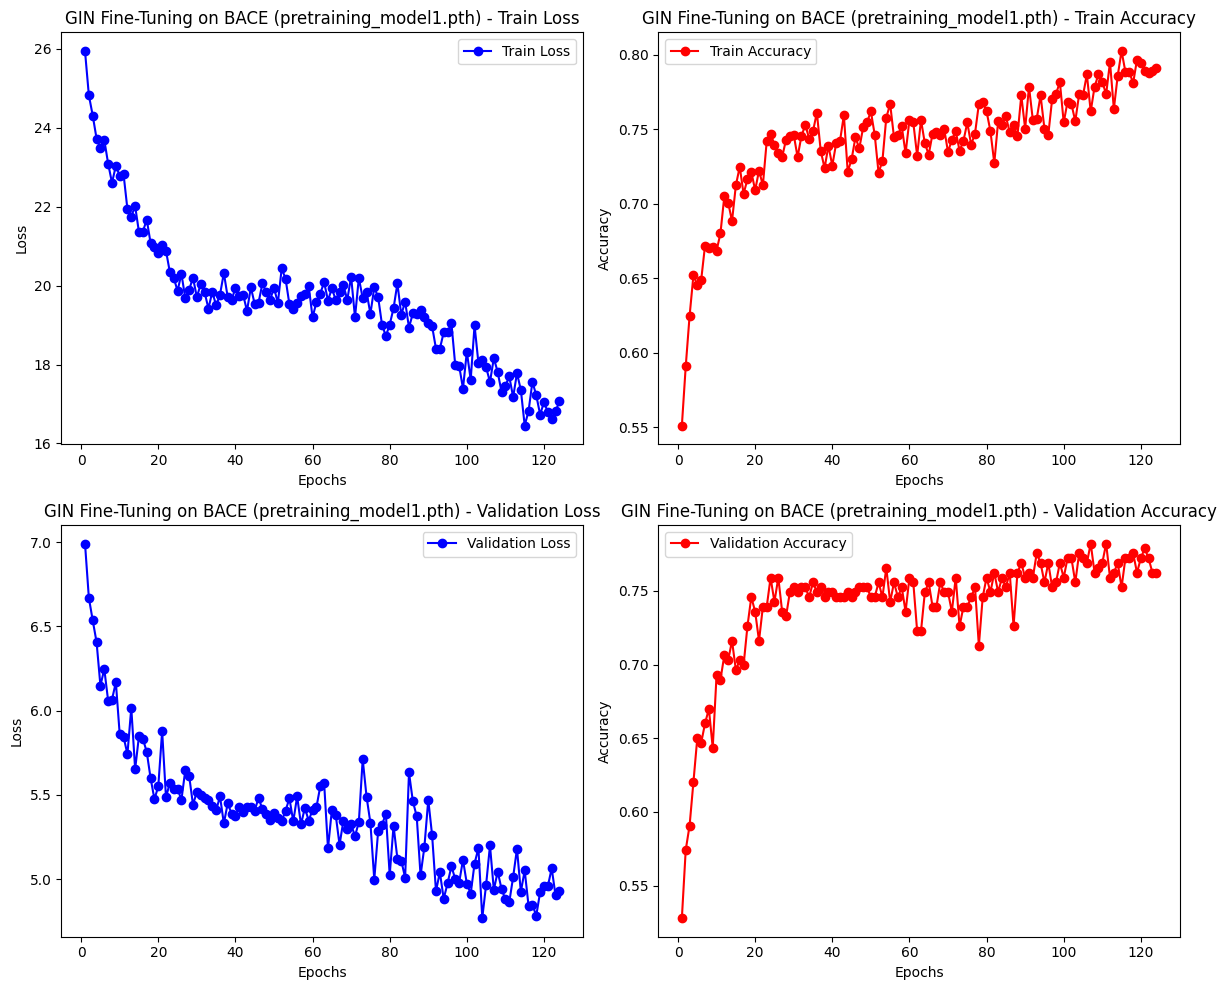

Evaluating model with pretraining_model2.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model2.pth
Epoch 0, Train Loss 25.3965, Train Accuracy 0.5950, Val Loss 6.6859, Val Accuracy 0.5875
Epoch 10, Train Loss 22.4053, Train Accuracy 0.6909, Val Loss 6.0866, Val Accuracy 0.6370
Epoch 20, Train Loss 20.7718, Train Accuracy 0.7207, Val Loss 5.4875, Val Accuracy 0.7261
Epoch 30, Train Loss 19.6359, Train Accuracy 0.7446, Val Loss 5.3480, Val Accuracy 0.7624
Early stopping triggered


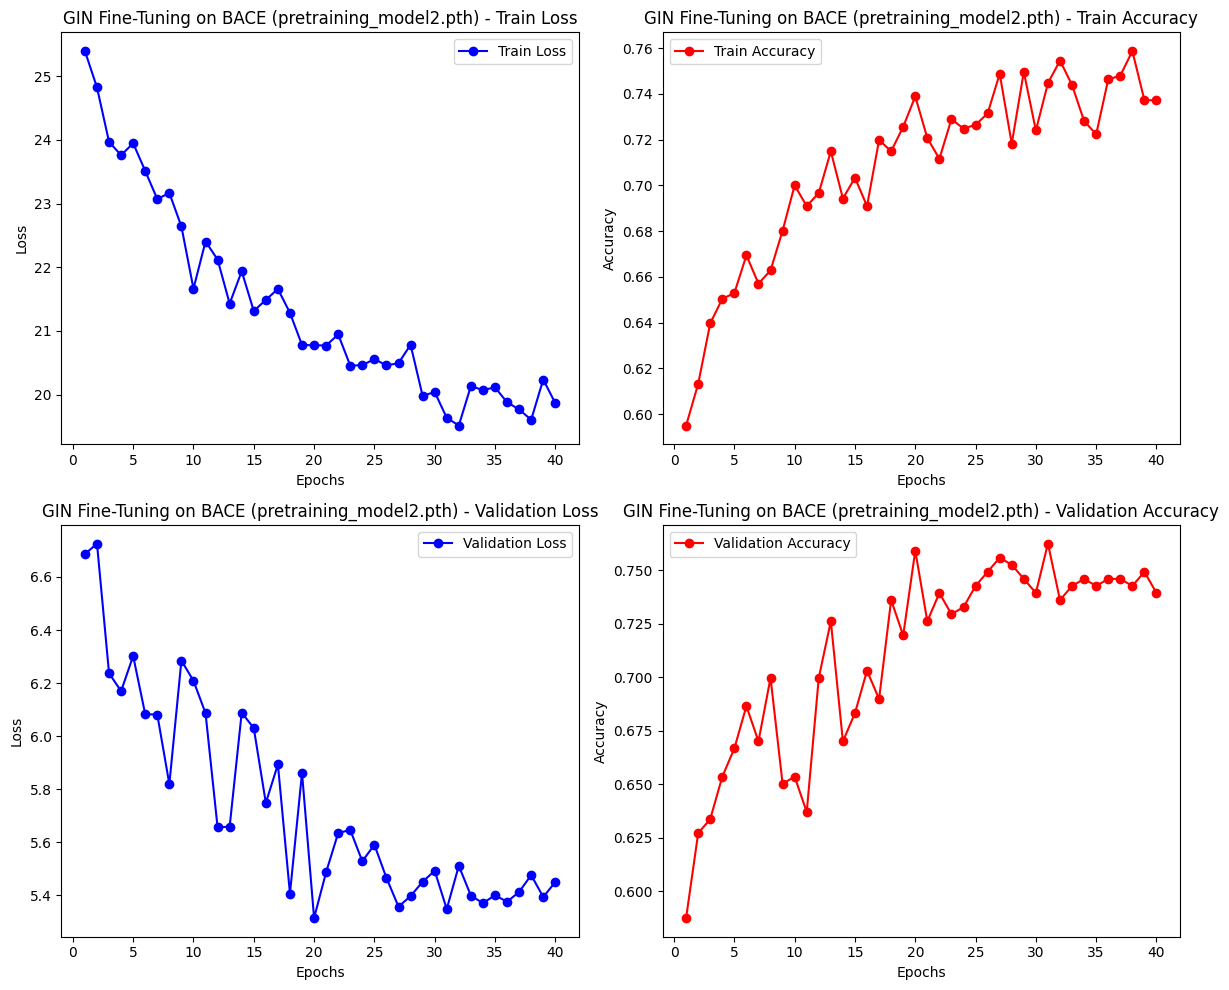

Evaluating model with pretraining_model3.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model3.pth
Epoch 0, Train Loss 25.6574, Train Accuracy 0.5702, Val Loss 6.7177, Val Accuracy 0.6007
Epoch 10, Train Loss 22.7181, Train Accuracy 0.6793, Val Loss 5.9084, Val Accuracy 0.6733
Epoch 20, Train Loss 20.9997, Train Accuracy 0.7190, Val Loss 5.5120, Val Accuracy 0.7162
Epoch 30, Train Loss 20.2737, Train Accuracy 0.7421, Val Loss 5.4087, Val Accuracy 0.7327
Epoch 40, Train Loss 19.8746, Train Accuracy 0.7455, Val Loss 5.3469, Val Accuracy 0.7558
Epoch 50, Train Loss 20.2022, Train Accuracy 0.7355, Val Loss 5.3354, Val Accuracy 0.7525
Epoch 60, Train Loss 19.9274, Train Accuracy 0.7430, Val Loss 5.3678, Val Accuracy 0.7459
Epoch 70, Train Loss 19.4510, Train Accuracy 0.7521, Val Loss 5.5705, Val Accuracy 0.7162
Epoch 80, Train Loss 19.4590, Train Accuracy 0.7512, Val Loss 5.1131, Val Accuracy 0.7393
Epoch 90, Train Loss 18.8378, Train Accuracy 0.7628, V

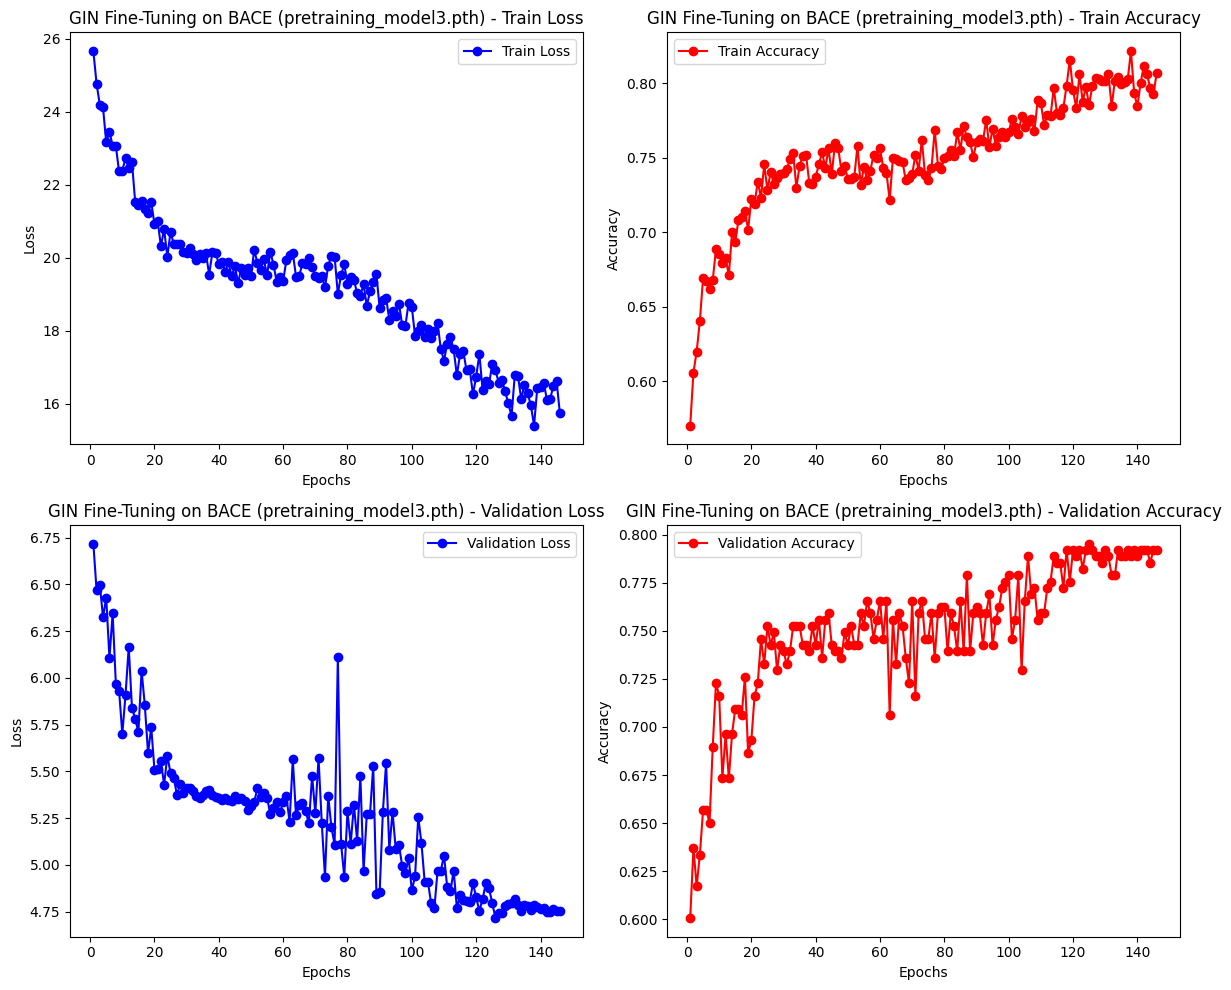

Evaluating model with pretraining_model4.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model4.pth
Epoch 0, Train Loss 25.7473, Train Accuracy 0.5603, Val Loss 6.7346, Val Accuracy 0.5875
Epoch 10, Train Loss 22.6114, Train Accuracy 0.6793, Val Loss 5.9334, Val Accuracy 0.6964
Epoch 20, Train Loss 20.8461, Train Accuracy 0.7215, Val Loss 5.5445, Val Accuracy 0.7294
Epoch 30, Train Loss 19.8734, Train Accuracy 0.7463, Val Loss 5.4522, Val Accuracy 0.7426
Epoch 40, Train Loss 19.5484, Train Accuracy 0.7413, Val Loss 5.4583, Val Accuracy 0.7558
Epoch 50, Train Loss 18.9636, Train Accuracy 0.7620, Val Loss 5.3672, Val Accuracy 0.7525
Epoch 60, Train Loss 19.6230, Train Accuracy 0.7529, Val Loss 5.2335, Val Accuracy 0.7657
Epoch 70, Train Loss 19.6503, Train Accuracy 0.7463, Val Loss 5.0900, Val Accuracy 0.7525
Epoch 80, Train Loss 19.2159, Train Accuracy 0.7446, Val Loss 5.3141, Val Accuracy 0.7459
Epoch 90, Train Loss 19.1030, Train Accuracy 0.7579, V

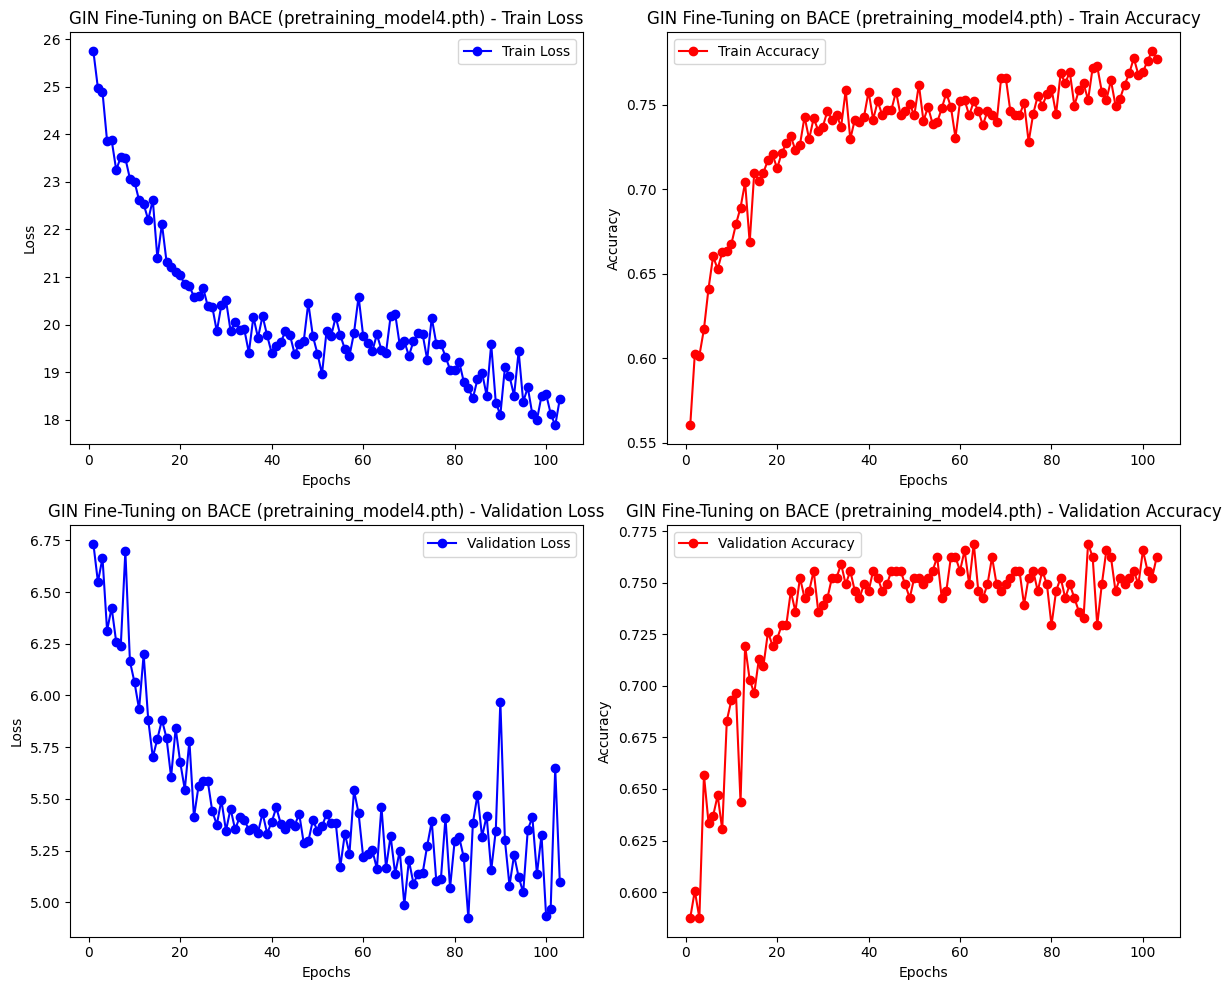

Evaluating model with pretraining_model5.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model5.pth
Epoch 0, Train Loss 25.8415, Train Accuracy 0.5686, Val Loss 7.0791, Val Accuracy 0.5347
Epoch 10, Train Loss 22.4555, Train Accuracy 0.6909, Val Loss 6.4171, Val Accuracy 0.6469
Epoch 20, Train Loss 21.3519, Train Accuracy 0.6967, Val Loss 5.5378, Val Accuracy 0.7393
Epoch 30, Train Loss 20.1076, Train Accuracy 0.7298, Val Loss 5.3773, Val Accuracy 0.7591
Epoch 40, Train Loss 20.0760, Train Accuracy 0.7314, Val Loss 5.4146, Val Accuracy 0.7558
Epoch 50, Train Loss 20.1878, Train Accuracy 0.7273, Val Loss 5.4041, Val Accuracy 0.7558
Epoch 60, Train Loss 20.4047, Train Accuracy 0.7256, Val Loss 5.4737, Val Accuracy 0.7327
Epoch 70, Train Loss 20.2495, Train Accuracy 0.7322, Val Loss 5.2371, Val Accuracy 0.7558
Epoch 80, Train Loss 19.7411, Train Accuracy 0.7413, Val Loss 5.3141, Val Accuracy 0.7558
Epoch 90, Train Loss 18.4327, Train Accuracy 0.7669, V

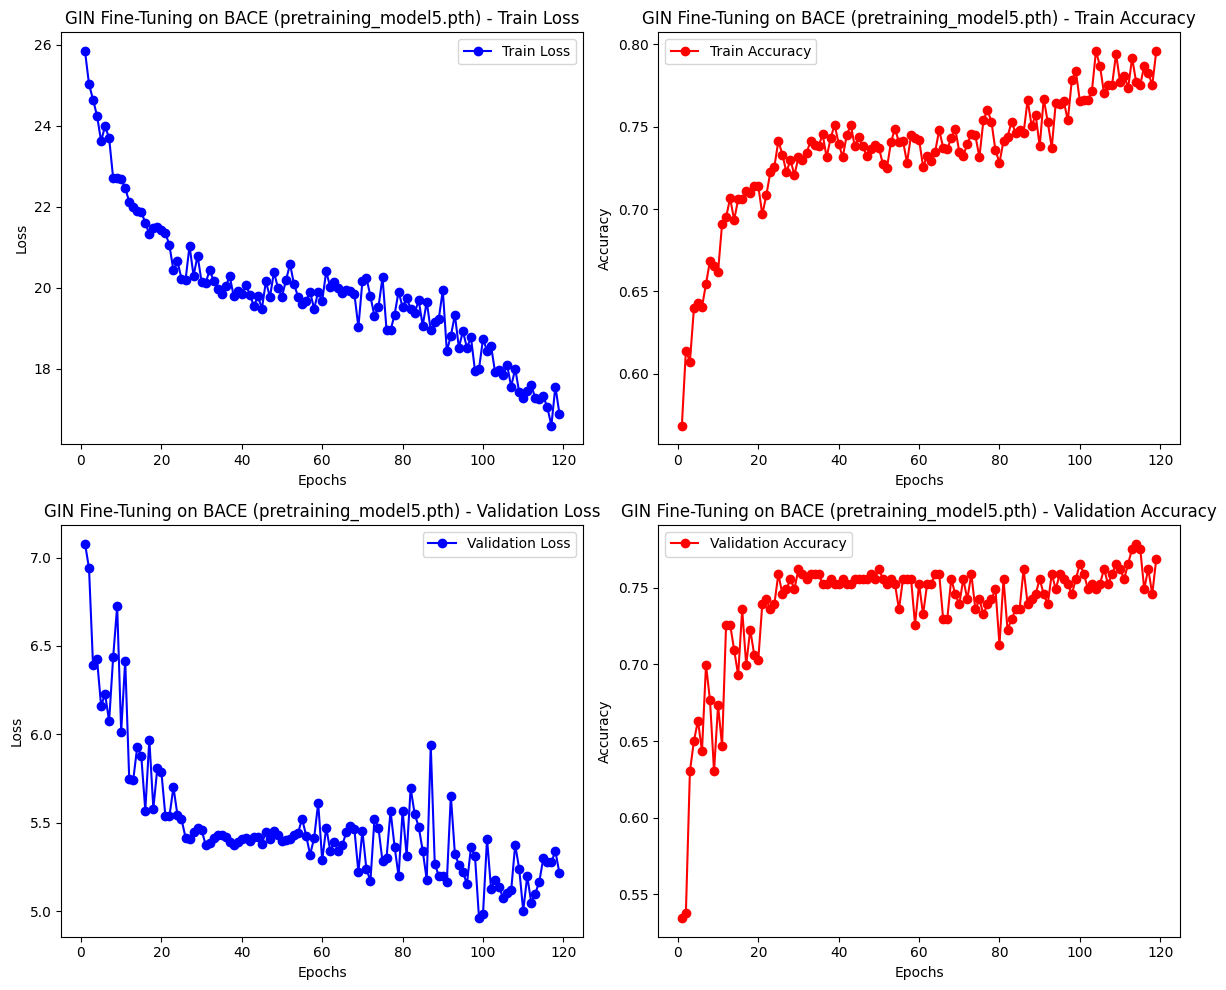

Evaluating model with pretraining_model6.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model6.pth
Epoch 0, Train Loss 25.5570, Train Accuracy 0.5562, Val Loss 6.7333, Val Accuracy 0.5974
Epoch 10, Train Loss 22.7736, Train Accuracy 0.6653, Val Loss 5.7852, Val Accuracy 0.6766
Epoch 20, Train Loss 20.0654, Train Accuracy 0.7438, Val Loss 5.1140, Val Accuracy 0.7756
Epoch 30, Train Loss 20.0703, Train Accuracy 0.7322, Val Loss 5.0574, Val Accuracy 0.7756
Epoch 40, Train Loss 19.5459, Train Accuracy 0.7504, Val Loss 4.9984, Val Accuracy 0.7756
Epoch 50, Train Loss 19.4032, Train Accuracy 0.7620, Val Loss 5.0398, Val Accuracy 0.7789
Epoch 60, Train Loss 19.2885, Train Accuracy 0.7628, Val Loss 5.0028, Val Accuracy 0.7591
Epoch 70, Train Loss 19.8818, Train Accuracy 0.7496, Val Loss 5.1359, Val Accuracy 0.7624
Epoch 80, Train Loss 19.2013, Train Accuracy 0.7430, Val Loss 4.8406, Val Accuracy 0.7789
Epoch 90, Train Loss 19.1001, Train Accuracy 0.7455, V

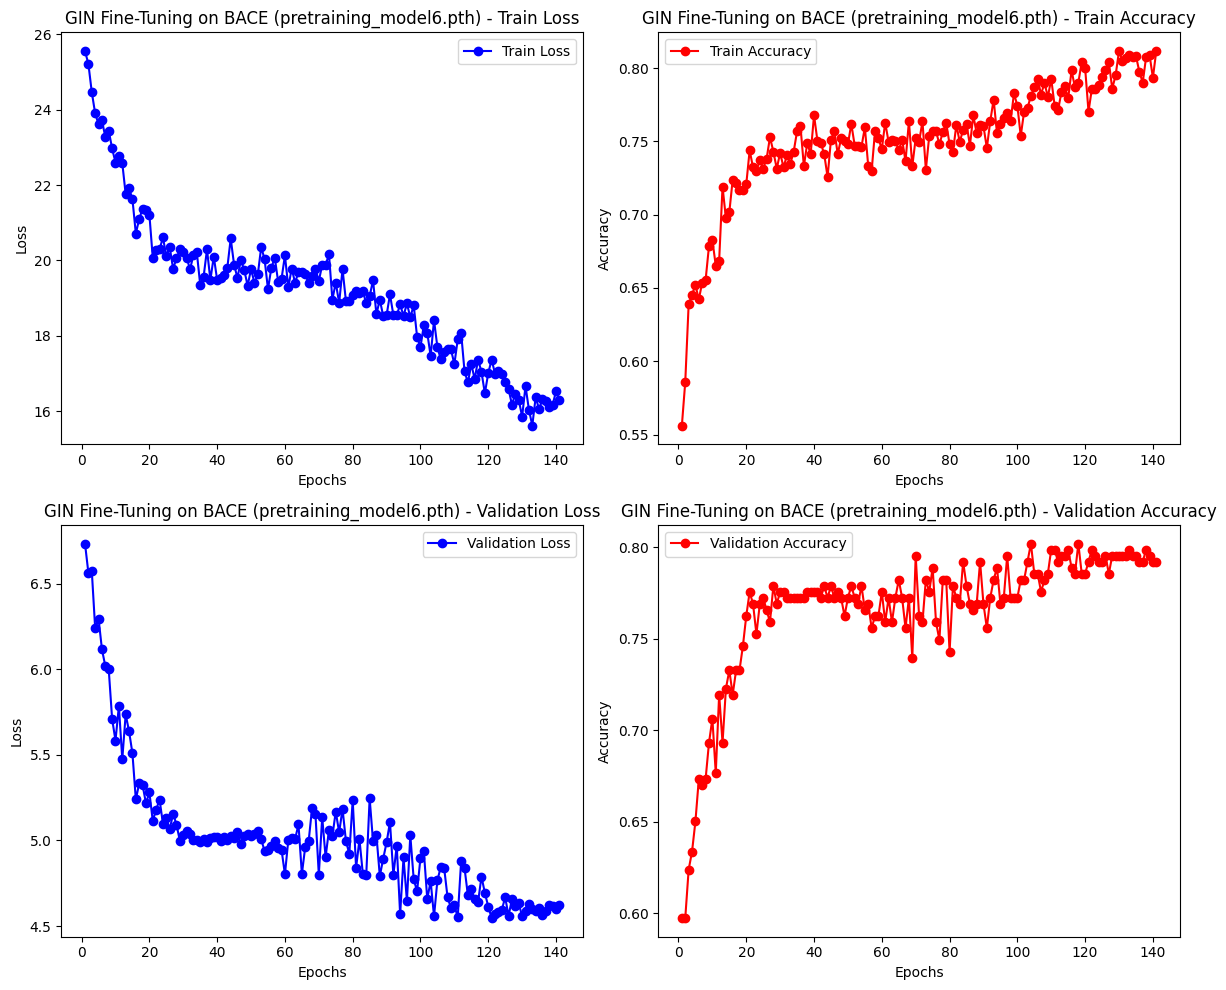

Results for pretraining_model1.pth:
  Final Training Loss: 17.0691
  Final Training Accuracy: 0.7909
  Final Validation Loss: 4.9282
  Final Validation Accuracy: 0.7624
Results for pretraining_model2.pth:
  Final Training Loss: 19.8664
  Final Training Accuracy: 0.7372
  Final Validation Loss: 5.4498
  Final Validation Accuracy: 0.7393
Results for pretraining_model3.pth:
  Final Training Loss: 15.7505
  Final Training Accuracy: 0.8066
  Final Validation Loss: 4.7514
  Final Validation Accuracy: 0.7921
Results for pretraining_model4.pth:
  Final Training Loss: 18.4388
  Final Training Accuracy: 0.7769
  Final Validation Loss: 5.0965
  Final Validation Accuracy: 0.7624
Results for pretraining_model5.pth:
  Final Training Loss: 16.8942
  Final Training Accuracy: 0.7959
  Final Validation Loss: 5.2157
  Final Validation Accuracy: 0.7690
Results for pretraining_model6.pth:
  Final Training Loss: 16.2900
  Final Training Accuracy: 0.8116
  Final Validation Loss: 4.6250
  Final Validation Acc

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Learning rate warmup function
def get_lr_lambda(warmup_steps):
    def lr_lambda(epoch):
        if epoch < warmup_steps:
            return float(epoch) / float(max(1, warmup_steps))
        return 1.0
    return lr_lambda

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=200, early_stopping_patience=20):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "pretraining_model1.pth": "pretrained_models/pretraining_model1.pth",
    "pretraining_model2.pth": "pretrained_models/pretraining_model2.pth",
    "pretraining_model3.pth": "pretrained_models/pretraining_model3.pth",
    "pretraining_model4.pth": "pretrained_models/pretraining_model4.pth",
    "pretraining_model5.pth": "pretrained_models/pretraining_model5.pth",
    "pretraining_model6.pth": "pretrained_models/pretraining_model6.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-4)
    scheduler = LambdaLR(optimizer, lr_lambda=get_lr_lambda(10))  # Warmup for 10 epochs followed by CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6, last_epoch=9)

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=200
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


3rd Trial
1. Increased Number of GIN layers
2. Data Augmentation
3. Learning Rate Warmup
4. Gradient Clipping
5. Regularization : enhanced dropout, batch normalization

Evaluating model with pretraining_model1.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model1.pth
Epoch 0, Train Loss 26.1462, Train Accuracy 0.5397, Val Loss 7.2192, Val Accuracy 0.5017
Epoch 10, Train Loss 24.5817, Train Accuracy 0.6091, Val Loss 6.4013, Val Accuracy 0.6403
Epoch 20, Train Loss 24.3748, Train Accuracy 0.6298, Val Loss 6.1880, Val Accuracy 0.6634
Epoch 30, Train Loss 23.5914, Train Accuracy 0.6512, Val Loss 6.0122, Val Accuracy 0.6832
Epoch 40, Train Loss 23.5611, Train Accuracy 0.6281, Val Loss 5.9848, Val Accuracy 0.6799
Epoch 50, Train Loss 23.4598, Train Accuracy 0.6488, Val Loss 6.1181, Val Accuracy 0.6502
Early stopping triggered


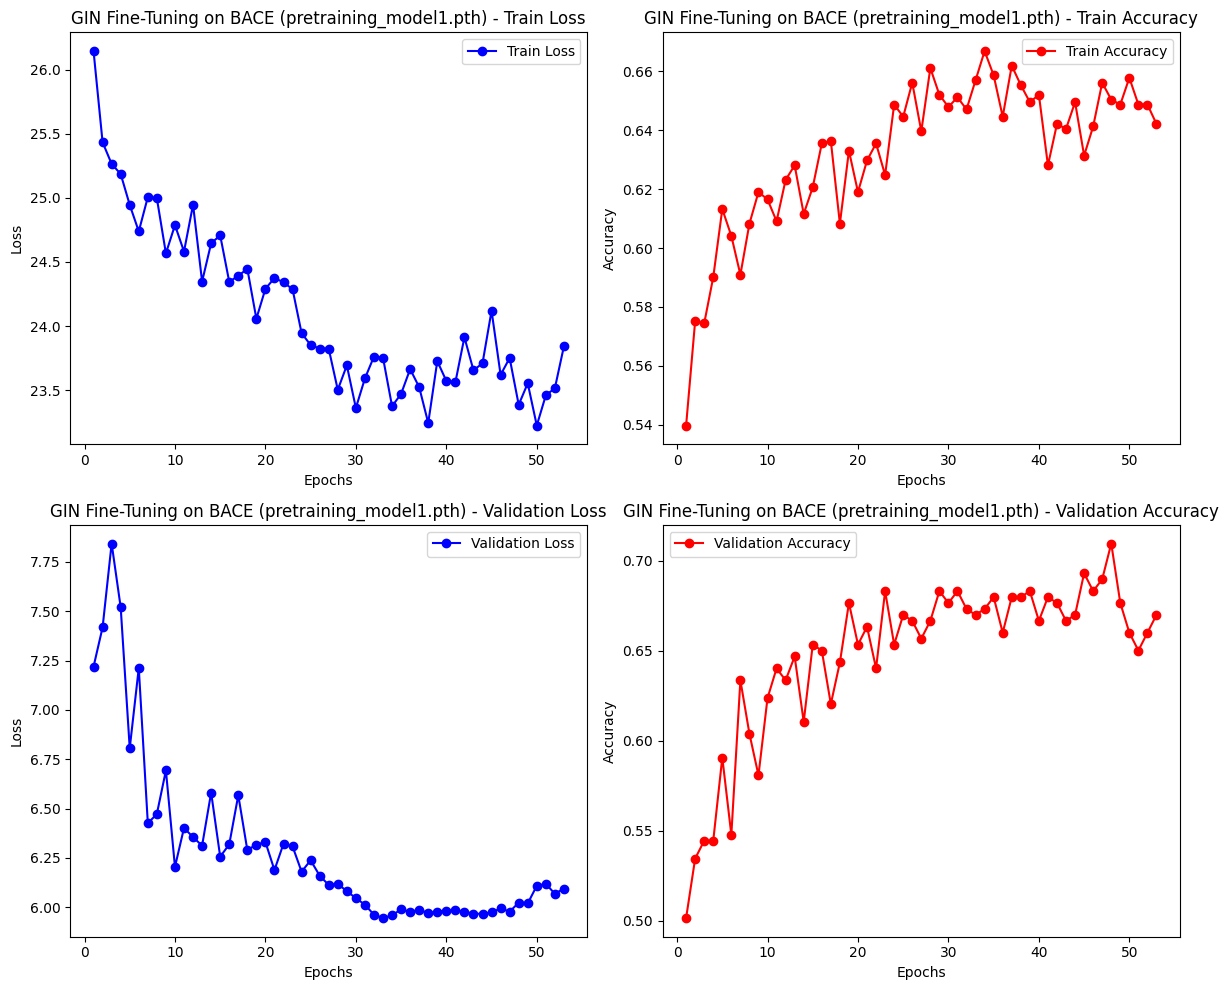

Evaluating model with pretraining_model2.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model2.pth
Epoch 0, Train Loss 26.1832, Train Accuracy 0.5355, Val Loss 6.9331, Val Accuracy 0.5512
Epoch 10, Train Loss 24.4448, Train Accuracy 0.6149, Val Loss 7.1295, Val Accuracy 0.5677
Epoch 20, Train Loss 23.8433, Train Accuracy 0.6413, Val Loss 6.1482, Val Accuracy 0.6370
Epoch 30, Train Loss 23.0040, Train Accuracy 0.6810, Val Loss 5.9286, Val Accuracy 0.6766
Epoch 40, Train Loss 23.6363, Train Accuracy 0.6298, Val Loss 5.9428, Val Accuracy 0.6667
Epoch 50, Train Loss 23.3465, Train Accuracy 0.6678, Val Loss 5.9581, Val Accuracy 0.6799
Early stopping triggered


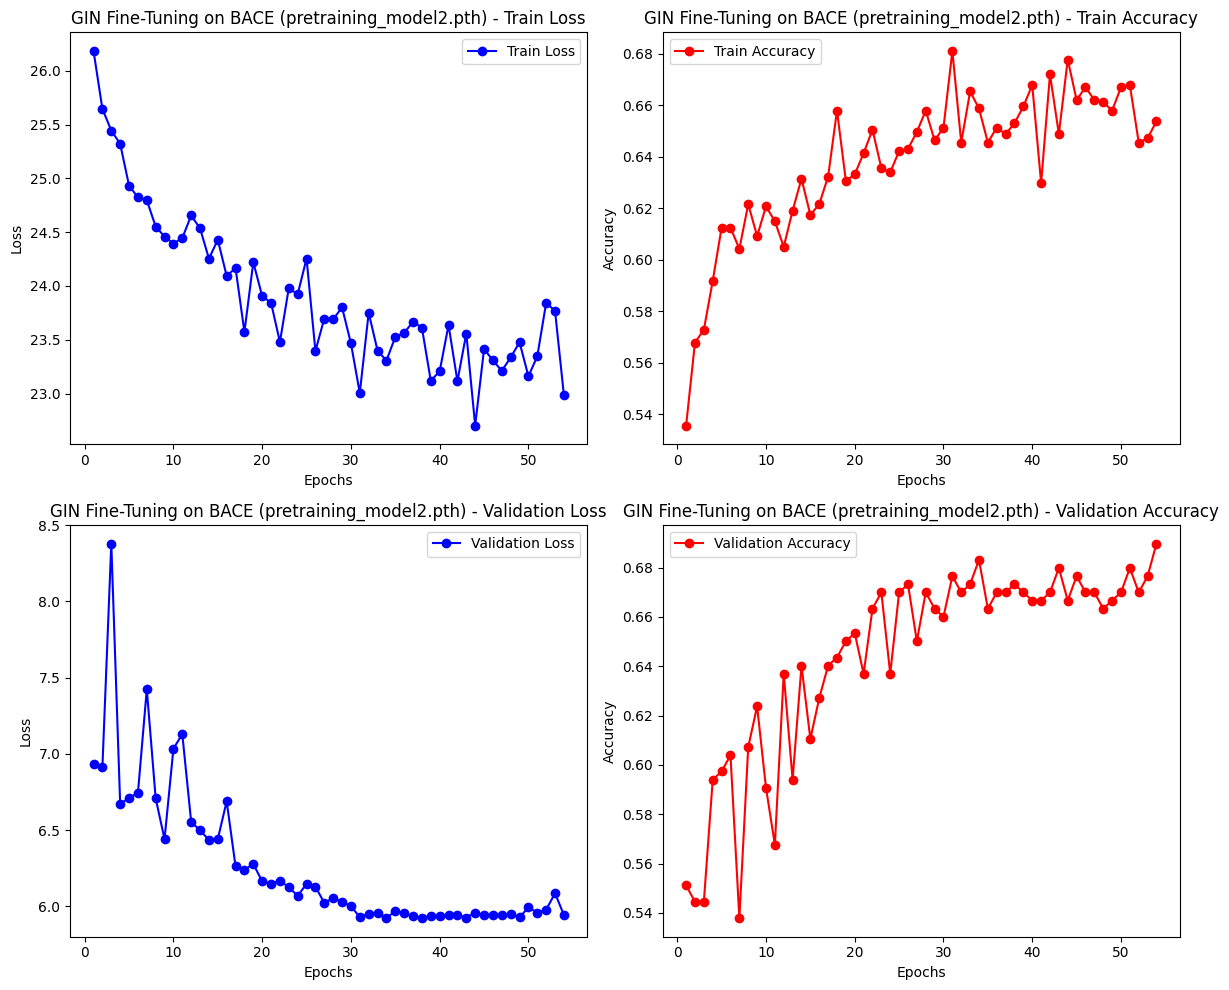

Evaluating model with pretraining_model3.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model3.pth
Epoch 0, Train Loss 26.3690, Train Accuracy 0.5240, Val Loss 6.9759, Val Accuracy 0.5908
Epoch 10, Train Loss 24.0556, Train Accuracy 0.6314, Val Loss 6.6029, Val Accuracy 0.6106
Epoch 20, Train Loss 23.6899, Train Accuracy 0.6496, Val Loss 6.4190, Val Accuracy 0.5908
Epoch 30, Train Loss 23.6201, Train Accuracy 0.6331, Val Loss 6.3655, Val Accuracy 0.6007
Epoch 40, Train Loss 23.5003, Train Accuracy 0.6430, Val Loss 6.2728, Val Accuracy 0.6205
Epoch 50, Train Loss 23.6312, Train Accuracy 0.6504, Val Loss 6.2830, Val Accuracy 0.6073
Epoch 60, Train Loss 24.0847, Train Accuracy 0.6405, Val Loss 6.1092, Val Accuracy 0.6535
Epoch 70, Train Loss 23.5461, Train Accuracy 0.6455, Val Loss 6.2196, Val Accuracy 0.6601
Epoch 80, Train Loss 23.8843, Train Accuracy 0.6504, Val Loss 6.1467, Val Accuracy 0.6403
Epoch 90, Train Loss 23.3936, Train Accuracy 0.6570, V

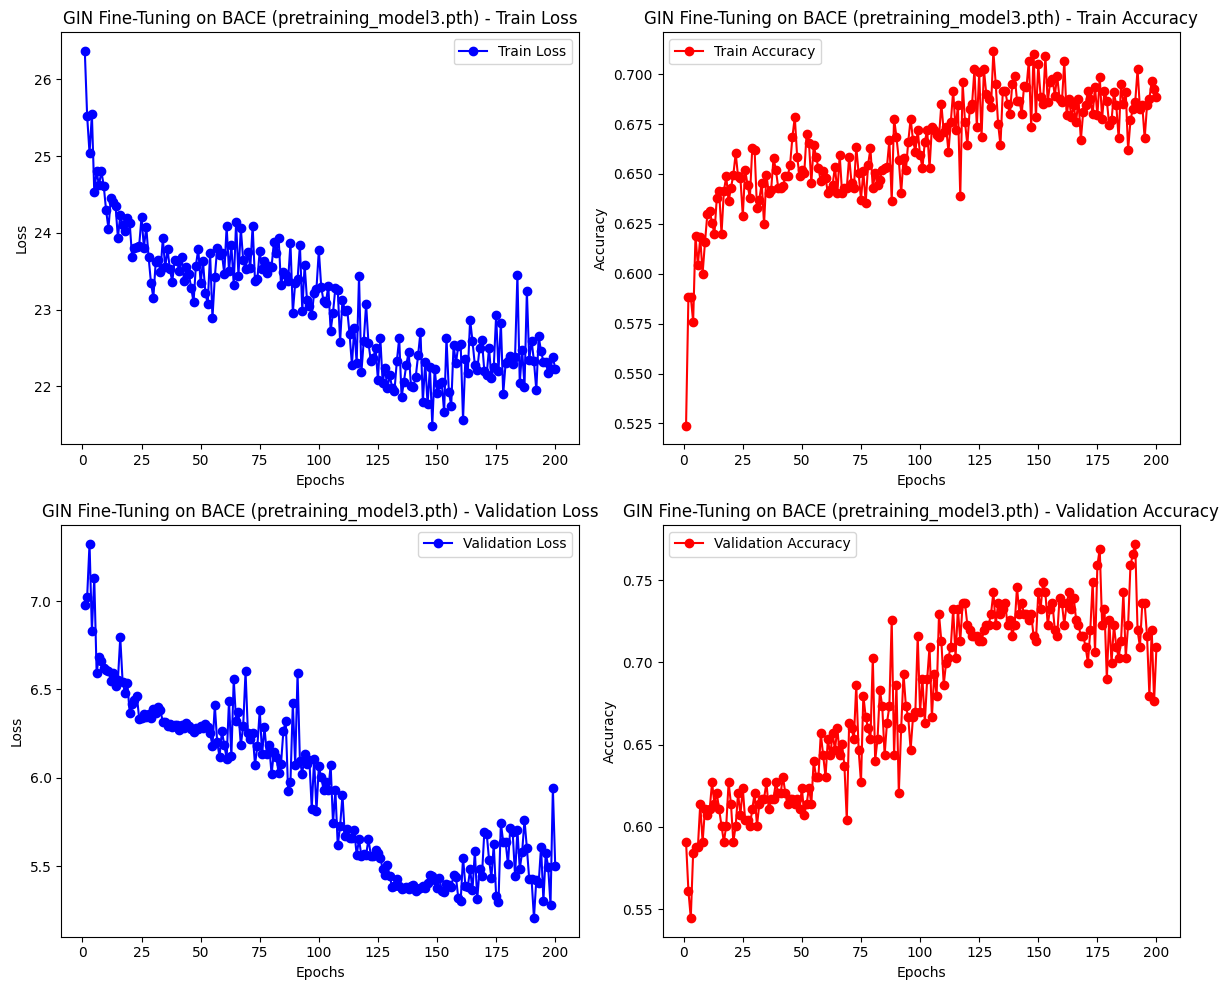

Evaluating model with pretraining_model4.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model4.pth
Epoch 0, Train Loss 26.1089, Train Accuracy 0.5397, Val Loss 6.9741, Val Accuracy 0.5644
Epoch 10, Train Loss 24.6416, Train Accuracy 0.6124, Val Loss 6.4432, Val Accuracy 0.6304
Epoch 20, Train Loss 24.0816, Train Accuracy 0.6306, Val Loss 6.2361, Val Accuracy 0.6634
Epoch 30, Train Loss 24.1379, Train Accuracy 0.6455, Val Loss 6.1218, Val Accuracy 0.6898
Epoch 40, Train Loss 23.1431, Train Accuracy 0.6719, Val Loss 6.0550, Val Accuracy 0.6898
Epoch 50, Train Loss 23.4983, Train Accuracy 0.6620, Val Loss 6.0006, Val Accuracy 0.6964
Epoch 60, Train Loss 23.7135, Train Accuracy 0.6479, Val Loss 6.0263, Val Accuracy 0.6997
Epoch 70, Train Loss 23.3981, Train Accuracy 0.6661, Val Loss 5.9537, Val Accuracy 0.6931
Epoch 80, Train Loss 23.7237, Train Accuracy 0.6512, Val Loss 5.8261, Val Accuracy 0.7129
Epoch 90, Train Loss 22.9729, Train Accuracy 0.6752, V

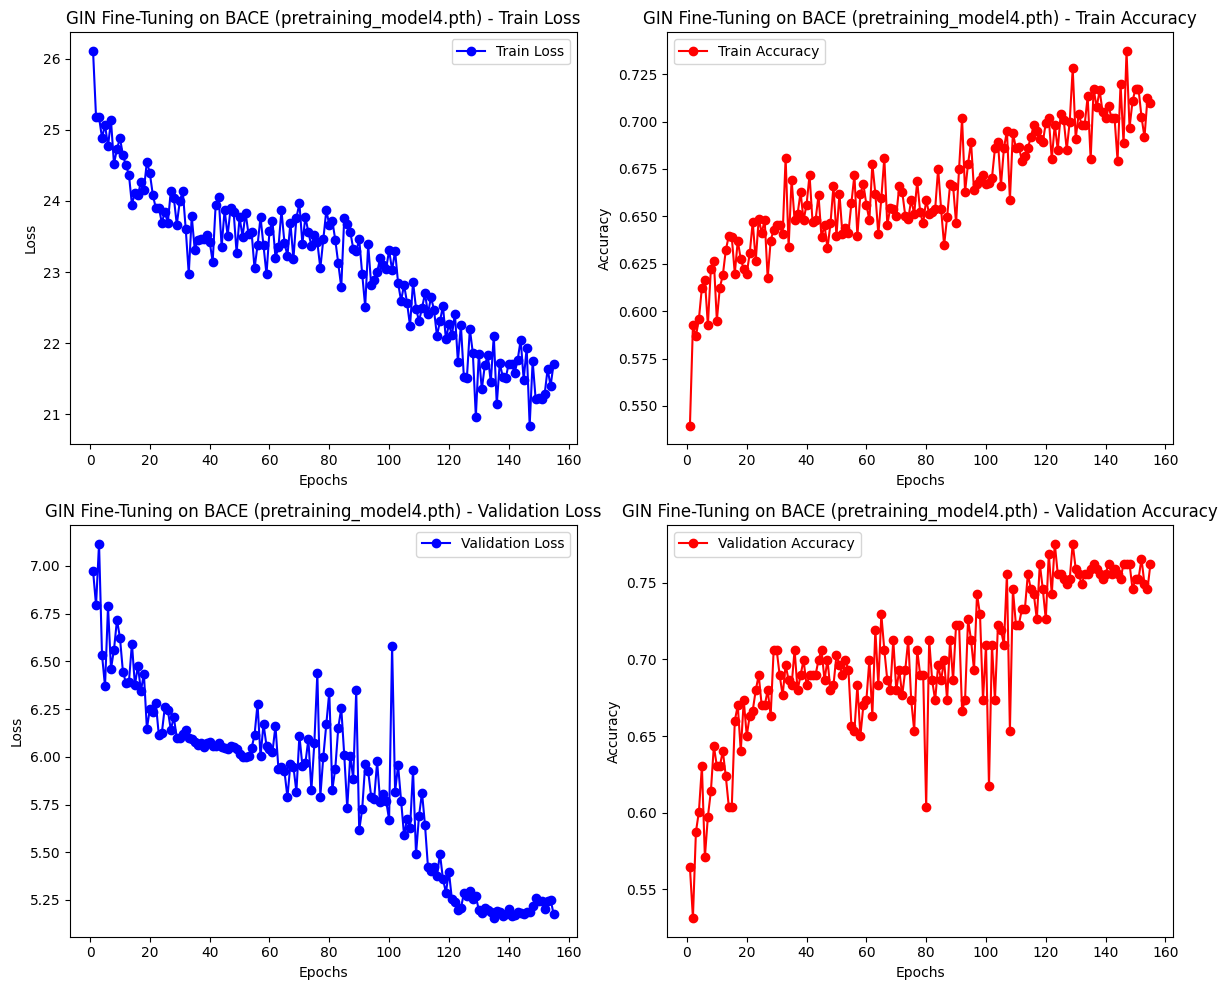

Evaluating model with pretraining_model5.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model5.pth
Epoch 0, Train Loss 25.9586, Train Accuracy 0.5537, Val Loss 6.6466, Val Accuracy 0.6073
Epoch 10, Train Loss 24.2595, Train Accuracy 0.6231, Val Loss 6.4101, Val Accuracy 0.6205
Epoch 20, Train Loss 23.8709, Train Accuracy 0.6413, Val Loss 6.2434, Val Accuracy 0.6403
Epoch 30, Train Loss 23.1340, Train Accuracy 0.6686, Val Loss 6.0381, Val Accuracy 0.6832
Epoch 40, Train Loss 23.2954, Train Accuracy 0.6570, Val Loss 5.9142, Val Accuracy 0.6700
Epoch 50, Train Loss 23.3808, Train Accuracy 0.6620, Val Loss 5.8820, Val Accuracy 0.6832
Epoch 60, Train Loss 23.4446, Train Accuracy 0.6579, Val Loss 6.0034, Val Accuracy 0.6931
Epoch 70, Train Loss 23.0682, Train Accuracy 0.6785, Val Loss 5.9453, Val Accuracy 0.7096
Epoch 80, Train Loss 23.5655, Train Accuracy 0.6661, Val Loss 5.6918, Val Accuracy 0.7294
Epoch 90, Train Loss 22.9821, Train Accuracy 0.6835, V

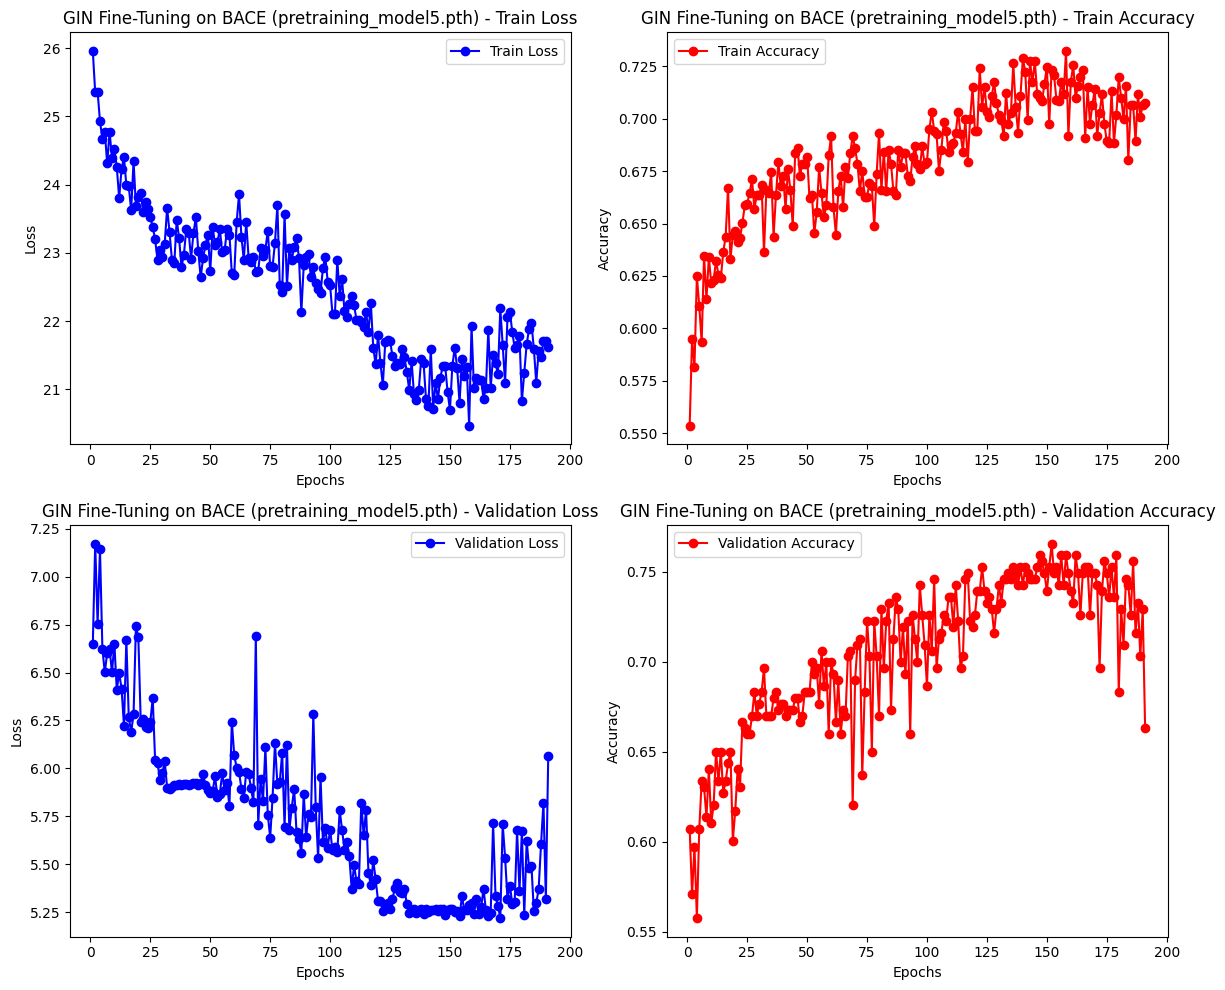

Evaluating model with pretraining_model6.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model6.pth
Epoch 0, Train Loss 26.2069, Train Accuracy 0.5405, Val Loss 6.7841, Val Accuracy 0.5380
Epoch 10, Train Loss 24.4022, Train Accuracy 0.6322, Val Loss 6.8410, Val Accuracy 0.5776
Epoch 20, Train Loss 24.2325, Train Accuracy 0.6289, Val Loss 6.3241, Val Accuracy 0.6733
Epoch 30, Train Loss 24.0915, Train Accuracy 0.6322, Val Loss 6.1991, Val Accuracy 0.6469
Epoch 40, Train Loss 23.7383, Train Accuracy 0.6645, Val Loss 6.2374, Val Accuracy 0.6634
Early stopping triggered


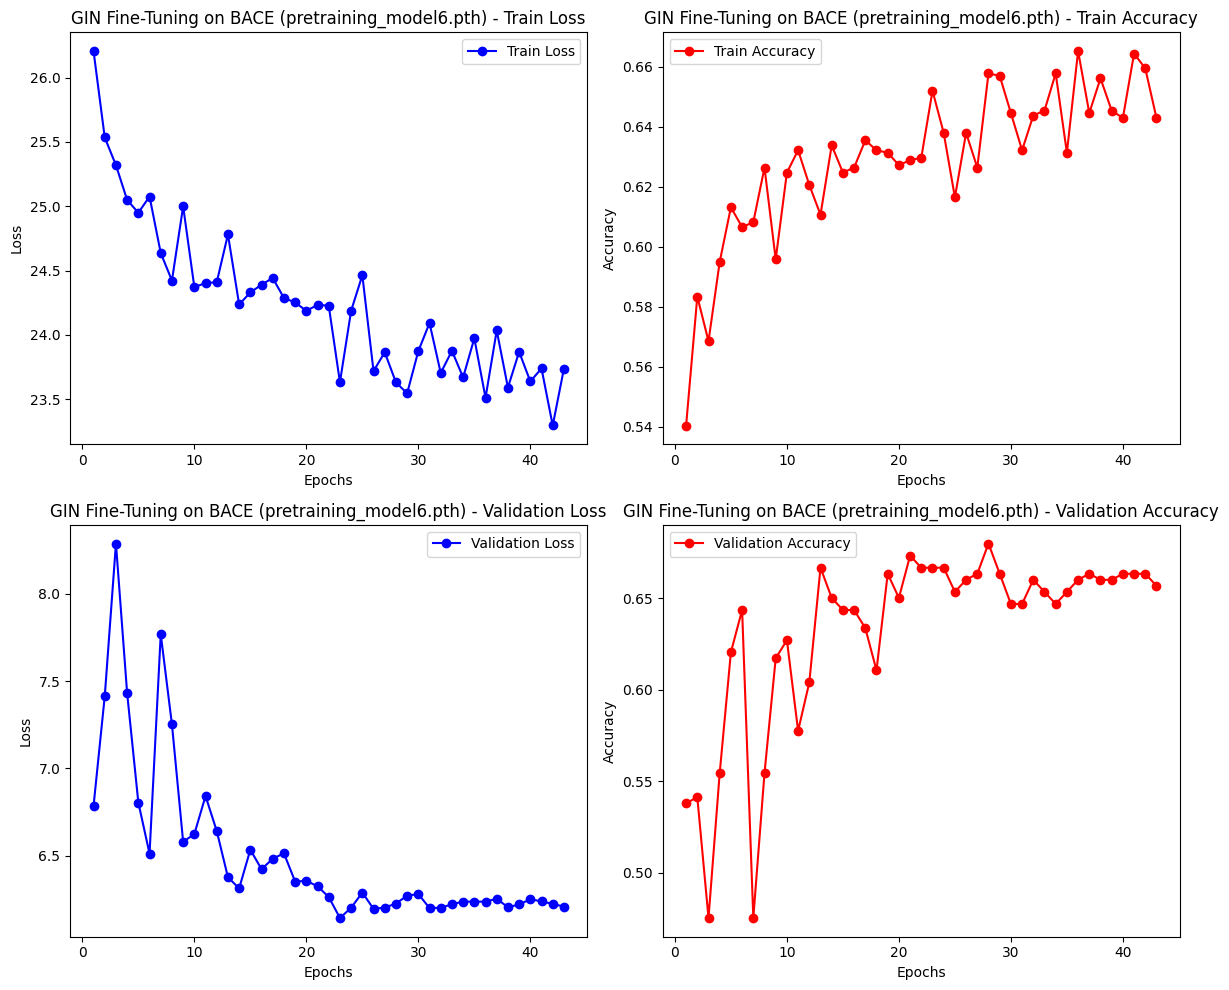

Results for pretraining_model1.pth:
  Final Training Loss: 23.8422
  Final Training Accuracy: 0.6421
  Final Validation Loss: 6.0942
  Final Validation Accuracy: 0.6700
Results for pretraining_model2.pth:
  Final Training Loss: 22.9831
  Final Training Accuracy: 0.6537
  Final Validation Loss: 5.9424
  Final Validation Accuracy: 0.6898
Results for pretraining_model3.pth:
  Final Training Loss: 22.2300
  Final Training Accuracy: 0.6884
  Final Validation Loss: 5.4999
  Final Validation Accuracy: 0.7096
Results for pretraining_model4.pth:
  Final Training Loss: 21.7072
  Final Training Accuracy: 0.7099
  Final Validation Loss: 5.1768
  Final Validation Accuracy: 0.7624
Results for pretraining_model5.pth:
  Final Training Loss: 21.6195
  Final Training Accuracy: 0.7074
  Final Validation Loss: 6.0637
  Final Validation Accuracy: 0.6634
Results for pretraining_model6.pth:
  Final Training Loss: 23.7361
  Final Training Accuracy: 0.6430
  Final Validation Loss: 6.2072
  Final Validation Acc

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR, OneCycleLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Learning rate warmup function
def get_lr_lambda(warmup_steps):
    def lr_lambda(epoch):
        if epoch < warmup_steps:
            return float(epoch) / float(max(1, warmup_steps))
        return 1.0
    return lr_lambda

# Data augmentation function
def augment_data(data, aug_type='dropout', drop_rate=0.2):
    if aug_type == 'dropout':
        mask = torch.bernoulli((1 - drop_rate) * torch.ones(data.x.size(0))).bool()
        data.x[~mask] = 0
    return data

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=200, early_stopping_patience=20):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = augment_data(data).to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "pretraining_model1.pth": "pretrained_models/pretraining_model1.pth",
    "pretraining_model2.pth": "pretrained_models/pretraining_model2.pth",
    "pretraining_model3.pth": "pretrained_models/pretraining_model3.pth",
    "pretraining_model4.pth": "pretrained_models/pretraining_model4.pth",
    "pretraining_model5.pth": "pretrained_models/pretraining_model5.pth",
    "pretraining_model6.pth": "pretrained_models/pretraining_model6.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-4)
    scheduler = LambdaLR(optimizer, lr_lambda=get_lr_lambda(10))  # Warmup for 10 epochs followed by CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6, last_epoch=9)

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=200
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


-> worse than before.
start from 2nd trial again

4th Trial
1. reduce learning rate
2. increase number of epochs
3. adjust early stopping patience

Evaluating model with pretraining_model1.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model1.pth
Epoch 0, Train Loss 26.1046, Train Accuracy 0.5397, Val Loss 6.8106, Val Accuracy 0.5743
Epoch 10, Train Loss 23.0829, Train Accuracy 0.6661, Val Loss 5.8856, Val Accuracy 0.6964
Epoch 20, Train Loss 21.6606, Train Accuracy 0.7083, Val Loss 6.0962, Val Accuracy 0.6997
Epoch 30, Train Loss 20.3666, Train Accuracy 0.7331, Val Loss 5.5114, Val Accuracy 0.7162
Epoch 40, Train Loss 19.9625, Train Accuracy 0.7413, Val Loss 5.3092, Val Accuracy 0.7492
Epoch 50, Train Loss 19.0614, Train Accuracy 0.7620, Val Loss 5.0992, Val Accuracy 0.7492
Epoch 60, Train Loss 18.6707, Train Accuracy 0.7760, Val Loss 5.2677, Val Accuracy 0.7459
Epoch 70, Train Loss 19.1448, Train Accuracy 0.7388, Val Loss 5.2054, Val Accuracy 0.7426
Epoch 80, Train Loss 18.1434, Train Accuracy 0.7760, Val Loss 5.1236, Val Accuracy 0.7492
Epoch 90, Train Loss 18.3460, Train Accuracy 0.7843, V

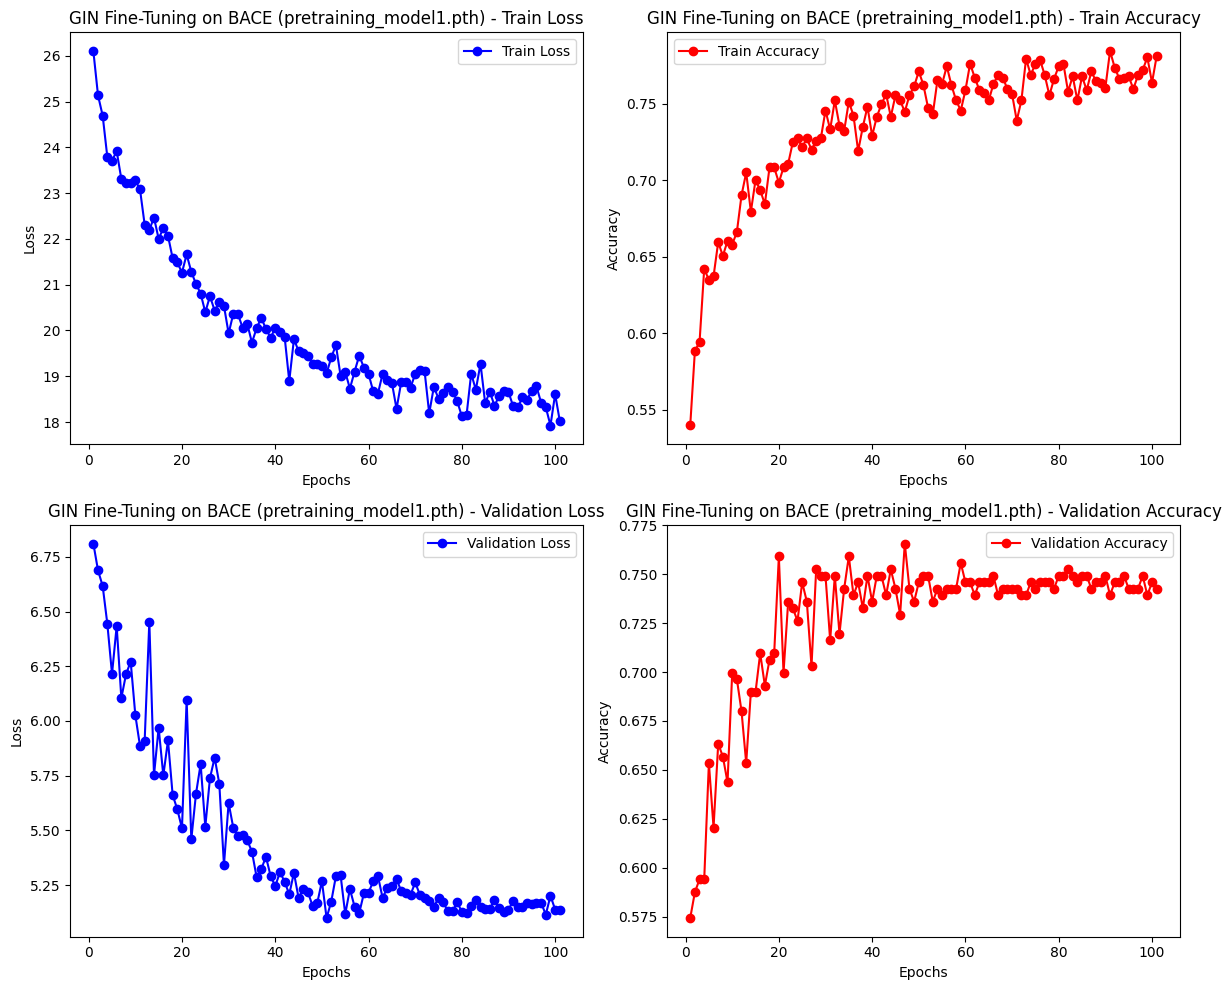

Evaluating model with pretraining_model2.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model2.pth
Epoch 0, Train Loss 26.1194, Train Accuracy 0.5471, Val Loss 6.6930, Val Accuracy 0.5941
Epoch 10, Train Loss 22.1783, Train Accuracy 0.6802, Val Loss 5.9726, Val Accuracy 0.7096
Epoch 20, Train Loss 21.6563, Train Accuracy 0.7050, Val Loss 5.5316, Val Accuracy 0.7228
Epoch 30, Train Loss 20.1499, Train Accuracy 0.7322, Val Loss 5.7761, Val Accuracy 0.7162
Epoch 40, Train Loss 19.4414, Train Accuracy 0.7537, Val Loss 5.4667, Val Accuracy 0.7459
Epoch 50, Train Loss 19.7859, Train Accuracy 0.7248, Val Loss 5.3449, Val Accuracy 0.7360
Epoch 60, Train Loss 19.0131, Train Accuracy 0.7496, Val Loss 5.3518, Val Accuracy 0.7558
Epoch 70, Train Loss 19.1208, Train Accuracy 0.7438, Val Loss 5.3108, Val Accuracy 0.7558
Epoch 80, Train Loss 18.6465, Train Accuracy 0.7628, Val Loss 5.2211, Val Accuracy 0.7657
Epoch 90, Train Loss 19.1853, Train Accuracy 0.7463, V

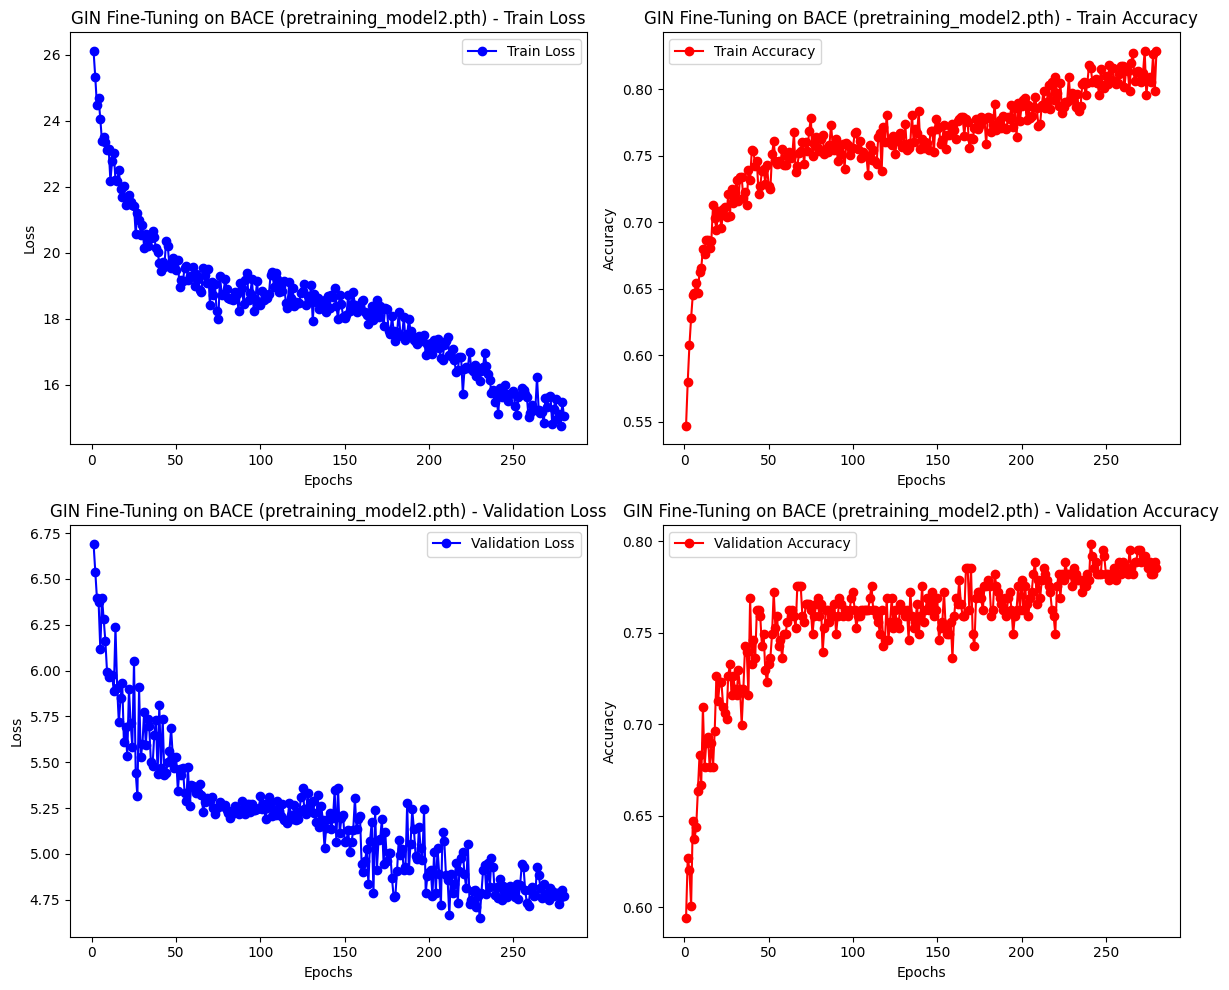

Evaluating model with pretraining_model3.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model3.pth
Epoch 0, Train Loss 25.9699, Train Accuracy 0.5397, Val Loss 6.7048, Val Accuracy 0.5710
Epoch 10, Train Loss 22.7832, Train Accuracy 0.6884, Val Loss 6.3316, Val Accuracy 0.6535
Epoch 20, Train Loss 21.4778, Train Accuracy 0.7025, Val Loss 5.8314, Val Accuracy 0.7327
Epoch 30, Train Loss 20.5266, Train Accuracy 0.7413, Val Loss 5.4613, Val Accuracy 0.7492
Epoch 40, Train Loss 19.9910, Train Accuracy 0.7438, Val Loss 5.4210, Val Accuracy 0.7723
Epoch 50, Train Loss 19.1621, Train Accuracy 0.7636, Val Loss 5.2468, Val Accuracy 0.7789
Epoch 60, Train Loss 18.6378, Train Accuracy 0.7587, Val Loss 5.2644, Val Accuracy 0.7690
Epoch 70, Train Loss 18.7008, Train Accuracy 0.7769, Val Loss 5.2580, Val Accuracy 0.7591
Epoch 80, Train Loss 17.4234, Train Accuracy 0.7835, Val Loss 5.2582, Val Accuracy 0.7690
Epoch 90, Train Loss 19.1086, Train Accuracy 0.7463, V

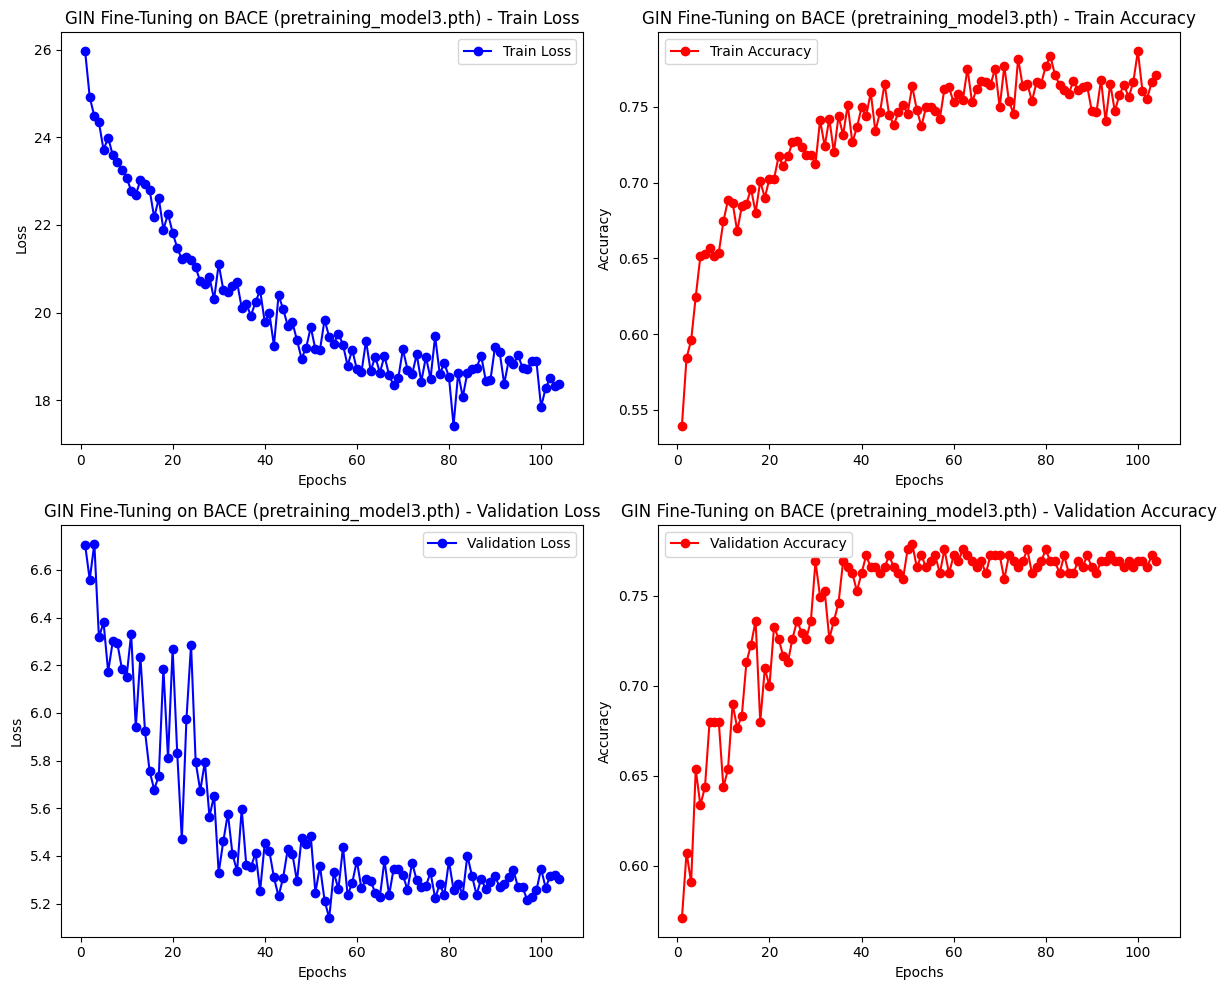

Evaluating model with pretraining_model4.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model4.pth
Epoch 0, Train Loss 25.8720, Train Accuracy 0.5463, Val Loss 6.7724, Val Accuracy 0.5479
Epoch 10, Train Loss 23.0126, Train Accuracy 0.6628, Val Loss 6.3011, Val Accuracy 0.6502
Epoch 20, Train Loss 21.3692, Train Accuracy 0.7157, Val Loss 5.6340, Val Accuracy 0.7162
Epoch 30, Train Loss 20.5831, Train Accuracy 0.7231, Val Loss 5.5052, Val Accuracy 0.7492
Epoch 40, Train Loss 19.6075, Train Accuracy 0.7554, Val Loss 5.2420, Val Accuracy 0.7723
Epoch 50, Train Loss 19.5220, Train Accuracy 0.7570, Val Loss 5.2954, Val Accuracy 0.7690
Epoch 60, Train Loss 18.8705, Train Accuracy 0.7570, Val Loss 5.2356, Val Accuracy 0.7558
Epoch 70, Train Loss 18.3363, Train Accuracy 0.7736, Val Loss 5.1491, Val Accuracy 0.7756
Epoch 80, Train Loss 18.5827, Train Accuracy 0.7587, Val Loss 5.2677, Val Accuracy 0.7657
Epoch 90, Train Loss 18.9427, Train Accuracy 0.7636, V

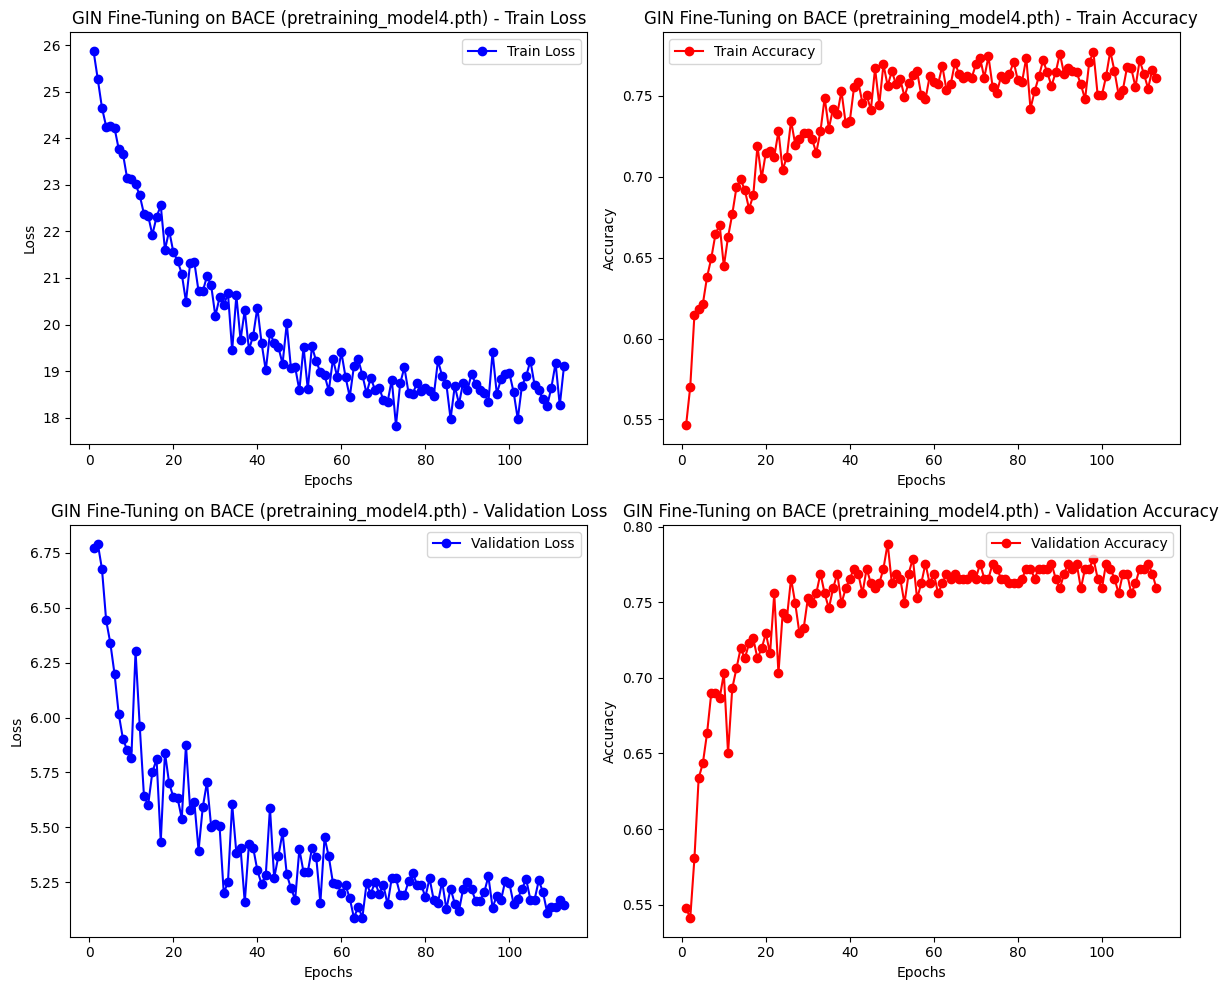

Evaluating model with pretraining_model5.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model5.pth
Epoch 0, Train Loss 26.0505, Train Accuracy 0.5479, Val Loss 6.8706, Val Accuracy 0.5446
Epoch 10, Train Loss 23.1542, Train Accuracy 0.6736, Val Loss 5.9744, Val Accuracy 0.7063
Epoch 20, Train Loss 21.2494, Train Accuracy 0.7041, Val Loss 5.9185, Val Accuracy 0.7096
Epoch 30, Train Loss 20.7316, Train Accuracy 0.7256, Val Loss 5.6532, Val Accuracy 0.7327
Epoch 40, Train Loss 20.0191, Train Accuracy 0.7471, Val Loss 5.4824, Val Accuracy 0.7525
Epoch 50, Train Loss 19.6230, Train Accuracy 0.7512, Val Loss 5.4129, Val Accuracy 0.7492
Epoch 60, Train Loss 19.0991, Train Accuracy 0.7587, Val Loss 5.4840, Val Accuracy 0.7492
Epoch 70, Train Loss 18.7875, Train Accuracy 0.7678, Val Loss 5.3177, Val Accuracy 0.7525
Epoch 80, Train Loss 18.0668, Train Accuracy 0.7669, Val Loss 5.3073, Val Accuracy 0.7558
Epoch 90, Train Loss 17.9995, Train Accuracy 0.7645, V

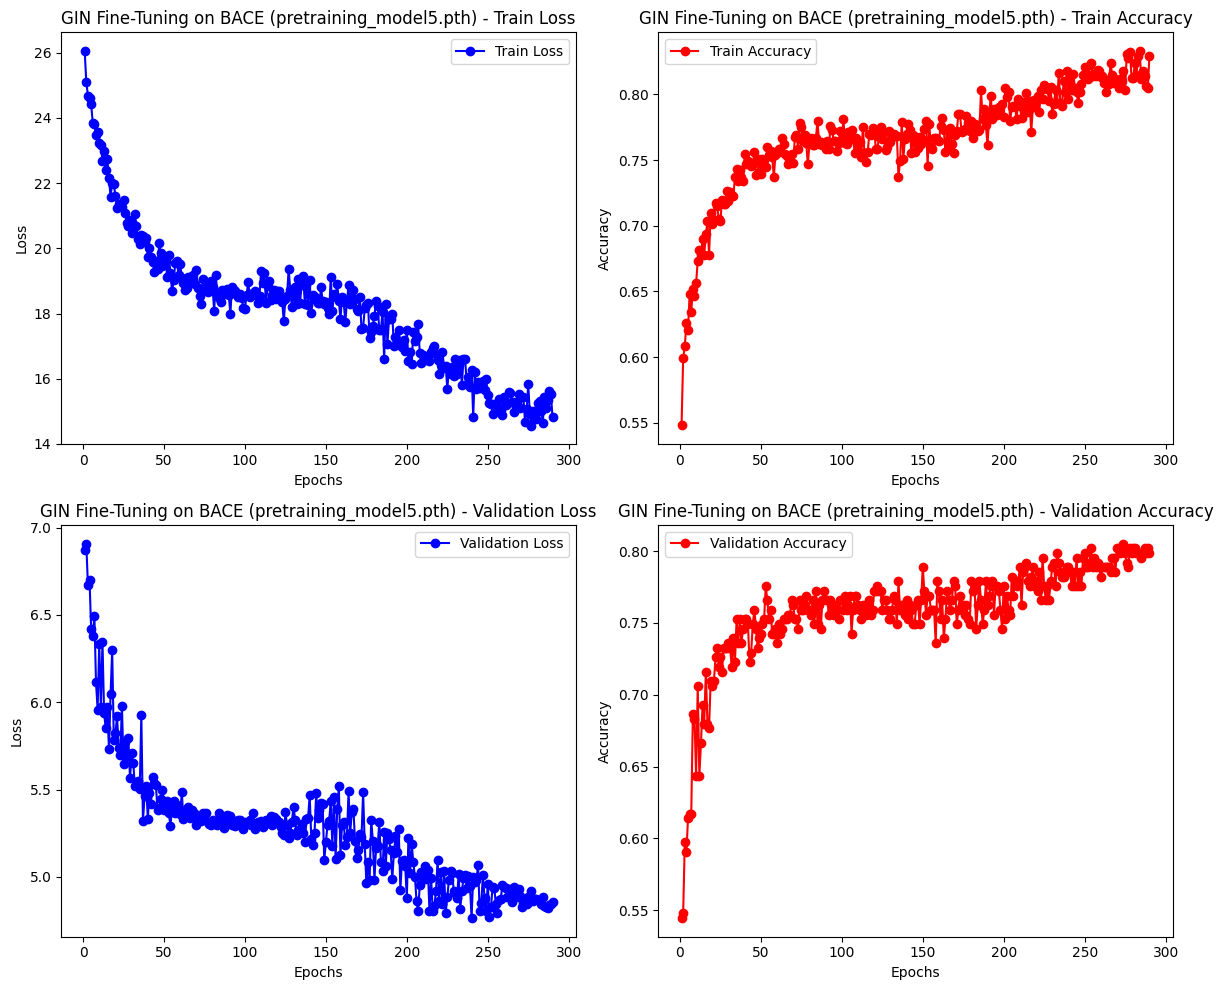

Evaluating model with pretraining_model6.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model6.pth
Epoch 0, Train Loss 26.3007, Train Accuracy 0.5488, Val Loss 6.7995, Val Accuracy 0.5644
Epoch 10, Train Loss 22.5140, Train Accuracy 0.6909, Val Loss 6.0663, Val Accuracy 0.6898
Epoch 20, Train Loss 21.5255, Train Accuracy 0.6950, Val Loss 5.8653, Val Accuracy 0.7360
Epoch 30, Train Loss 20.7219, Train Accuracy 0.7198, Val Loss 5.7141, Val Accuracy 0.7360
Epoch 40, Train Loss 19.6913, Train Accuracy 0.7372, Val Loss 5.5637, Val Accuracy 0.7591
Epoch 50, Train Loss 19.1865, Train Accuracy 0.7512, Val Loss 5.5548, Val Accuracy 0.7624
Epoch 60, Train Loss 18.8799, Train Accuracy 0.7653, Val Loss 5.4767, Val Accuracy 0.7624
Epoch 70, Train Loss 18.9110, Train Accuracy 0.7587, Val Loss 5.4322, Val Accuracy 0.7492
Epoch 80, Train Loss 18.4573, Train Accuracy 0.7512, Val Loss 5.4097, Val Accuracy 0.7591
Epoch 90, Train Loss 18.7796, Train Accuracy 0.7636, V

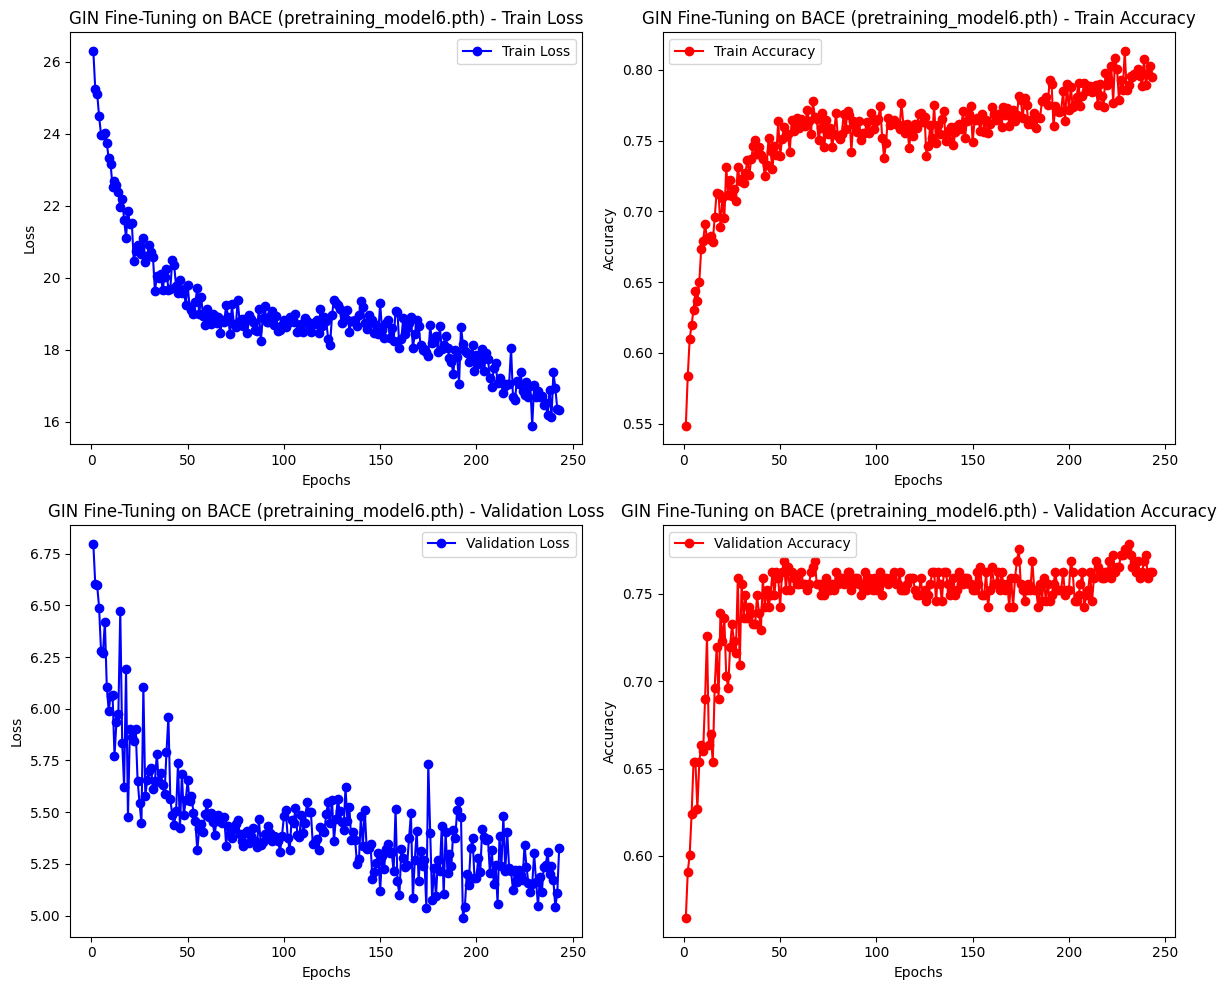

Results for pretraining_model1.pth:
  Final Training Loss: 18.0208
  Final Training Accuracy: 0.7810
  Final Validation Loss: 5.1371
  Final Validation Accuracy: 0.7426
Results for pretraining_model2.pth:
  Final Training Loss: 15.0603
  Final Training Accuracy: 0.8289
  Final Validation Loss: 4.7682
  Final Validation Accuracy: 0.7855
Results for pretraining_model3.pth:
  Final Training Loss: 18.3593
  Final Training Accuracy: 0.7711
  Final Validation Loss: 5.3052
  Final Validation Accuracy: 0.7690
Results for pretraining_model4.pth:
  Final Training Loss: 19.1032
  Final Training Accuracy: 0.7612
  Final Validation Loss: 5.1471
  Final Validation Accuracy: 0.7591
Results for pretraining_model5.pth:
  Final Training Loss: 14.8236
  Final Training Accuracy: 0.8289
  Final Validation Loss: 4.8585
  Final Validation Accuracy: 0.7987
Results for pretraining_model6.pth:
  Final Training Loss: 16.3352
  Final Training Accuracy: 0.7950
  Final Validation Loss: 5.3273
  Final Validation Acc

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Learning rate warmup function
def get_lr_lambda(warmup_steps):
    def lr_lambda(epoch):
        if epoch < warmup_steps:
            return float(epoch) / float(max(1, warmup_steps))
        return 1.0
    return lr_lambda

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=400, early_stopping_patience=50):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "pretraining_model1.pth": "pretrained_models/pretraining_model1.pth",
    "pretraining_model2.pth": "pretrained_models/pretraining_model2.pth",
    "pretraining_model3.pth": "pretrained_models/pretraining_model3.pth",
    "pretraining_model4.pth": "pretrained_models/pretraining_model4.pth",
    "pretraining_model5.pth": "pretrained_models/pretraining_model5.pth",
    "pretraining_model6.pth": "pretrained_models/pretraining_model6.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=5e-4)  # Reduced learning rate
    scheduler = LambdaLR(optimizer, lr_lambda=get_lr_lambda(10))  # Warmup for 10 epochs followed by CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=1e-6, last_epoch=9)  # Increased T_max for longer annealing

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=400, early_stopping_patience=50  # Increased epochs and patience
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


5th Trial
1. reduce learning rate more
2. increase number of epochs more
3. adjust early stopping patience more

Evaluating model with pretraining_model1.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model1.pth
Epoch 0, Train Loss 26.4007, Train Accuracy 0.5438, Val Loss 6.8192, Val Accuracy 0.5446
Epoch 10, Train Loss 24.5152, Train Accuracy 0.6149, Val Loss 6.4834, Val Accuracy 0.6304
Epoch 20, Train Loss 23.6032, Train Accuracy 0.6545, Val Loss 6.2465, Val Accuracy 0.6436
Epoch 30, Train Loss 22.7278, Train Accuracy 0.6711, Val Loss 6.0342, Val Accuracy 0.6700
Epoch 40, Train Loss 23.1273, Train Accuracy 0.6628, Val Loss 6.0319, Val Accuracy 0.6997
Epoch 50, Train Loss 22.4415, Train Accuracy 0.6777, Val Loss 5.8735, Val Accuracy 0.6931
Epoch 60, Train Loss 22.5158, Train Accuracy 0.6884, Val Loss 5.9302, Val Accuracy 0.7228
Epoch 70, Train Loss 22.1878, Train Accuracy 0.6736, Val Loss 5.8852, Val Accuracy 0.7228
Epoch 80, Train Loss 22.1592, Train Accuracy 0.6950, Val Loss 5.8315, Val Accuracy 0.7195
Epoch 90, Train Loss 22.2733, Train Accuracy 0.6975, V

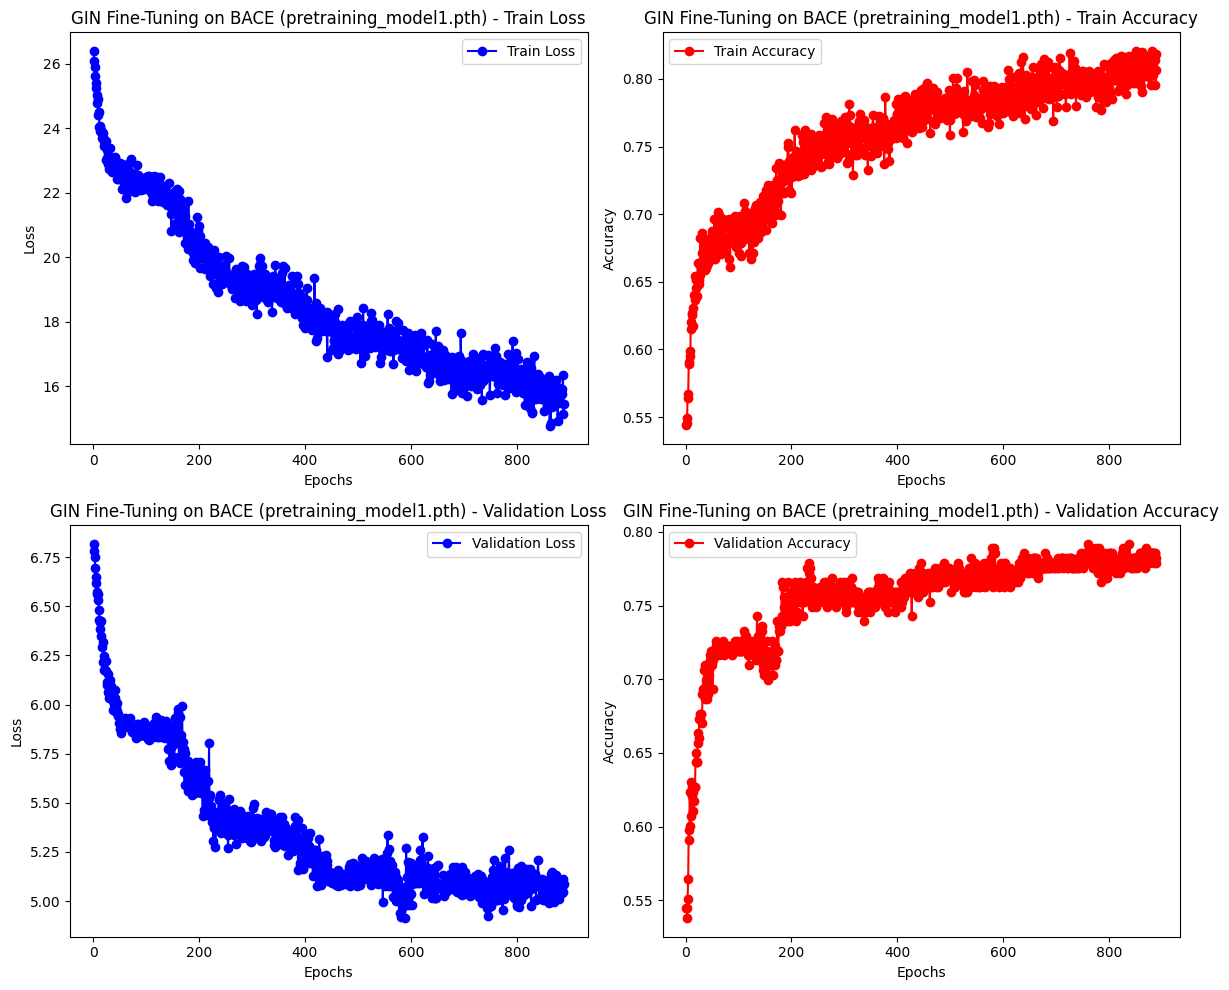

Evaluating model with pretraining_model2.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model2.pth
Epoch 0, Train Loss 26.2187, Train Accuracy 0.5264, Val Loss 6.8737, Val Accuracy 0.5710
Epoch 10, Train Loss 23.9456, Train Accuracy 0.6405, Val Loss 6.5394, Val Accuracy 0.5941
Epoch 20, Train Loss 23.4104, Train Accuracy 0.6603, Val Loss 6.3516, Val Accuracy 0.6238
Epoch 30, Train Loss 23.0723, Train Accuracy 0.6661, Val Loss 6.2783, Val Accuracy 0.6502
Epoch 40, Train Loss 23.0284, Train Accuracy 0.6570, Val Loss 6.1794, Val Accuracy 0.6469
Epoch 50, Train Loss 22.5134, Train Accuracy 0.6926, Val Loss 6.2416, Val Accuracy 0.6535
Epoch 60, Train Loss 22.4041, Train Accuracy 0.6727, Val Loss 6.2792, Val Accuracy 0.6568
Epoch 70, Train Loss 22.7881, Train Accuracy 0.6802, Val Loss 6.2841, Val Accuracy 0.6601
Epoch 80, Train Loss 22.4585, Train Accuracy 0.6983, Val Loss 6.3258, Val Accuracy 0.6502
Epoch 90, Train Loss 22.2427, Train Accuracy 0.6959, V

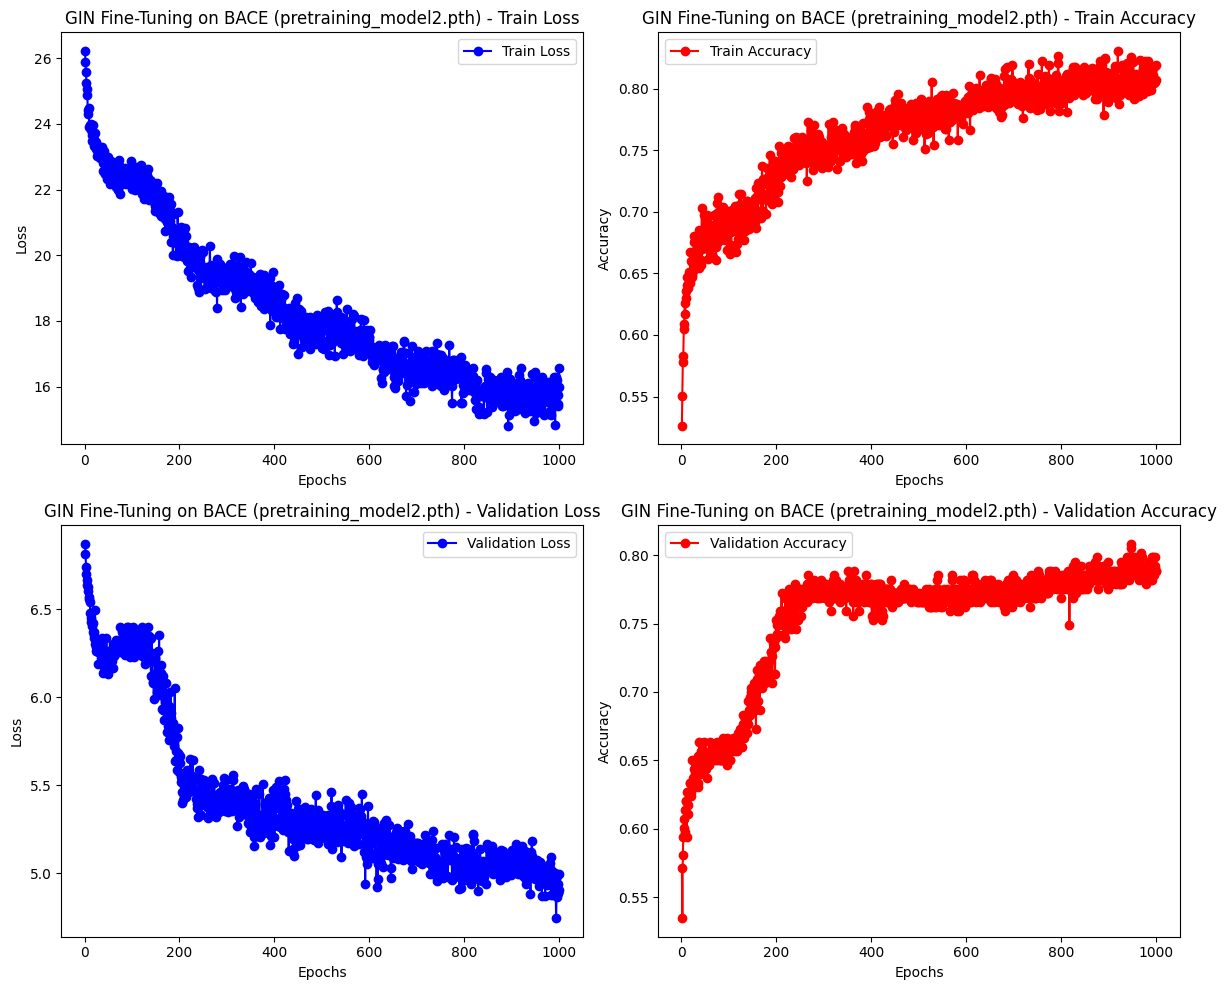

Evaluating model with pretraining_model3.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model3.pth
Epoch 0, Train Loss 26.1681, Train Accuracy 0.5446, Val Loss 6.9044, Val Accuracy 0.5413
Epoch 10, Train Loss 24.3998, Train Accuracy 0.5975, Val Loss 6.6042, Val Accuracy 0.6040
Epoch 20, Train Loss 23.5059, Train Accuracy 0.6570, Val Loss 6.2618, Val Accuracy 0.6436
Epoch 30, Train Loss 23.6352, Train Accuracy 0.6496, Val Loss 6.0643, Val Accuracy 0.6502
Epoch 40, Train Loss 23.2885, Train Accuracy 0.6595, Val Loss 5.9624, Val Accuracy 0.6601
Epoch 50, Train Loss 22.3166, Train Accuracy 0.6884, Val Loss 5.9312, Val Accuracy 0.6634
Epoch 60, Train Loss 22.3709, Train Accuracy 0.6661, Val Loss 5.9113, Val Accuracy 0.6667
Epoch 70, Train Loss 22.7784, Train Accuracy 0.6719, Val Loss 5.8807, Val Accuracy 0.6766
Epoch 80, Train Loss 22.4206, Train Accuracy 0.6769, Val Loss 5.8819, Val Accuracy 0.6700
Epoch 90, Train Loss 22.4596, Train Accuracy 0.6760, V

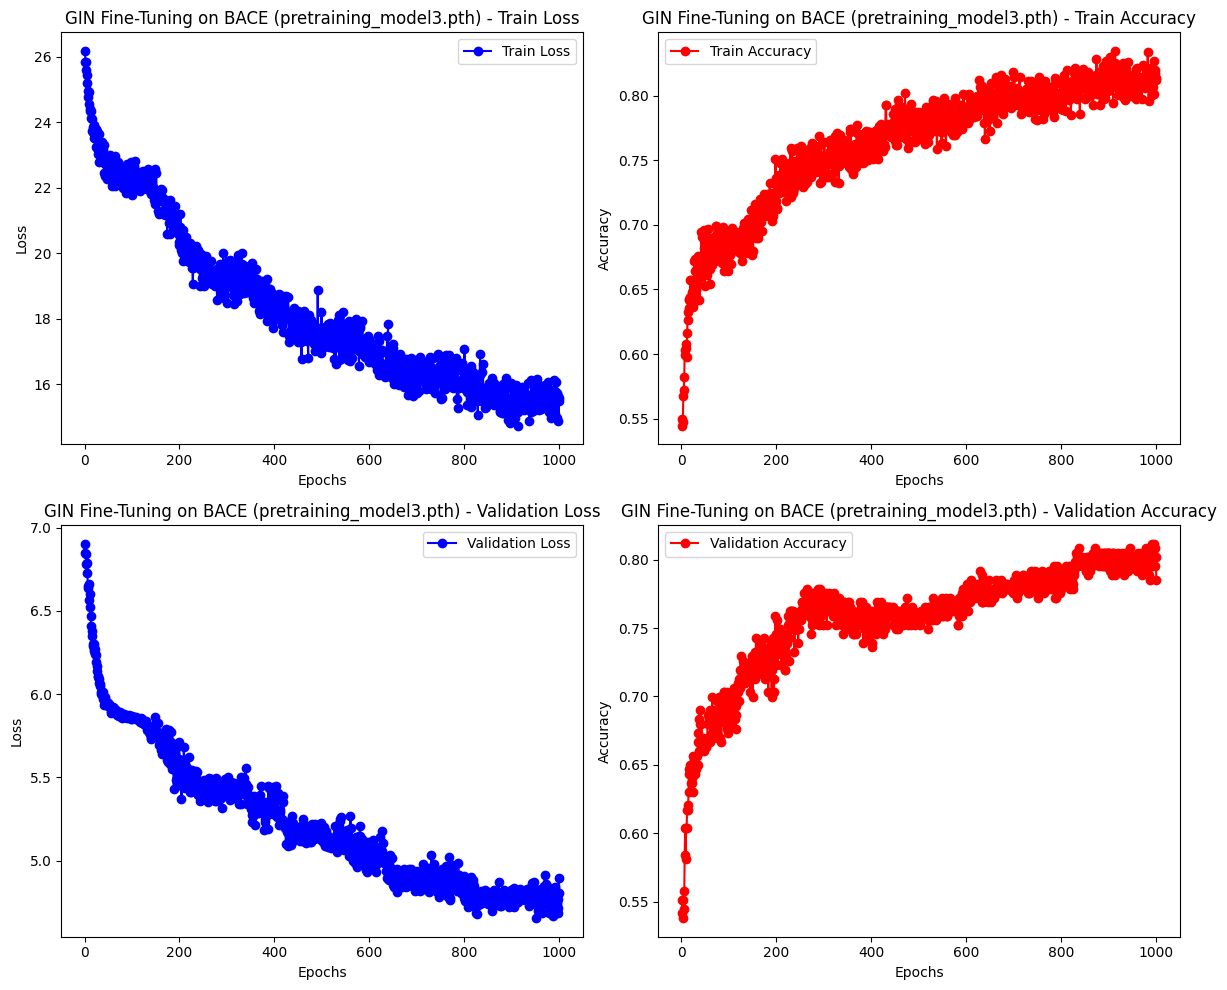

Evaluating model with pretraining_model4.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model4.pth
Epoch 0, Train Loss 27.1224, Train Accuracy 0.4636, Val Loss 6.9580, Val Accuracy 0.4752
Epoch 10, Train Loss 24.2069, Train Accuracy 0.6256, Val Loss 6.4617, Val Accuracy 0.6040
Epoch 20, Train Loss 23.6832, Train Accuracy 0.6570, Val Loss 6.1503, Val Accuracy 0.6634
Epoch 30, Train Loss 22.8241, Train Accuracy 0.6769, Val Loss 6.0147, Val Accuracy 0.6667
Epoch 40, Train Loss 22.5902, Train Accuracy 0.6802, Val Loss 5.9471, Val Accuracy 0.6832
Epoch 50, Train Loss 22.3529, Train Accuracy 0.6843, Val Loss 5.9237, Val Accuracy 0.6865
Epoch 60, Train Loss 22.2832, Train Accuracy 0.6868, Val Loss 5.9055, Val Accuracy 0.6766
Epoch 70, Train Loss 21.9788, Train Accuracy 0.7008, Val Loss 5.9160, Val Accuracy 0.6634
Epoch 80, Train Loss 21.8994, Train Accuracy 0.7000, Val Loss 5.8827, Val Accuracy 0.6799
Epoch 90, Train Loss 22.2899, Train Accuracy 0.6975, V

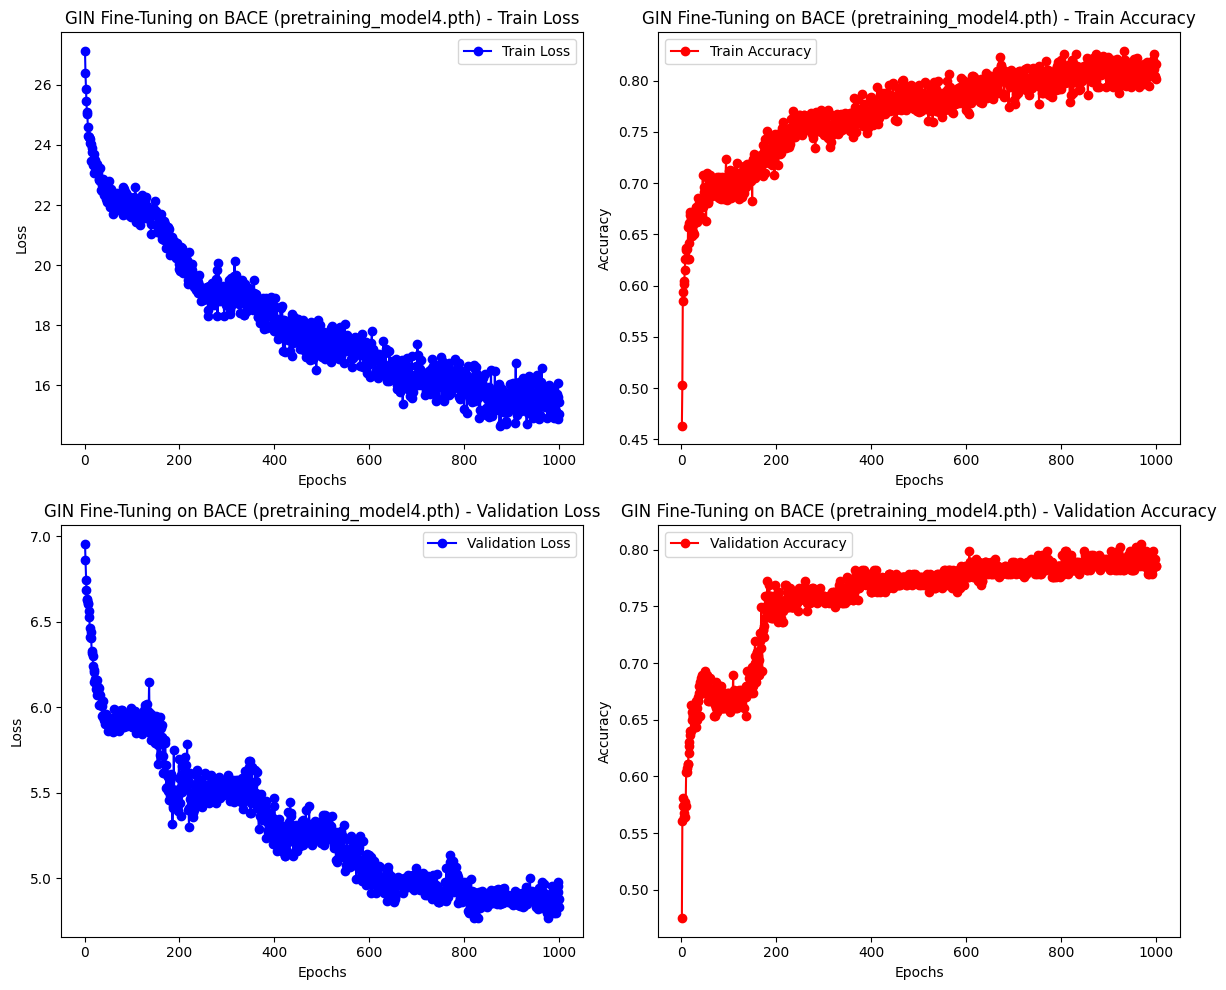

Evaluating model with pretraining_model5.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model5.pth
Epoch 0, Train Loss 27.3845, Train Accuracy 0.4620, Val Loss 6.8894, Val Accuracy 0.5446
Epoch 10, Train Loss 24.4041, Train Accuracy 0.6025, Val Loss 6.6799, Val Accuracy 0.5776
Epoch 20, Train Loss 24.0756, Train Accuracy 0.6264, Val Loss 6.3271, Val Accuracy 0.6502
Epoch 30, Train Loss 23.5231, Train Accuracy 0.6397, Val Loss 6.1087, Val Accuracy 0.6832
Epoch 40, Train Loss 23.0360, Train Accuracy 0.6628, Val Loss 6.0427, Val Accuracy 0.6898
Epoch 50, Train Loss 22.4732, Train Accuracy 0.6950, Val Loss 6.0186, Val Accuracy 0.6898
Epoch 60, Train Loss 22.6985, Train Accuracy 0.6636, Val Loss 6.1229, Val Accuracy 0.6601
Epoch 70, Train Loss 22.4316, Train Accuracy 0.6760, Val Loss 6.0704, Val Accuracy 0.6667
Epoch 80, Train Loss 22.9095, Train Accuracy 0.6777, Val Loss 6.1223, Val Accuracy 0.6634
Epoch 90, Train Loss 22.7890, Train Accuracy 0.6826, V

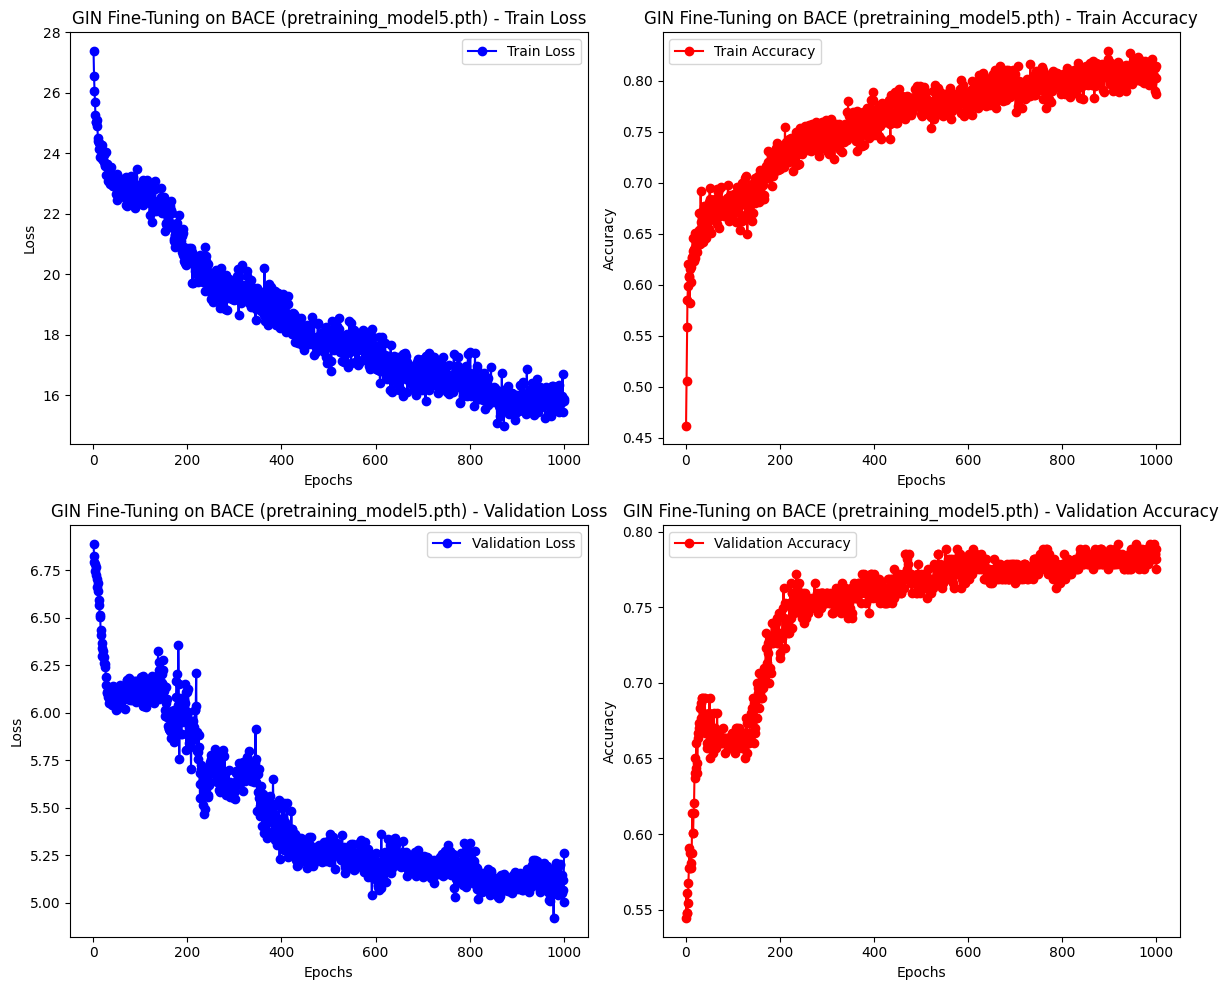

Evaluating model with pretraining_model6.pth pretrained weights.
Loaded pretrained weights from pretrained_models/pretraining_model6.pth
Epoch 0, Train Loss 26.5340, Train Accuracy 0.4967, Val Loss 6.9858, Val Accuracy 0.4818
Epoch 10, Train Loss 24.1439, Train Accuracy 0.6198, Val Loss 6.6491, Val Accuracy 0.5941
Epoch 20, Train Loss 24.1804, Train Accuracy 0.6273, Val Loss 6.3960, Val Accuracy 0.6205
Epoch 30, Train Loss 23.6012, Train Accuracy 0.6380, Val Loss 6.2905, Val Accuracy 0.6337
Epoch 40, Train Loss 23.3553, Train Accuracy 0.6620, Val Loss 6.2073, Val Accuracy 0.6502
Epoch 50, Train Loss 23.0377, Train Accuracy 0.6793, Val Loss 6.2608, Val Accuracy 0.6568
Epoch 60, Train Loss 22.6954, Train Accuracy 0.6719, Val Loss 6.1732, Val Accuracy 0.6601
Epoch 70, Train Loss 22.5587, Train Accuracy 0.6818, Val Loss 6.1661, Val Accuracy 0.6700
Epoch 80, Train Loss 22.6200, Train Accuracy 0.6860, Val Loss 6.1902, Val Accuracy 0.6832
Epoch 90, Train Loss 22.8314, Train Accuracy 0.6810, V

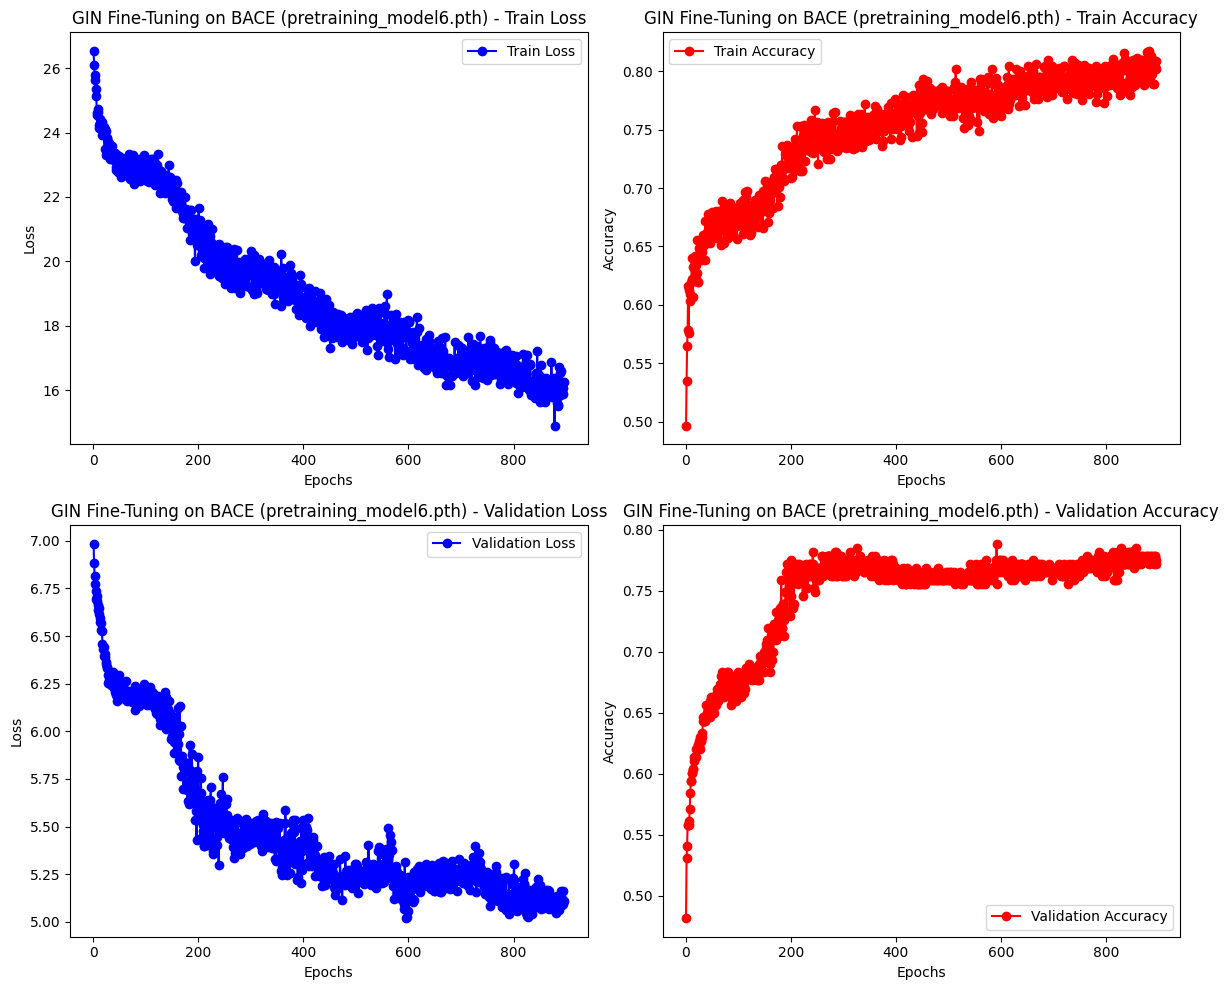

Results for pretraining_model1.pth:
  Final Training Loss: 15.4577
  Final Training Accuracy: 0.8066
  Final Validation Loss: 5.0882
  Final Validation Accuracy: 0.7822
Results for pretraining_model2.pth:
  Final Training Loss: 15.9953
  Final Training Accuracy: 0.8190
  Final Validation Loss: 4.9011
  Final Validation Accuracy: 0.7888
Results for pretraining_model3.pth:
  Final Training Loss: 15.5931
  Final Training Accuracy: 0.8124
  Final Validation Loss: 4.8059
  Final Validation Accuracy: 0.7855
Results for pretraining_model4.pth:
  Final Training Loss: 15.0464
  Final Training Accuracy: 0.8165
  Final Validation Loss: 4.8332
  Final Validation Accuracy: 0.7855
Results for pretraining_model5.pth:
  Final Training Loss: 15.8801
  Final Training Accuracy: 0.7868
  Final Validation Loss: 5.2643
  Final Validation Accuracy: 0.7756
Results for pretraining_model6.pth:
  Final Training Loss: 16.2410
  Final Training Accuracy: 0.8091
  Final Validation Loss: 5.1112
  Final Validation Acc

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Learning rate warmup function
def get_lr_lambda(warmup_steps):
    def lr_lambda(epoch):
        if epoch < warmup_steps:
            return float(epoch) / float(max(1, warmup_steps))
        return 1.0
    return lr_lambda

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=400, early_stopping_patience=150):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "pretraining_model1.pth": "pretrained_models/pretraining_model1.pth",
    "pretraining_model2.pth": "pretrained_models/pretraining_model2.pth",
    "pretraining_model3.pth": "pretrained_models/pretraining_model3.pth",
    "pretraining_model4.pth": "pretrained_models/pretraining_model4.pth",
    "pretraining_model5.pth": "pretrained_models/pretraining_model5.pth",
    "pretraining_model6.pth": "pretrained_models/pretraining_model6.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-4)  # Reduced learning rate
    scheduler = LambdaLR(optimizer, lr_lambda=get_lr_lambda(10))  # Warmup for 10 epochs followed by CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=1e-6, last_epoch=9)  # Increased T_max for longer annealing

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=1000, early_stopping_patience=300  # Increased epochs and patience
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


Try with another weights used in paper

In [22]:
from google.colab import files
file = files.upload()

Saving GraphCL.pth to GraphCL.pth
Saving Contextual.pth to Contextual.pth
Saving Motif.pth to Motif.pth
Saving GPT_TNN.pth to GPT_TNN.pth
Saving CP.pth to CP.pth
Saving IG.pth to IG.pth
Saving AM.pth to AM.pth
Saving EP.pth to EP.pth


In [23]:
import os
# Create a directory for the pretrained models
os.makedirs('pretrained_models', exist_ok=True)

# Save the uploaded files to the directory
for filename in file.keys():
    with open(os.path.join('pretrained_models', filename), 'wb') as f:
        f.write(file[filename])

# List the files to verify
print(os.listdir('pretrained_models'))

['pretraining_model6.pth', 'pretraining_model2.pth', 'EP.pth', 'IG.pth', 'AM.pth', 'pretraining_model1.pth', 'pretraining_model4.pth', 'Contextual.pth', 'CP.pth', 'pretraining_model3.pth', 'GPT_TNN.pth', 'pretraining_model5.pth', 'Motif.pth', 'GraphCL.pth']


In [24]:
import torch

# Load the pretrained model file
model_path = 'pretrained_models/GraphCL.pth'
pretrained_state_dict = torch.load(model_path, map_location='cpu')

# Print the keys in the state dictionary to understand the contents
for key, value in pretrained_state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")


x_embedding1.weight: torch.Size([120, 300])
x_embedding2.weight: torch.Size([3, 300])
gnns.0.mlp.0.weight: torch.Size([600, 300])
gnns.0.mlp.0.bias: torch.Size([600])
gnns.0.mlp.2.weight: torch.Size([300, 600])
gnns.0.mlp.2.bias: torch.Size([300])
gnns.0.edge_embedding1.weight: torch.Size([6, 300])
gnns.0.edge_embedding2.weight: torch.Size([3, 300])
gnns.1.mlp.0.weight: torch.Size([600, 300])
gnns.1.mlp.0.bias: torch.Size([600])
gnns.1.mlp.2.weight: torch.Size([300, 600])
gnns.1.mlp.2.bias: torch.Size([300])
gnns.1.edge_embedding1.weight: torch.Size([6, 300])
gnns.1.edge_embedding2.weight: torch.Size([3, 300])
gnns.2.mlp.0.weight: torch.Size([600, 300])
gnns.2.mlp.0.bias: torch.Size([600])
gnns.2.mlp.2.weight: torch.Size([300, 600])
gnns.2.mlp.2.bias: torch.Size([300])
gnns.2.edge_embedding1.weight: torch.Size([6, 300])
gnns.2.edge_embedding2.weight: torch.Size([3, 300])
gnns.3.mlp.0.weight: torch.Size([600, 300])
gnns.3.mlp.0.bias: torch.Size([600])
gnns.3.mlp.2.weight: torch.Size([30

-> Use Model with Trial 6 with new weights

Evaluating model with GraphCL.pth pretrained weights.
Loaded pretrained weights from pretrained_models/GraphCL.pth
Epoch 0, Train Loss 26.4007, Train Accuracy 0.5438, Val Loss 6.8192, Val Accuracy 0.5446
Epoch 10, Train Loss 24.5152, Train Accuracy 0.6149, Val Loss 6.4834, Val Accuracy 0.6304
Epoch 20, Train Loss 23.6032, Train Accuracy 0.6545, Val Loss 6.2465, Val Accuracy 0.6436
Epoch 30, Train Loss 22.7278, Train Accuracy 0.6711, Val Loss 6.0342, Val Accuracy 0.6700
Epoch 40, Train Loss 23.1273, Train Accuracy 0.6628, Val Loss 6.0319, Val Accuracy 0.6997
Epoch 50, Train Loss 22.4415, Train Accuracy 0.6777, Val Loss 5.8735, Val Accuracy 0.6931
Epoch 60, Train Loss 22.5158, Train Accuracy 0.6884, Val Loss 5.9302, Val Accuracy 0.7228
Epoch 70, Train Loss 22.1878, Train Accuracy 0.6736, Val Loss 5.8852, Val Accuracy 0.7228
Epoch 80, Train Loss 22.1592, Train Accuracy 0.6950, Val Loss 5.8315, Val Accuracy 0.7195
Epoch 90, Train Loss 22.2733, Train Accuracy 0.6975, Val Loss 5.8820, Val Ac

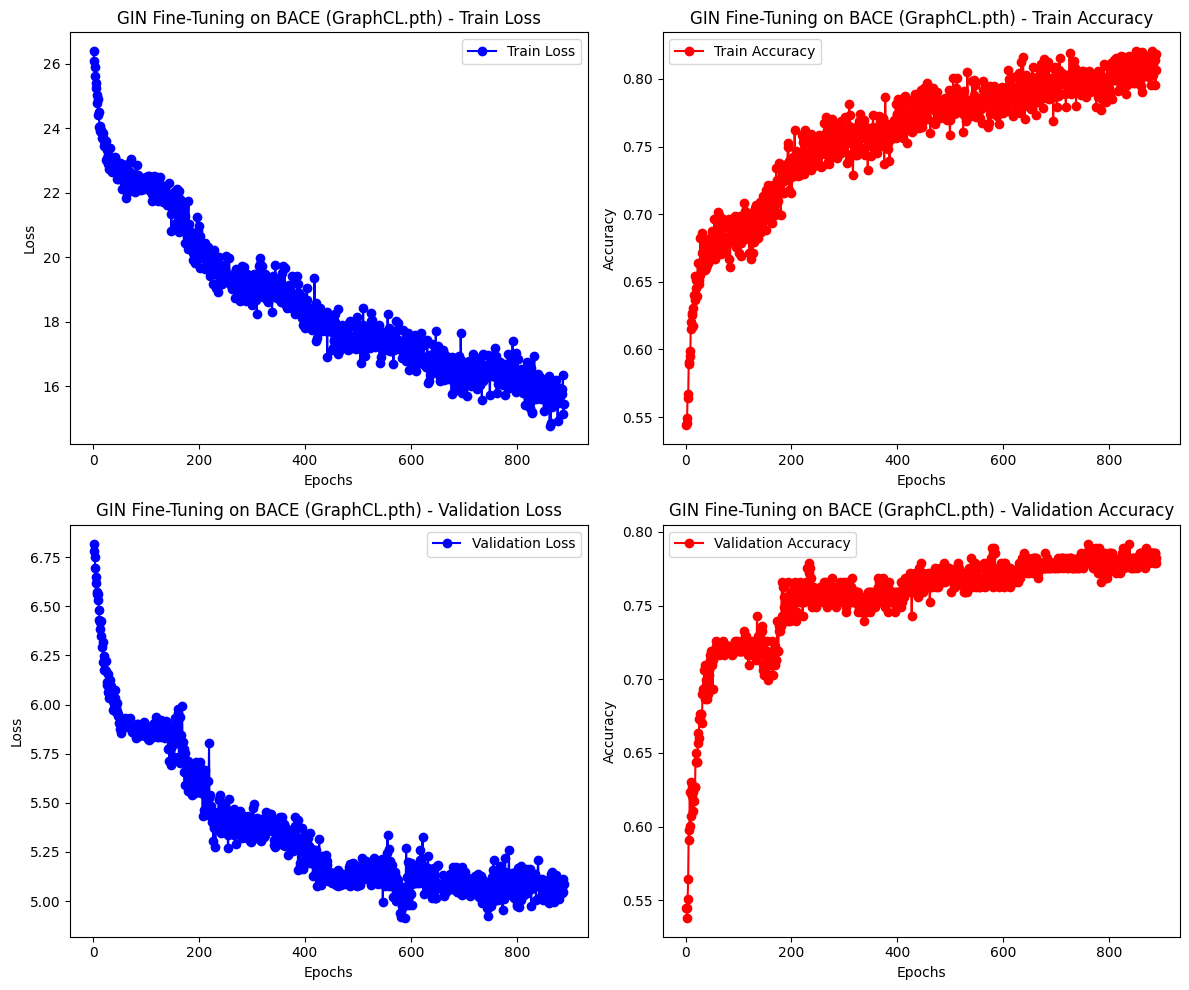

Evaluating model with Contextual.pth pretrained weights.
Loaded pretrained weights from pretrained_models/Contextual.pth
Epoch 0, Train Loss 26.2187, Train Accuracy 0.5264, Val Loss 6.8737, Val Accuracy 0.5710
Epoch 10, Train Loss 23.9456, Train Accuracy 0.6405, Val Loss 6.5394, Val Accuracy 0.5941
Epoch 20, Train Loss 23.4104, Train Accuracy 0.6603, Val Loss 6.3516, Val Accuracy 0.6238
Epoch 30, Train Loss 23.0723, Train Accuracy 0.6661, Val Loss 6.2783, Val Accuracy 0.6502
Epoch 40, Train Loss 23.0284, Train Accuracy 0.6570, Val Loss 6.1794, Val Accuracy 0.6469
Epoch 50, Train Loss 22.5134, Train Accuracy 0.6926, Val Loss 6.2416, Val Accuracy 0.6535
Epoch 60, Train Loss 22.4041, Train Accuracy 0.6727, Val Loss 6.2792, Val Accuracy 0.6568
Epoch 70, Train Loss 22.7881, Train Accuracy 0.6802, Val Loss 6.2841, Val Accuracy 0.6601
Epoch 80, Train Loss 22.4585, Train Accuracy 0.6983, Val Loss 6.3258, Val Accuracy 0.6502
Epoch 90, Train Loss 22.2427, Train Accuracy 0.6959, Val Loss 6.3168, 

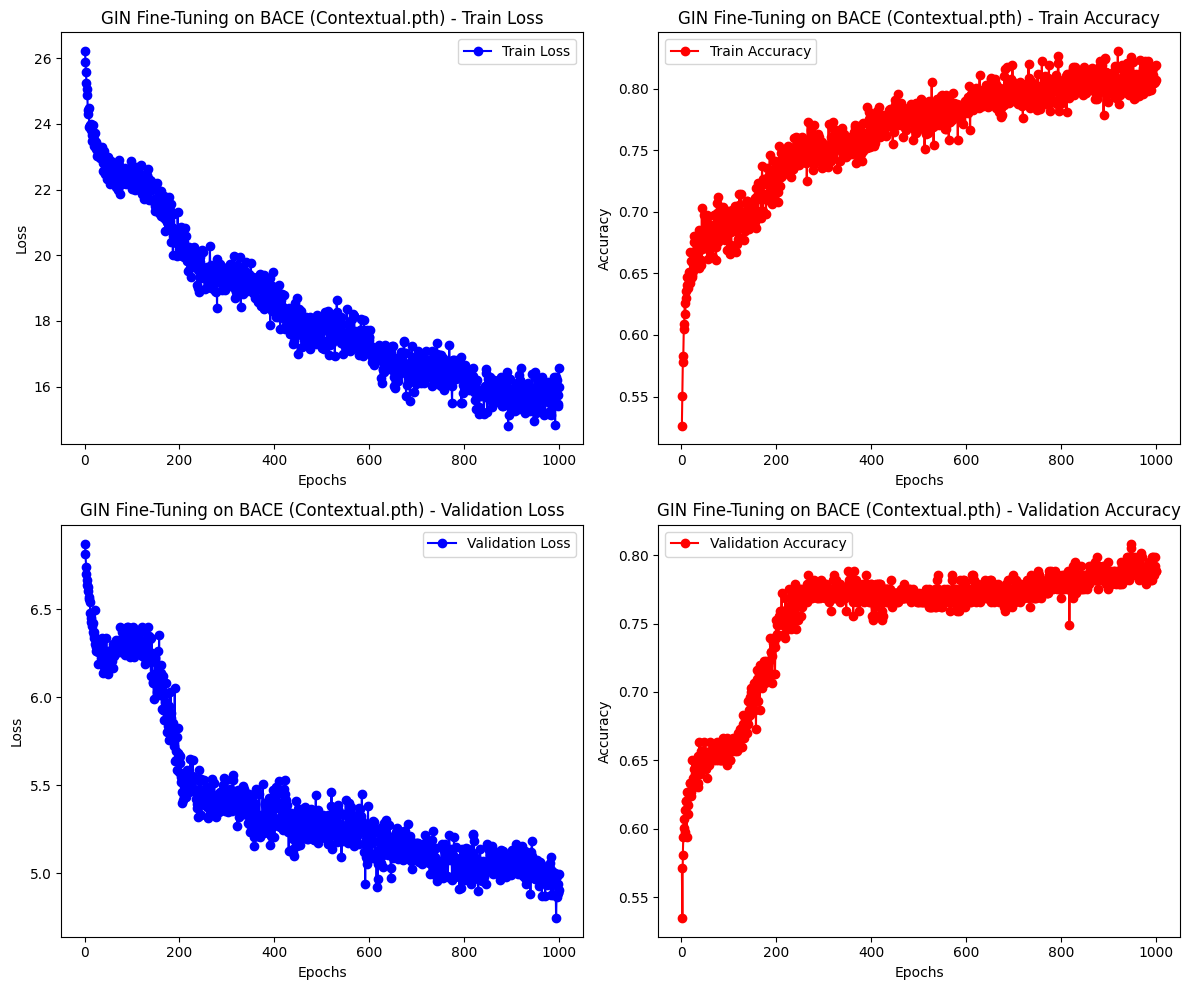

Evaluating model with Motif.pth pretrained weights.
Loaded pretrained weights from pretrained_models/Motif.pth
Epoch 0, Train Loss 26.1681, Train Accuracy 0.5446, Val Loss 6.9044, Val Accuracy 0.5413
Epoch 10, Train Loss 24.3998, Train Accuracy 0.5975, Val Loss 6.6042, Val Accuracy 0.6040
Epoch 20, Train Loss 23.5059, Train Accuracy 0.6570, Val Loss 6.2618, Val Accuracy 0.6436
Epoch 30, Train Loss 23.6352, Train Accuracy 0.6496, Val Loss 6.0643, Val Accuracy 0.6502
Epoch 40, Train Loss 23.2885, Train Accuracy 0.6595, Val Loss 5.9624, Val Accuracy 0.6601
Epoch 50, Train Loss 22.3166, Train Accuracy 0.6884, Val Loss 5.9312, Val Accuracy 0.6634
Epoch 60, Train Loss 22.3709, Train Accuracy 0.6661, Val Loss 5.9113, Val Accuracy 0.6667
Epoch 70, Train Loss 22.7784, Train Accuracy 0.6719, Val Loss 5.8807, Val Accuracy 0.6766
Epoch 80, Train Loss 22.4206, Train Accuracy 0.6769, Val Loss 5.8819, Val Accuracy 0.6700
Epoch 90, Train Loss 22.4596, Train Accuracy 0.6760, Val Loss 5.8657, Val Accura

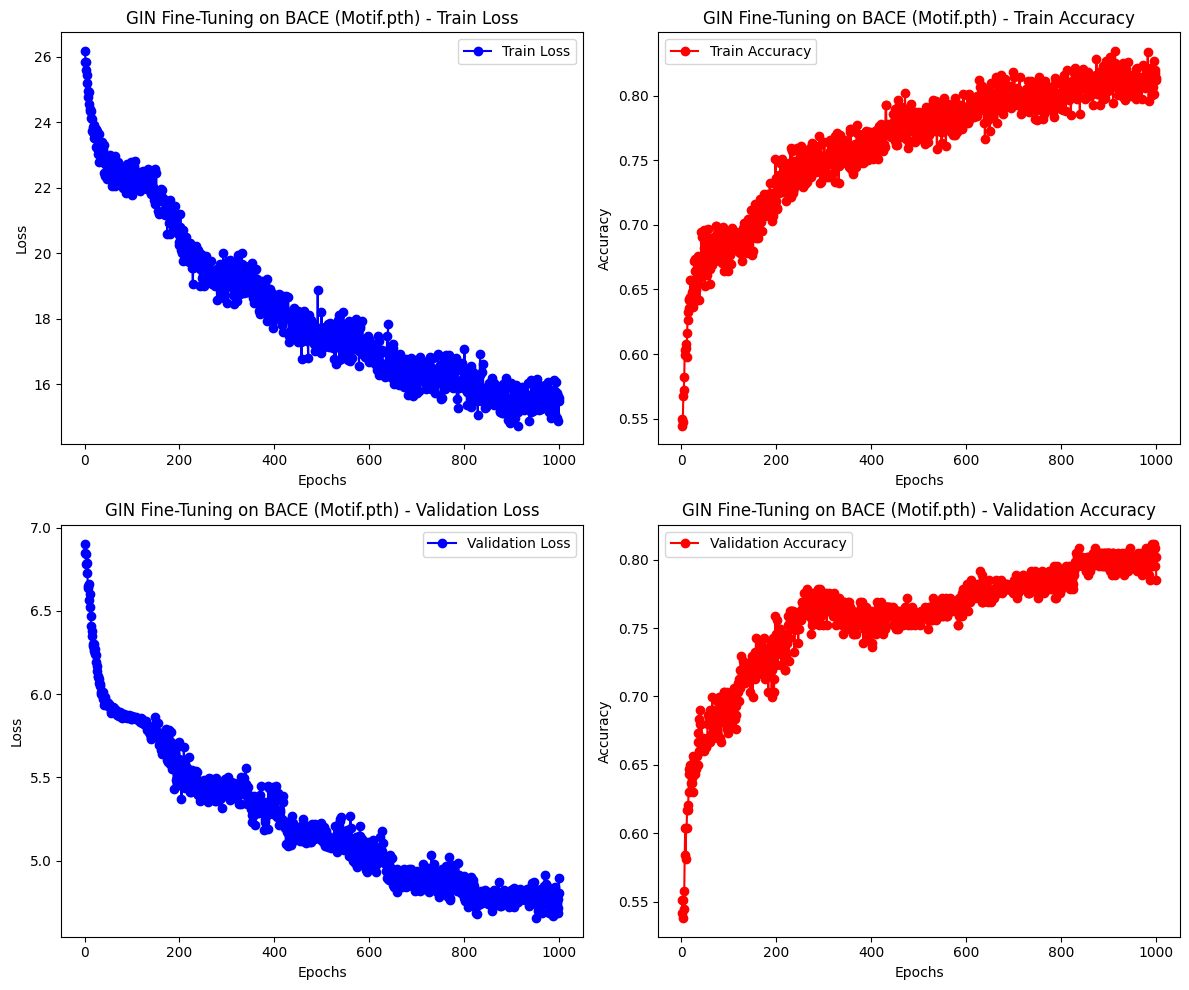

Evaluating model with GPT_TNN.pth pretrained weights.
Loaded pretrained weights from pretrained_models/GPT_TNN.pth
Epoch 0, Train Loss 27.1224, Train Accuracy 0.4636, Val Loss 6.9580, Val Accuracy 0.4752
Epoch 10, Train Loss 24.2069, Train Accuracy 0.6256, Val Loss 6.4617, Val Accuracy 0.6040
Epoch 20, Train Loss 23.6832, Train Accuracy 0.6570, Val Loss 6.1503, Val Accuracy 0.6634
Epoch 30, Train Loss 22.8241, Train Accuracy 0.6769, Val Loss 6.0147, Val Accuracy 0.6667
Epoch 40, Train Loss 22.5902, Train Accuracy 0.6802, Val Loss 5.9471, Val Accuracy 0.6832
Epoch 50, Train Loss 22.3529, Train Accuracy 0.6843, Val Loss 5.9237, Val Accuracy 0.6865
Epoch 60, Train Loss 22.2832, Train Accuracy 0.6868, Val Loss 5.9055, Val Accuracy 0.6766
Epoch 70, Train Loss 21.9788, Train Accuracy 0.7008, Val Loss 5.9160, Val Accuracy 0.6634
Epoch 80, Train Loss 21.8994, Train Accuracy 0.7000, Val Loss 5.8827, Val Accuracy 0.6799
Epoch 90, Train Loss 22.2899, Train Accuracy 0.6975, Val Loss 5.9085, Val Ac

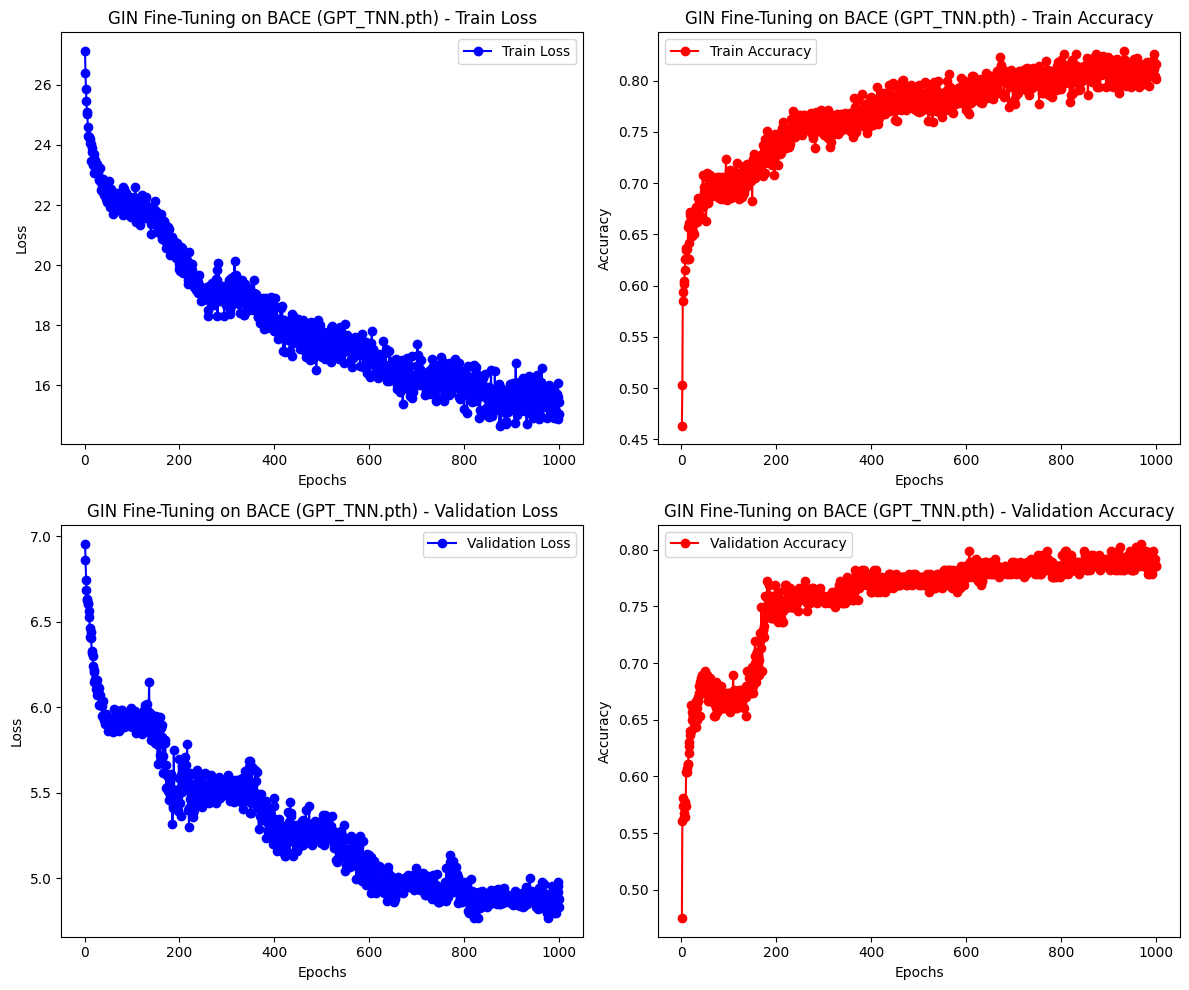

Evaluating model with CP.pth pretrained weights.
Loaded pretrained weights from pretrained_models/CP.pth
Epoch 0, Train Loss 27.3845, Train Accuracy 0.4620, Val Loss 6.8894, Val Accuracy 0.5446
Epoch 10, Train Loss 24.4041, Train Accuracy 0.6025, Val Loss 6.6799, Val Accuracy 0.5776
Epoch 20, Train Loss 24.0756, Train Accuracy 0.6264, Val Loss 6.3271, Val Accuracy 0.6502
Epoch 30, Train Loss 23.5231, Train Accuracy 0.6397, Val Loss 6.1087, Val Accuracy 0.6832
Epoch 40, Train Loss 23.0360, Train Accuracy 0.6628, Val Loss 6.0427, Val Accuracy 0.6898
Epoch 50, Train Loss 22.4732, Train Accuracy 0.6950, Val Loss 6.0186, Val Accuracy 0.6898
Epoch 60, Train Loss 22.6985, Train Accuracy 0.6636, Val Loss 6.1229, Val Accuracy 0.6601
Epoch 70, Train Loss 22.4316, Train Accuracy 0.6760, Val Loss 6.0704, Val Accuracy 0.6667
Epoch 80, Train Loss 22.9095, Train Accuracy 0.6777, Val Loss 6.1223, Val Accuracy 0.6634
Epoch 90, Train Loss 22.7890, Train Accuracy 0.6826, Val Loss 6.0542, Val Accuracy 0.6

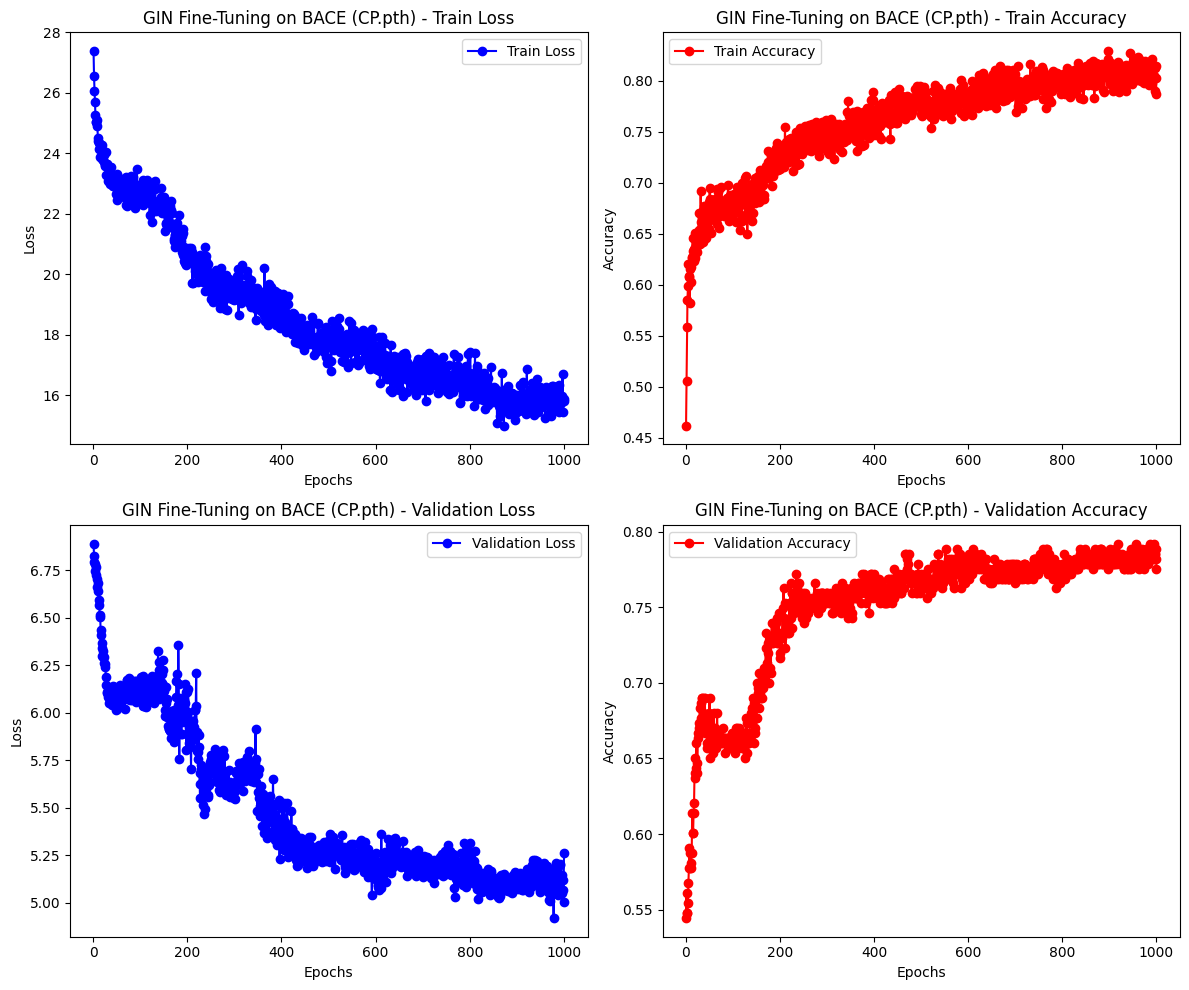

Evaluating model with IG.pth pretrained weights.
Loaded pretrained weights from pretrained_models/IG.pth
Epoch 0, Train Loss 26.5340, Train Accuracy 0.4967, Val Loss 6.9858, Val Accuracy 0.4818
Epoch 10, Train Loss 24.1439, Train Accuracy 0.6198, Val Loss 6.6491, Val Accuracy 0.5941
Epoch 20, Train Loss 24.1804, Train Accuracy 0.6273, Val Loss 6.3960, Val Accuracy 0.6205
Epoch 30, Train Loss 23.6012, Train Accuracy 0.6380, Val Loss 6.2905, Val Accuracy 0.6337
Epoch 40, Train Loss 23.3553, Train Accuracy 0.6620, Val Loss 6.2073, Val Accuracy 0.6502
Epoch 50, Train Loss 23.0377, Train Accuracy 0.6793, Val Loss 6.2608, Val Accuracy 0.6568
Epoch 60, Train Loss 22.6954, Train Accuracy 0.6719, Val Loss 6.1732, Val Accuracy 0.6601
Epoch 70, Train Loss 22.5587, Train Accuracy 0.6818, Val Loss 6.1661, Val Accuracy 0.6700
Epoch 80, Train Loss 22.6200, Train Accuracy 0.6860, Val Loss 6.1902, Val Accuracy 0.6832
Epoch 90, Train Loss 22.8314, Train Accuracy 0.6810, Val Loss 6.1561, Val Accuracy 0.6

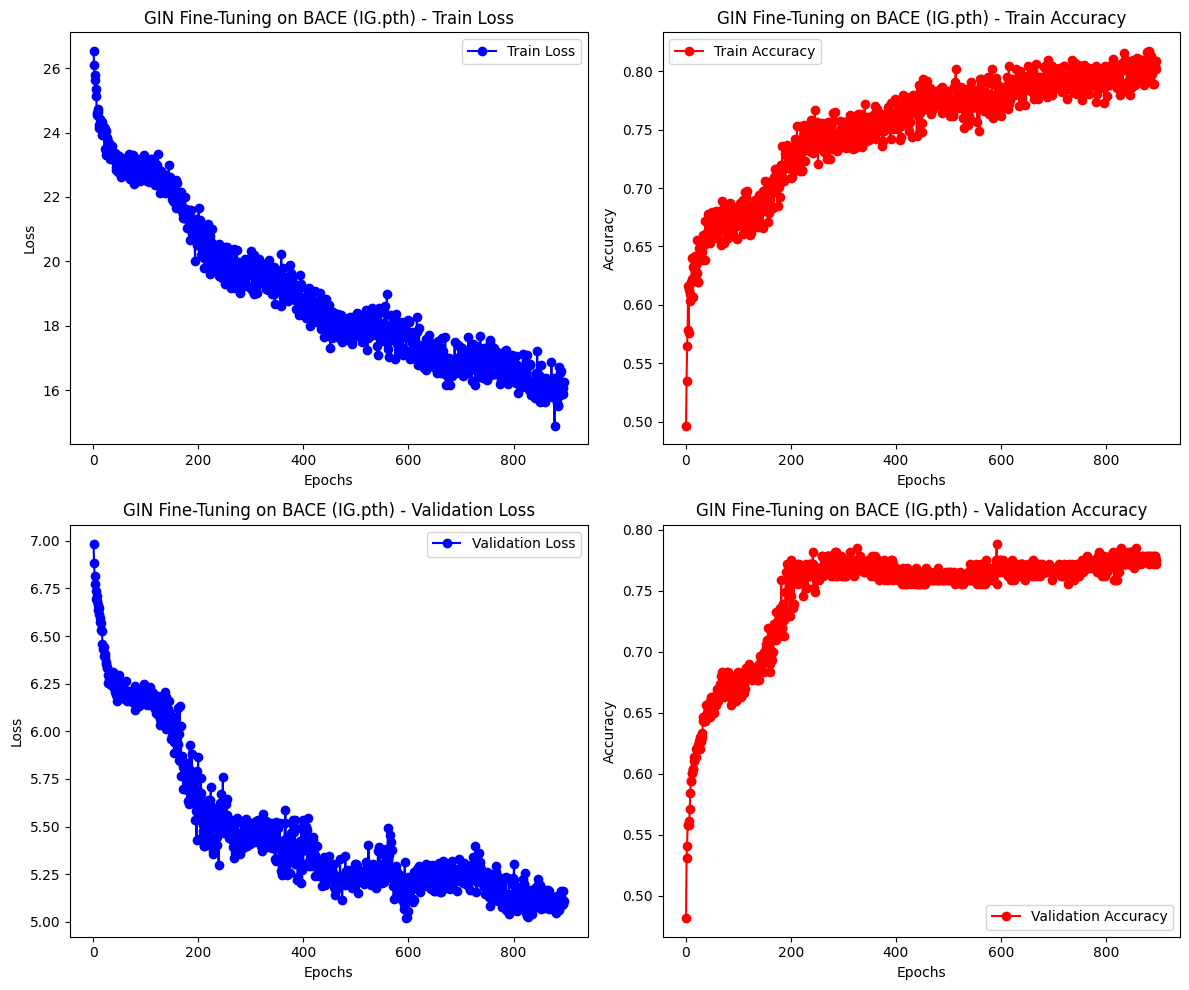

Evaluating model with AM.pth pretrained weights.
Loaded pretrained weights from pretrained_models/AM.pth
Epoch 0, Train Loss 26.1630, Train Accuracy 0.5388, Val Loss 6.8716, Val Accuracy 0.5050
Epoch 10, Train Loss 24.0115, Train Accuracy 0.6298, Val Loss 6.3912, Val Accuracy 0.6238
Epoch 20, Train Loss 23.5421, Train Accuracy 0.6595, Val Loss 6.1415, Val Accuracy 0.6733
Epoch 30, Train Loss 22.6951, Train Accuracy 0.6760, Val Loss 5.9130, Val Accuracy 0.6799
Epoch 40, Train Loss 22.9226, Train Accuracy 0.6694, Val Loss 5.9221, Val Accuracy 0.6832
Epoch 50, Train Loss 22.5332, Train Accuracy 0.6868, Val Loss 5.8787, Val Accuracy 0.6898
Epoch 60, Train Loss 22.4844, Train Accuracy 0.6802, Val Loss 5.8663, Val Accuracy 0.6931
Epoch 70, Train Loss 22.5615, Train Accuracy 0.6901, Val Loss 5.8313, Val Accuracy 0.6865
Epoch 80, Train Loss 21.9675, Train Accuracy 0.7050, Val Loss 5.7919, Val Accuracy 0.6931
Epoch 90, Train Loss 22.2459, Train Accuracy 0.7066, Val Loss 5.7897, Val Accuracy 0.6

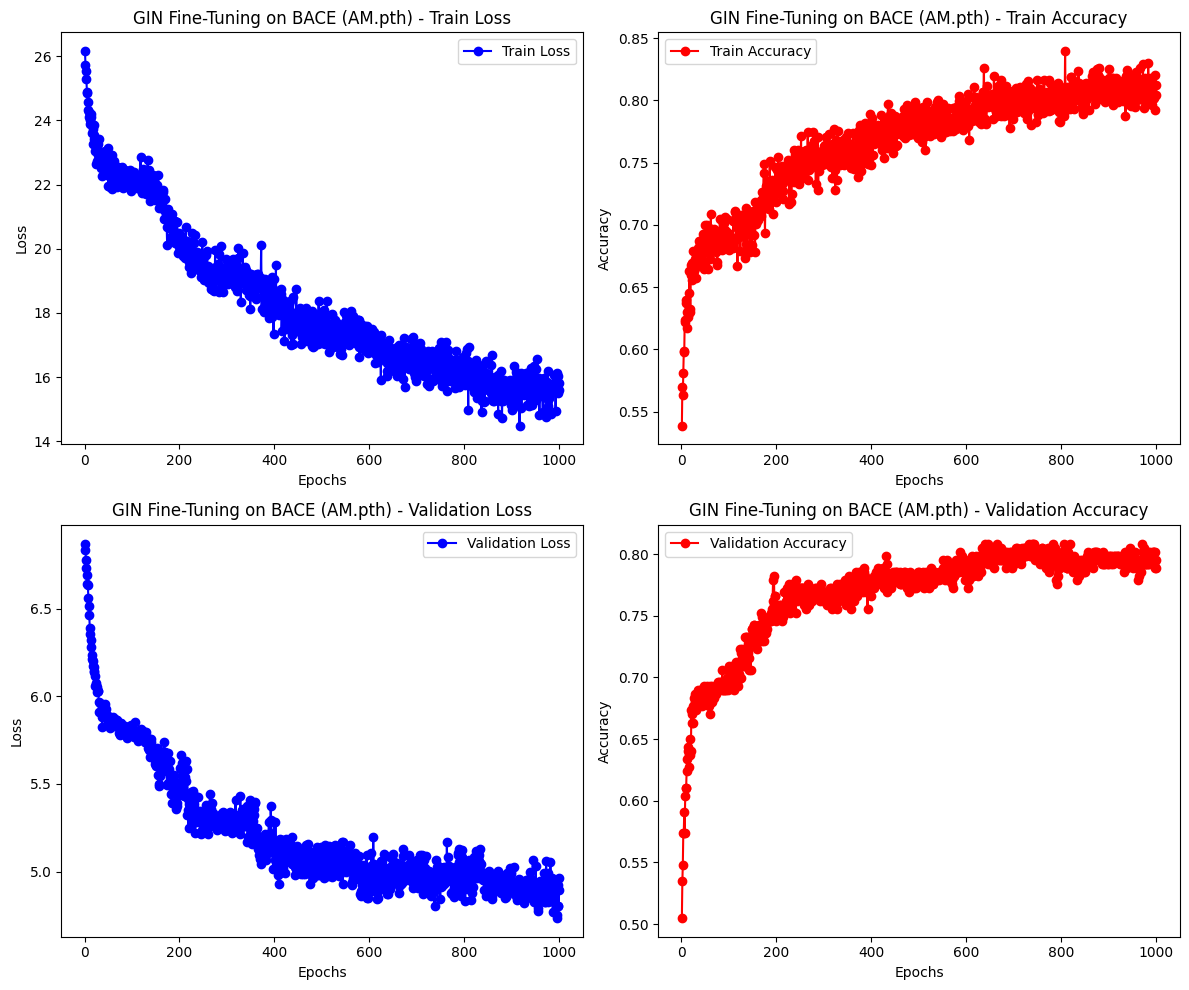

Evaluating model with EP.pth pretrained weights.
Loaded pretrained weights from pretrained_models/EP.pth
Epoch 0, Train Loss 26.0610, Train Accuracy 0.5455, Val Loss 6.8619, Val Accuracy 0.5809
Epoch 10, Train Loss 24.0907, Train Accuracy 0.6281, Val Loss 6.3900, Val Accuracy 0.6535
Epoch 20, Train Loss 23.7068, Train Accuracy 0.6479, Val Loss 6.1767, Val Accuracy 0.6502
Epoch 30, Train Loss 23.0219, Train Accuracy 0.6521, Val Loss 6.0710, Val Accuracy 0.6634
Epoch 40, Train Loss 22.6299, Train Accuracy 0.6711, Val Loss 6.0190, Val Accuracy 0.6667
Epoch 50, Train Loss 22.5441, Train Accuracy 0.6835, Val Loss 5.9813, Val Accuracy 0.7030
Epoch 60, Train Loss 22.5161, Train Accuracy 0.6967, Val Loss 5.9319, Val Accuracy 0.6865
Epoch 70, Train Loss 22.5774, Train Accuracy 0.6785, Val Loss 5.9353, Val Accuracy 0.6865
Epoch 80, Train Loss 22.2931, Train Accuracy 0.6950, Val Loss 5.9108, Val Accuracy 0.6832
Epoch 90, Train Loss 22.3450, Train Accuracy 0.6769, Val Loss 5.9236, Val Accuracy 0.6

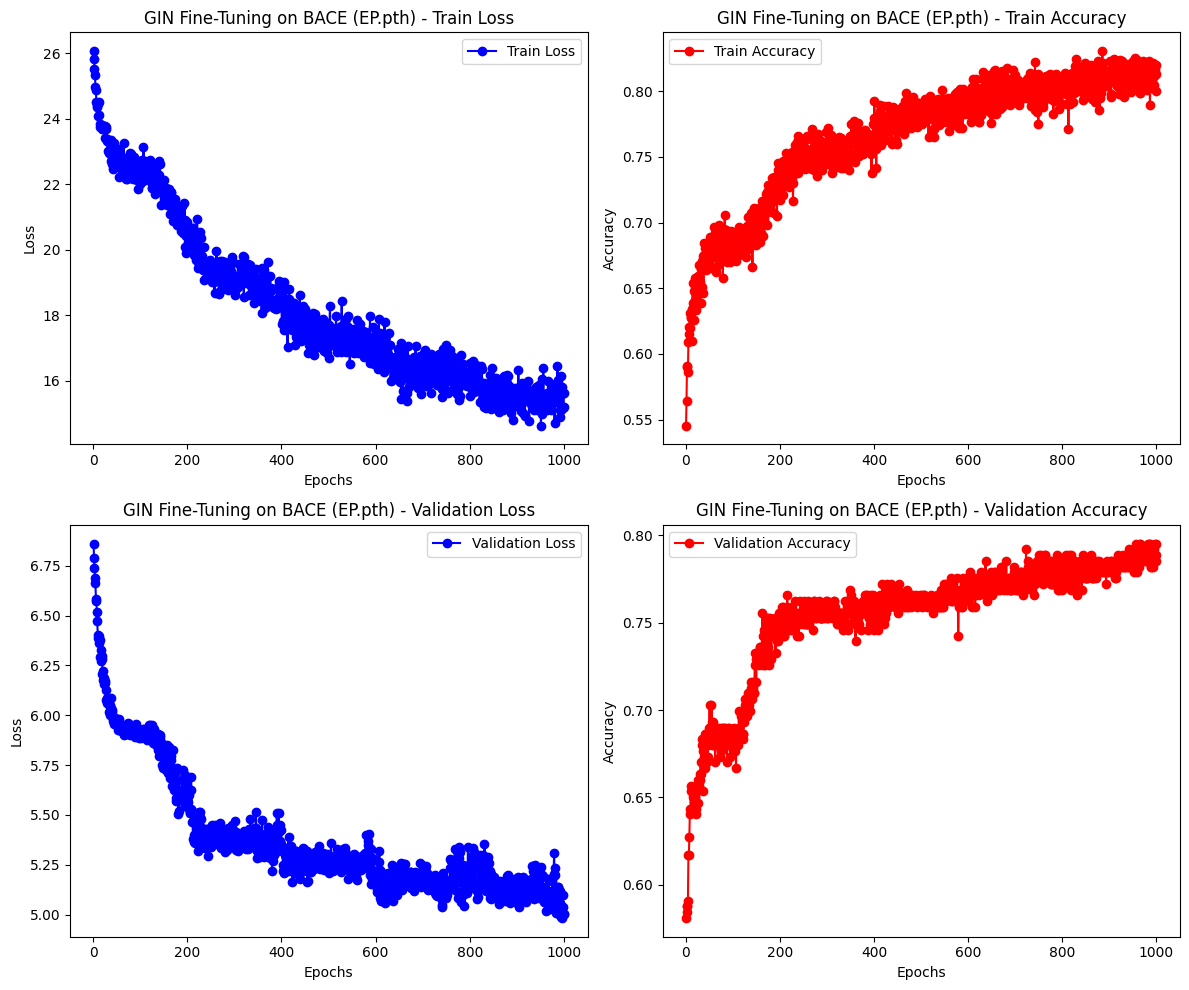

Results for GraphCL.pth:
  Final Training Loss: 15.4577
  Final Training Accuracy: 0.8066
  Final Validation Loss: 5.0882
  Final Validation Accuracy: 0.7822
Results for Contextual.pth:
  Final Training Loss: 15.9953
  Final Training Accuracy: 0.8190
  Final Validation Loss: 4.9011
  Final Validation Accuracy: 0.7888
Results for Motif.pth:
  Final Training Loss: 15.5931
  Final Training Accuracy: 0.8124
  Final Validation Loss: 4.8059
  Final Validation Accuracy: 0.7855
Results for GPT_TNN.pth:
  Final Training Loss: 15.0464
  Final Training Accuracy: 0.8165
  Final Validation Loss: 4.8332
  Final Validation Accuracy: 0.7855
Results for CP.pth:
  Final Training Loss: 15.8801
  Final Training Accuracy: 0.7868
  Final Validation Loss: 5.2643
  Final Validation Accuracy: 0.7756
Results for IG.pth:
  Final Training Loss: 16.2410
  Final Training Accuracy: 0.8091
  Final Validation Loss: 5.1112
  Final Validation Accuracy: 0.7756
Results for AM.pth:
  Final Training Loss: 15.8093
  Final Tr

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.conv4 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn4 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Learning rate warmup function
def get_lr_lambda(warmup_steps):
    def lr_lambda(epoch):
        if epoch < warmup_steps:
            return float(epoch) / float(max(1, warmup_steps))
        return 1.0
    return lr_lambda

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=400, early_stopping_patience=150):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "GraphCL.pth": "pretrained_models/GraphCL.pth",
    "Contextual.pth": "pretrained_models/Contextual.pth",
    "Motif.pth": "pretrained_models/Motif.pth",
    "GPT_TNN.pth": "pretrained_models/GPT_TNN.pth",
    "CP.pth": "pretrained_models/CP.pth",
    "IG.pth": "pretrained_models/IG.pth",
    "AM.pth": "pretrained_models/AM.pth",
    "EP.pth": "pretrained_models/EP.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-4)  # Reduced learning rate
    scheduler = LambdaLR(optimizer, lr_lambda=get_lr_lambda(10))  # Warmup for 10 epochs followed by CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=1e-6, last_epoch=9)  # Increased T_max for longer annealing

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=1000, early_stopping_patience=300  # Increased epochs and patience
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")


Baseline with other weights

Evaluating model with GraphCL.pth pretrained weights.
Loaded pretrained weights from pretrained_models/GraphCL.pth
Epoch 0, Train Loss 25.4976, Train Accuracy 0.5686, Val Loss 6.7589, Val Accuracy 0.6106
Epoch 10, Train Loss 22.9465, Train Accuracy 0.6562, Val Loss 5.9436, Val Accuracy 0.6964
Epoch 20, Train Loss 20.9943, Train Accuracy 0.7165, Val Loss 5.6927, Val Accuracy 0.7426
Epoch 30, Train Loss 19.8681, Train Accuracy 0.7397, Val Loss 5.2939, Val Accuracy 0.7393
Epoch 40, Train Loss 19.2204, Train Accuracy 0.7579, Val Loss 5.0881, Val Accuracy 0.7591
Epoch 50, Train Loss 18.4063, Train Accuracy 0.7736, Val Loss 5.0708, Val Accuracy 0.7690
Epoch 60, Train Loss 18.9606, Train Accuracy 0.7579, Val Loss 5.0751, Val Accuracy 0.7690
Epoch 70, Train Loss 18.5351, Train Accuracy 0.7686, Val Loss 5.1412, Val Accuracy 0.7690
Epoch 80, Train Loss 18.9988, Train Accuracy 0.7562, Val Loss 4.9909, Val Accuracy 0.7690
Epoch 90, Train Loss 18.5206, Train Accuracy 0.7628, Val Loss 5.0043, Val Ac

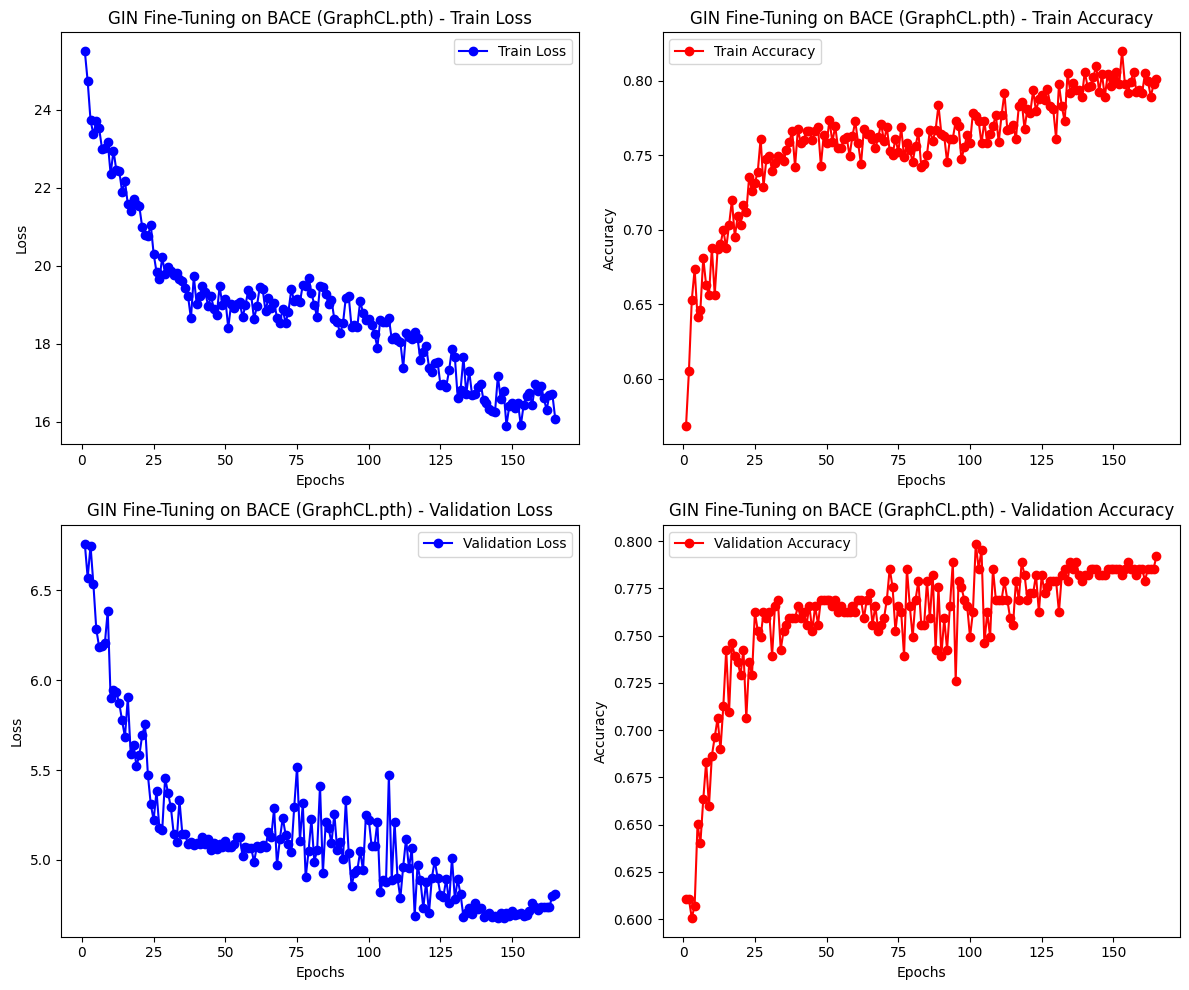

Evaluating model with Contextual.pth pretrained weights.
Loaded pretrained weights from pretrained_models/Contextual.pth
Epoch 0, Train Loss 25.2396, Train Accuracy 0.5876, Val Loss 6.5881, Val Accuracy 0.5941
Epoch 10, Train Loss 22.2160, Train Accuracy 0.6992, Val Loss 6.0872, Val Accuracy 0.6865
Epoch 20, Train Loss 20.3788, Train Accuracy 0.7331, Val Loss 5.4868, Val Accuracy 0.7426
Epoch 30, Train Loss 19.6851, Train Accuracy 0.7521, Val Loss 5.2468, Val Accuracy 0.7459
Epoch 40, Train Loss 18.9299, Train Accuracy 0.7570, Val Loss 5.1903, Val Accuracy 0.7459
Epoch 50, Train Loss 19.3102, Train Accuracy 0.7595, Val Loss 5.2116, Val Accuracy 0.7624
Epoch 60, Train Loss 18.7791, Train Accuracy 0.7636, Val Loss 5.2558, Val Accuracy 0.7459
Epoch 70, Train Loss 18.6066, Train Accuracy 0.7636, Val Loss 4.9848, Val Accuracy 0.7657
Epoch 80, Train Loss 19.2036, Train Accuracy 0.7570, Val Loss 5.5035, Val Accuracy 0.7360
Epoch 90, Train Loss 18.6527, Train Accuracy 0.7860, Val Loss 5.2651, 

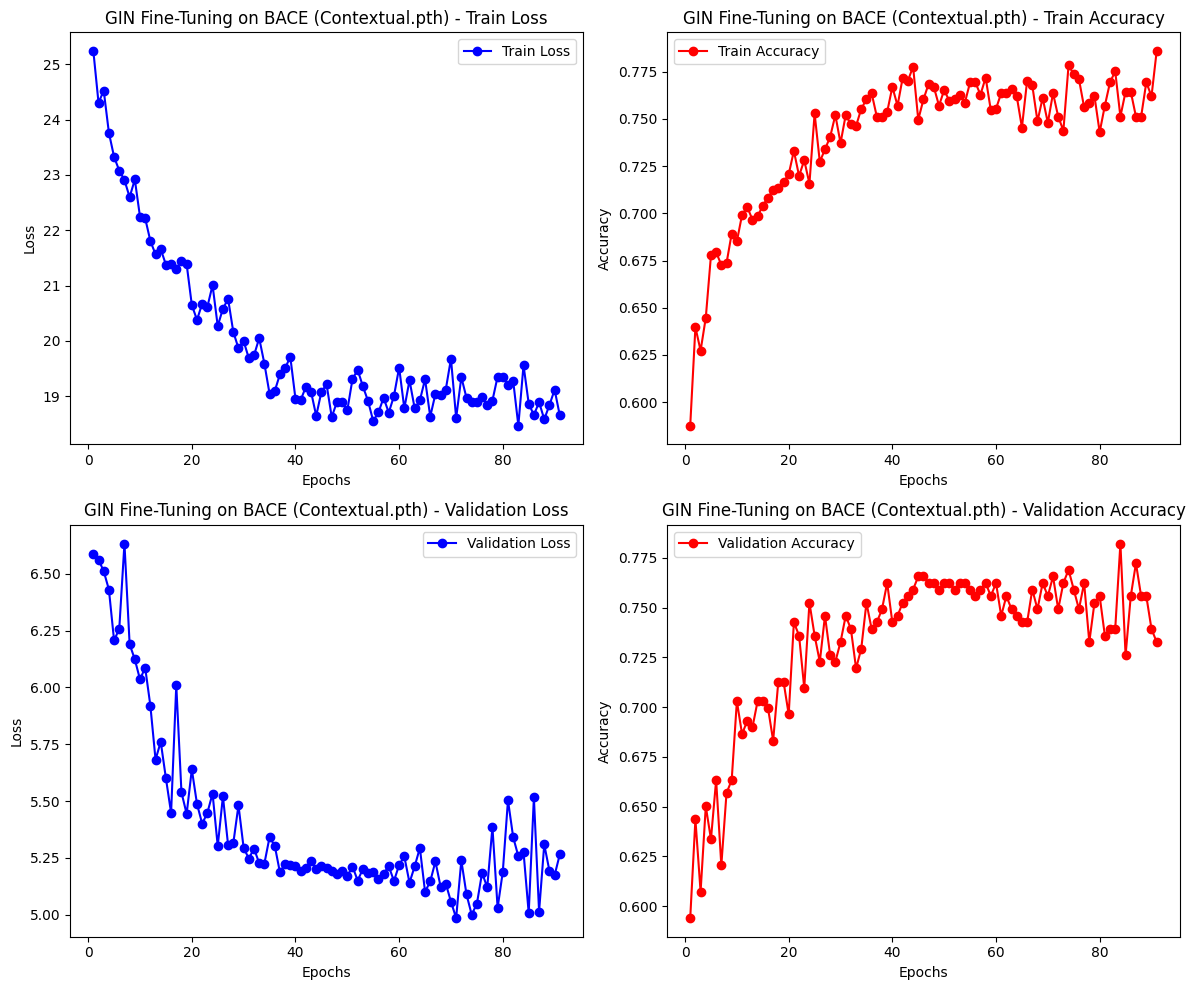

Evaluating model with Motif.pth pretrained weights.
Loaded pretrained weights from pretrained_models/Motif.pth
Epoch 0, Train Loss 25.4073, Train Accuracy 0.5793, Val Loss 6.6036, Val Accuracy 0.5941
Epoch 10, Train Loss 21.9455, Train Accuracy 0.7008, Val Loss 5.9650, Val Accuracy 0.6865
Epoch 20, Train Loss 21.1178, Train Accuracy 0.7074, Val Loss 5.5296, Val Accuracy 0.7195
Epoch 30, Train Loss 20.1150, Train Accuracy 0.7339, Val Loss 5.3413, Val Accuracy 0.7360
Epoch 40, Train Loss 18.7439, Train Accuracy 0.7636, Val Loss 5.2021, Val Accuracy 0.7492
Epoch 50, Train Loss 19.0358, Train Accuracy 0.7669, Val Loss 5.2005, Val Accuracy 0.7393
Epoch 60, Train Loss 19.3981, Train Accuracy 0.7430, Val Loss 5.1704, Val Accuracy 0.7426
Epoch 70, Train Loss 18.3422, Train Accuracy 0.7702, Val Loss 5.2502, Val Accuracy 0.7327
Epoch 80, Train Loss 19.4293, Train Accuracy 0.7521, Val Loss 5.1023, Val Accuracy 0.7492
Epoch 90, Train Loss 19.2550, Train Accuracy 0.7512, Val Loss 5.1283, Val Accura

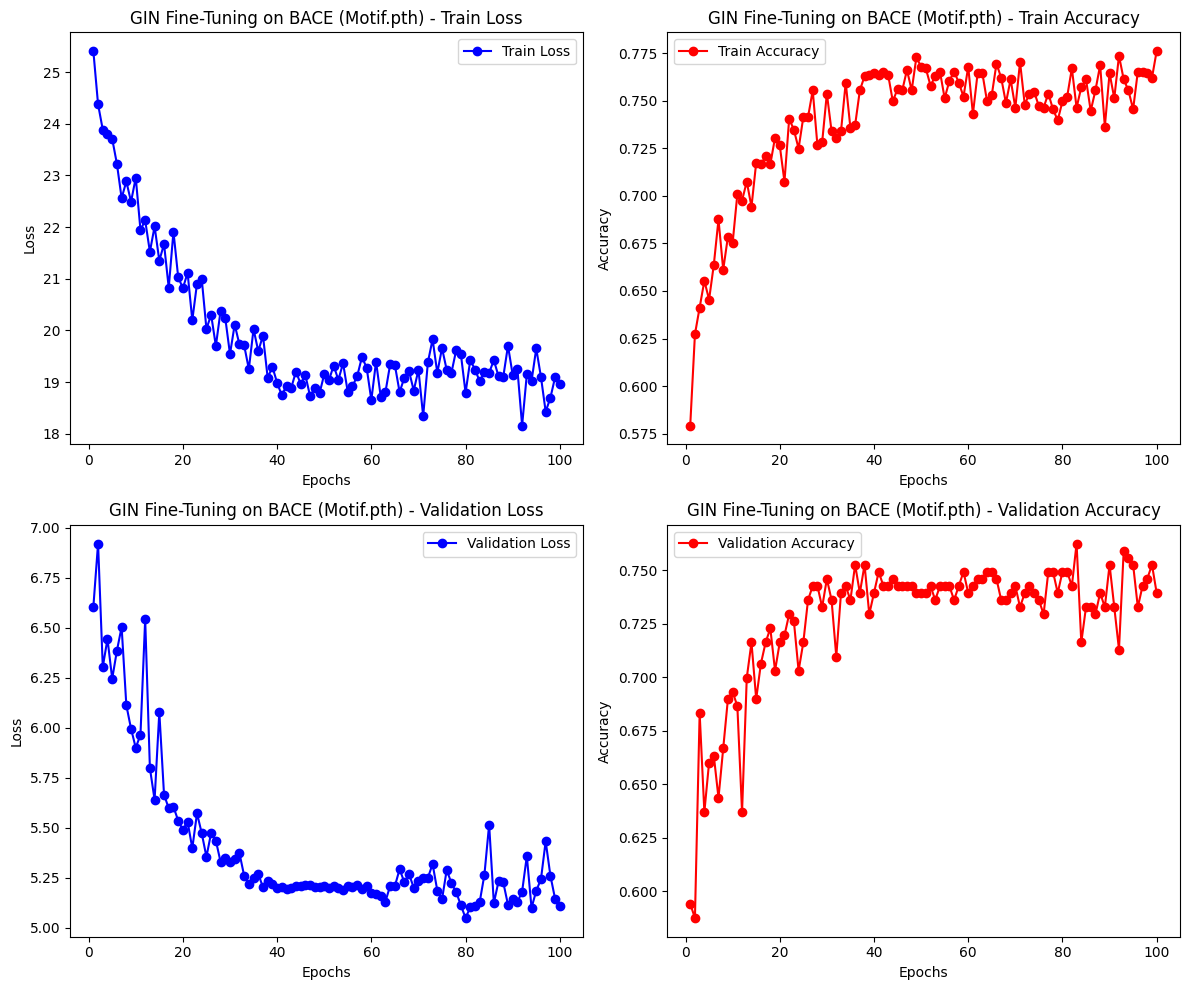

Evaluating model with GPT_TNN.pth pretrained weights.
Loaded pretrained weights from pretrained_models/GPT_TNN.pth
Epoch 0, Train Loss 25.5140, Train Accuracy 0.5612, Val Loss 6.7045, Val Accuracy 0.5974
Epoch 10, Train Loss 22.7814, Train Accuracy 0.6744, Val Loss 5.9220, Val Accuracy 0.6832
Epoch 20, Train Loss 21.4718, Train Accuracy 0.7066, Val Loss 5.3484, Val Accuracy 0.7294
Epoch 30, Train Loss 20.0476, Train Accuracy 0.7430, Val Loss 5.2224, Val Accuracy 0.7723
Epoch 40, Train Loss 18.5452, Train Accuracy 0.7570, Val Loss 5.1156, Val Accuracy 0.7492
Epoch 50, Train Loss 19.4761, Train Accuracy 0.7496, Val Loss 5.0645, Val Accuracy 0.7492
Epoch 60, Train Loss 19.0613, Train Accuracy 0.7612, Val Loss 5.0955, Val Accuracy 0.7591
Epoch 70, Train Loss 18.8285, Train Accuracy 0.7678, Val Loss 5.2103, Val Accuracy 0.7690
Epoch 80, Train Loss 19.2605, Train Accuracy 0.7554, Val Loss 5.1506, Val Accuracy 0.7756
Epoch 90, Train Loss 19.4991, Train Accuracy 0.7463, Val Loss 4.9234, Val Ac

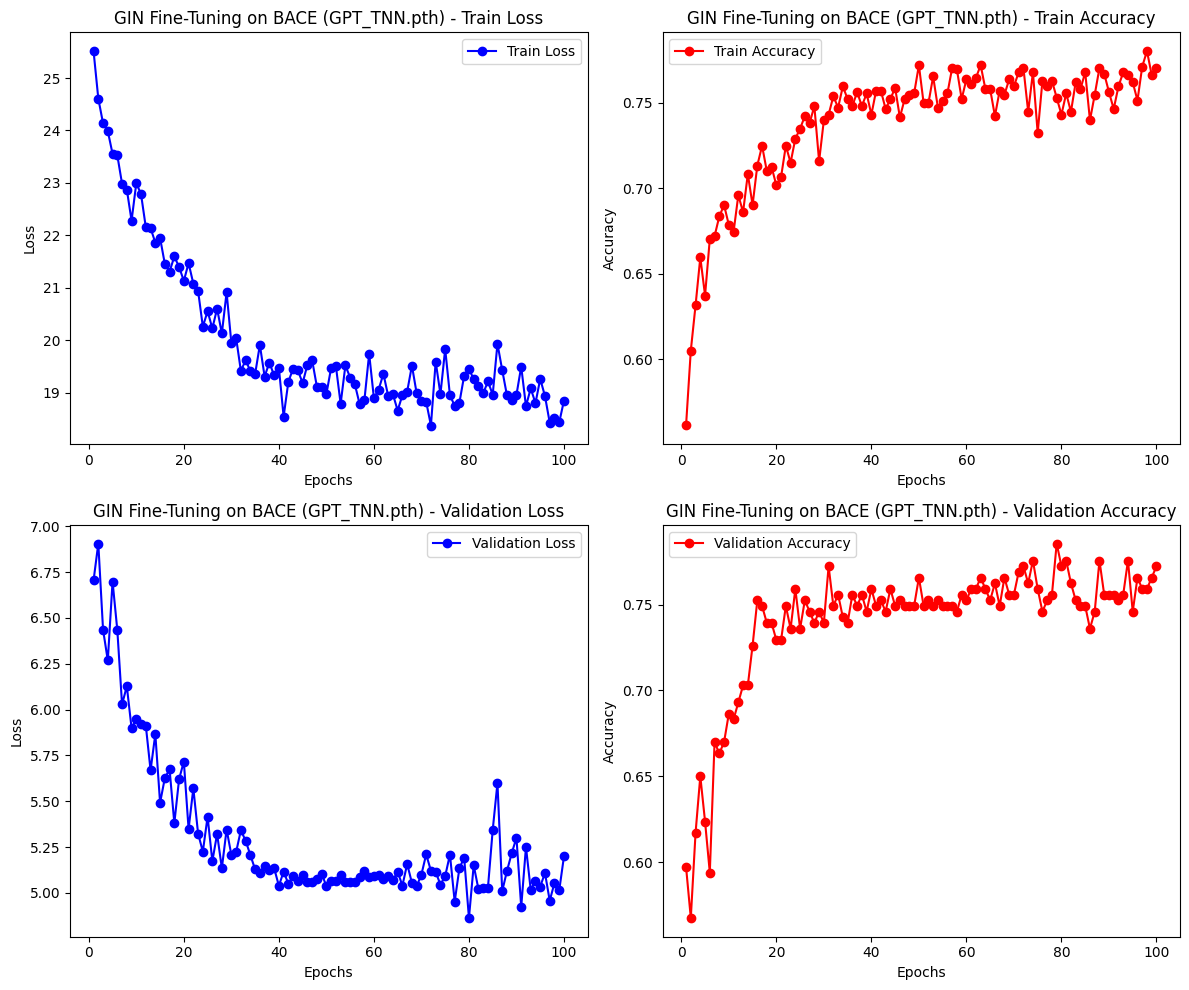

Evaluating model with CP.pth pretrained weights.
Loaded pretrained weights from pretrained_models/CP.pth
Epoch 0, Train Loss 25.2655, Train Accuracy 0.6033, Val Loss 6.8206, Val Accuracy 0.6271
Epoch 10, Train Loss 22.1942, Train Accuracy 0.6818, Val Loss 5.7941, Val Accuracy 0.6931
Epoch 20, Train Loss 20.5528, Train Accuracy 0.7248, Val Loss 5.4206, Val Accuracy 0.7393
Epoch 30, Train Loss 19.6842, Train Accuracy 0.7554, Val Loss 5.1403, Val Accuracy 0.7492
Epoch 40, Train Loss 19.0273, Train Accuracy 0.7562, Val Loss 5.1286, Val Accuracy 0.7492
Epoch 50, Train Loss 18.9916, Train Accuracy 0.7595, Val Loss 5.0690, Val Accuracy 0.7492
Epoch 60, Train Loss 18.5965, Train Accuracy 0.7669, Val Loss 5.0597, Val Accuracy 0.7591
Epoch 70, Train Loss 18.6682, Train Accuracy 0.7686, Val Loss 5.0781, Val Accuracy 0.7591
Epoch 80, Train Loss 18.6959, Train Accuracy 0.7661, Val Loss 5.4293, Val Accuracy 0.7393
Epoch 90, Train Loss 18.8575, Train Accuracy 0.7818, Val Loss 5.0060, Val Accuracy 0.7

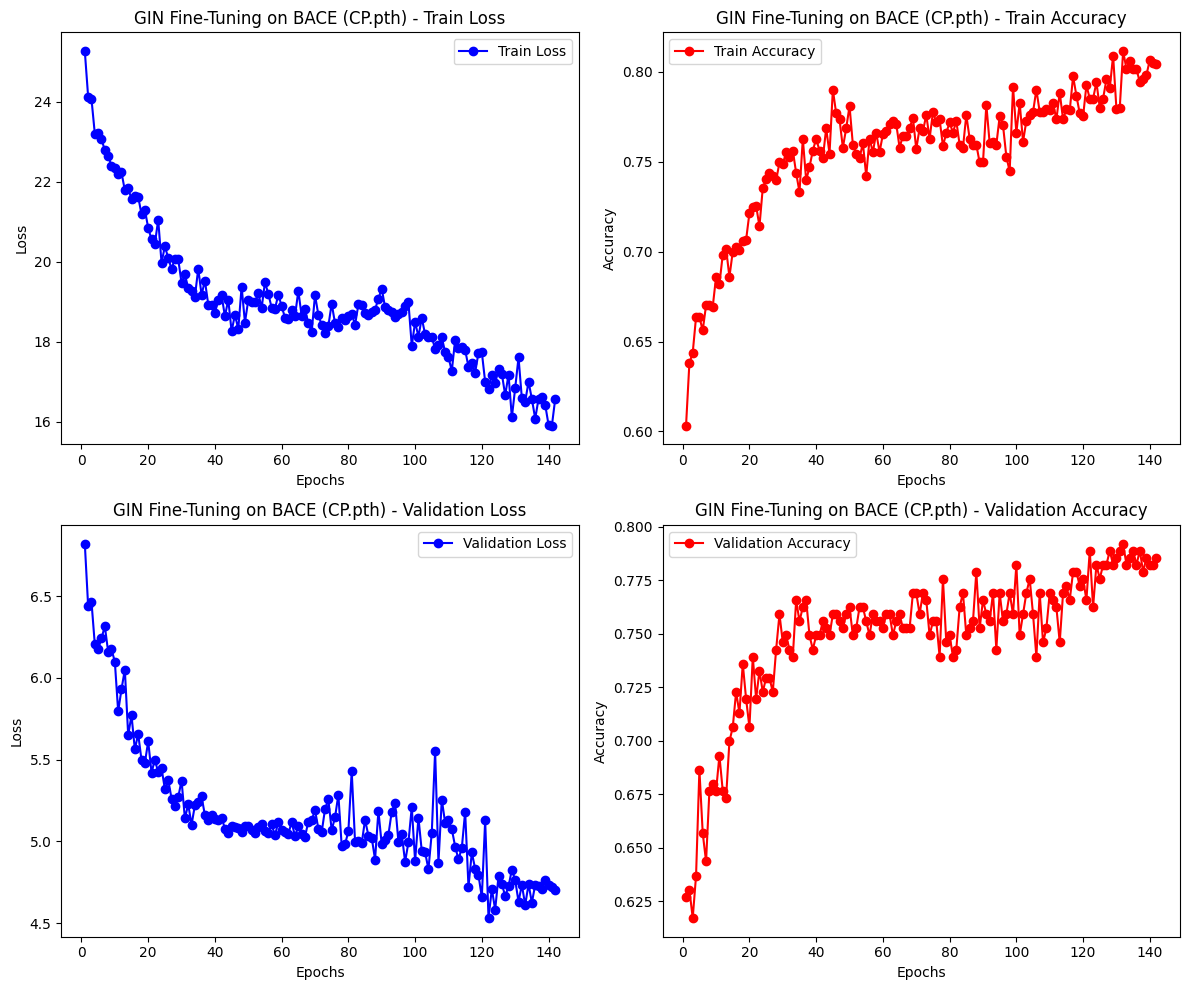

Evaluating model with IG.pth pretrained weights.
Loaded pretrained weights from pretrained_models/IG.pth
Epoch 0, Train Loss 25.3053, Train Accuracy 0.5802, Val Loss 6.6357, Val Accuracy 0.6238
Epoch 10, Train Loss 22.2724, Train Accuracy 0.6835, Val Loss 5.9748, Val Accuracy 0.6865
Epoch 20, Train Loss 20.6400, Train Accuracy 0.7322, Val Loss 5.2351, Val Accuracy 0.7426
Epoch 30, Train Loss 19.6631, Train Accuracy 0.7521, Val Loss 5.2124, Val Accuracy 0.7426
Epoch 40, Train Loss 18.7871, Train Accuracy 0.7653, Val Loss 5.1164, Val Accuracy 0.7558
Epoch 50, Train Loss 18.5463, Train Accuracy 0.7686, Val Loss 5.1339, Val Accuracy 0.7657
Epoch 60, Train Loss 18.7868, Train Accuracy 0.7620, Val Loss 5.1292, Val Accuracy 0.7624
Epoch 70, Train Loss 18.4105, Train Accuracy 0.7777, Val Loss 5.0488, Val Accuracy 0.7690
Epoch 80, Train Loss 18.7870, Train Accuracy 0.7595, Val Loss 5.0576, Val Accuracy 0.7591
Epoch 90, Train Loss 18.8452, Train Accuracy 0.7603, Val Loss 5.0915, Val Accuracy 0.7

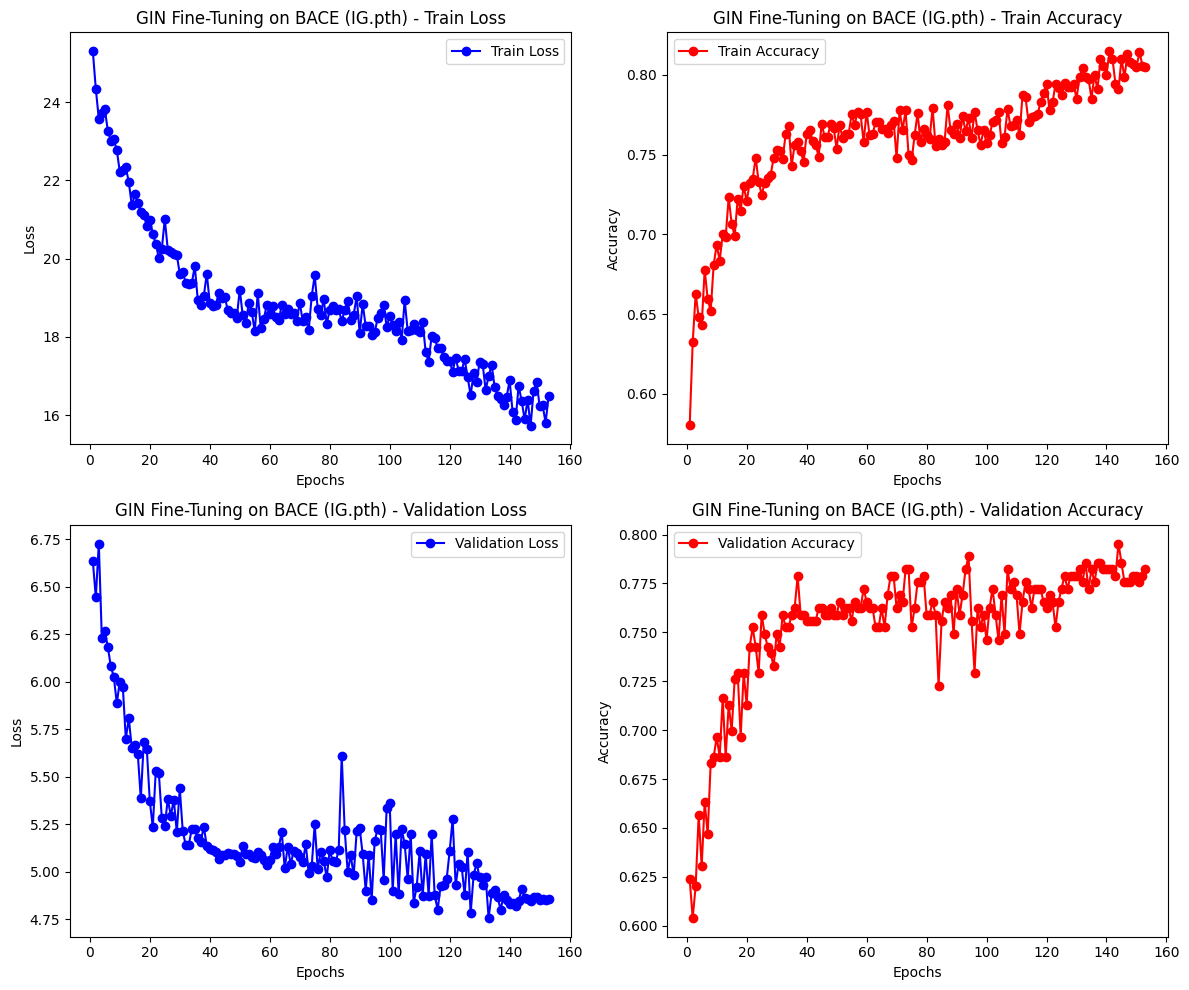

Evaluating model with AM.pth pretrained weights.
Loaded pretrained weights from pretrained_models/AM.pth
Epoch 0, Train Loss 25.1911, Train Accuracy 0.5810, Val Loss 6.7956, Val Accuracy 0.6007
Epoch 10, Train Loss 22.5145, Train Accuracy 0.6760, Val Loss 5.8459, Val Accuracy 0.7162
Epoch 20, Train Loss 20.7147, Train Accuracy 0.7223, Val Loss 5.4739, Val Accuracy 0.7492
Epoch 30, Train Loss 20.0421, Train Accuracy 0.7372, Val Loss 5.1661, Val Accuracy 0.7459
Epoch 40, Train Loss 19.1874, Train Accuracy 0.7595, Val Loss 5.2452, Val Accuracy 0.7525
Early stopping triggered


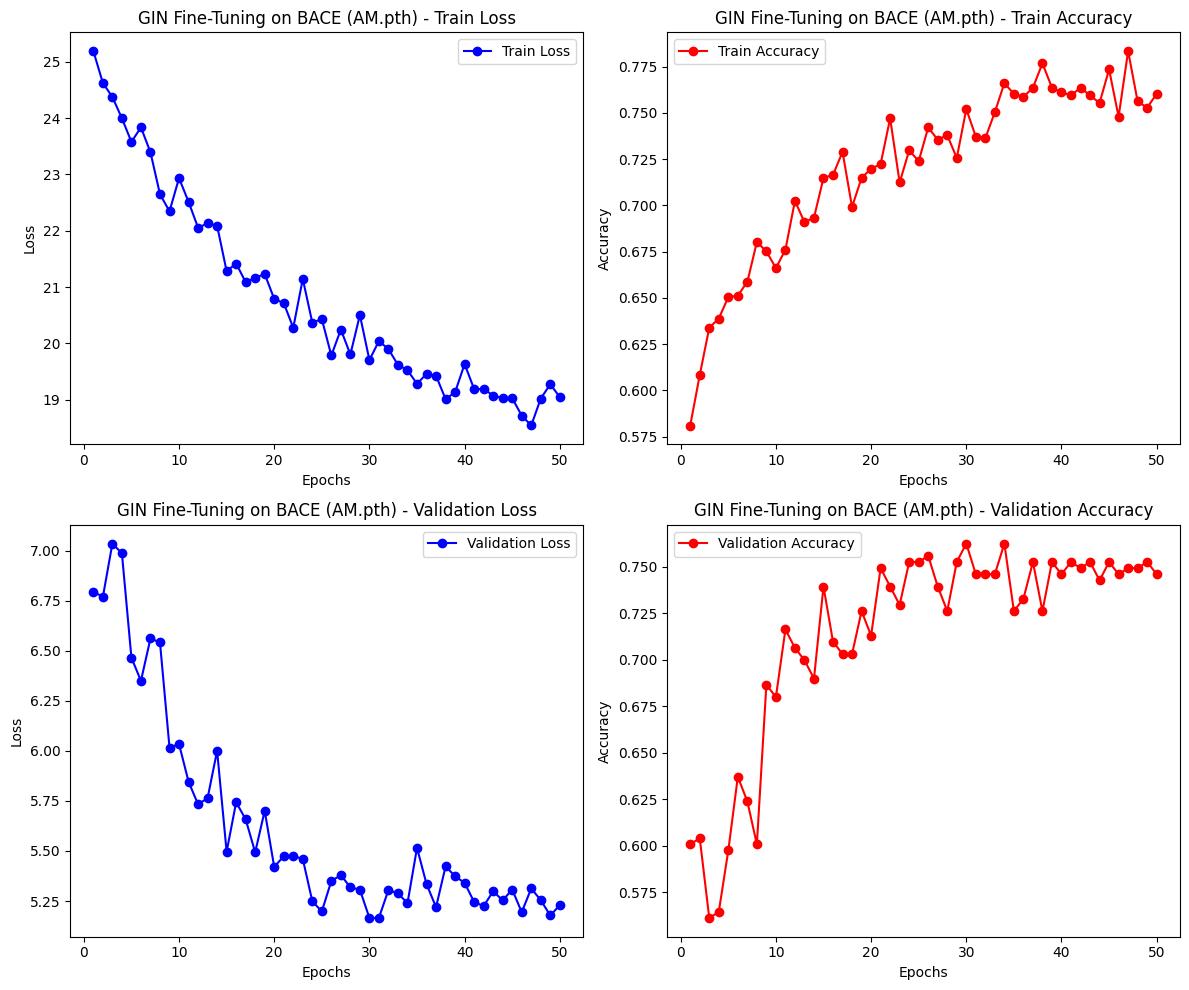

Evaluating model with EP.pth pretrained weights.
Loaded pretrained weights from pretrained_models/EP.pth
Epoch 0, Train Loss 25.3468, Train Accuracy 0.5983, Val Loss 6.8660, Val Accuracy 0.5875
Epoch 10, Train Loss 21.8654, Train Accuracy 0.7107, Val Loss 6.1129, Val Accuracy 0.6766
Epoch 20, Train Loss 20.8467, Train Accuracy 0.7207, Val Loss 5.5761, Val Accuracy 0.7195
Epoch 30, Train Loss 20.1044, Train Accuracy 0.7438, Val Loss 5.1474, Val Accuracy 0.7657
Epoch 40, Train Loss 18.8872, Train Accuracy 0.7661, Val Loss 5.2031, Val Accuracy 0.7558
Epoch 50, Train Loss 18.7110, Train Accuracy 0.7645, Val Loss 5.1777, Val Accuracy 0.7558
Epoch 60, Train Loss 19.2335, Train Accuracy 0.7636, Val Loss 5.1838, Val Accuracy 0.7558
Epoch 70, Train Loss 18.7052, Train Accuracy 0.7669, Val Loss 5.0346, Val Accuracy 0.7624
Epoch 80, Train Loss 18.8742, Train Accuracy 0.7554, Val Loss 5.0744, Val Accuracy 0.7558
Epoch 90, Train Loss 18.5943, Train Accuracy 0.7694, Val Loss 5.1914, Val Accuracy 0.7

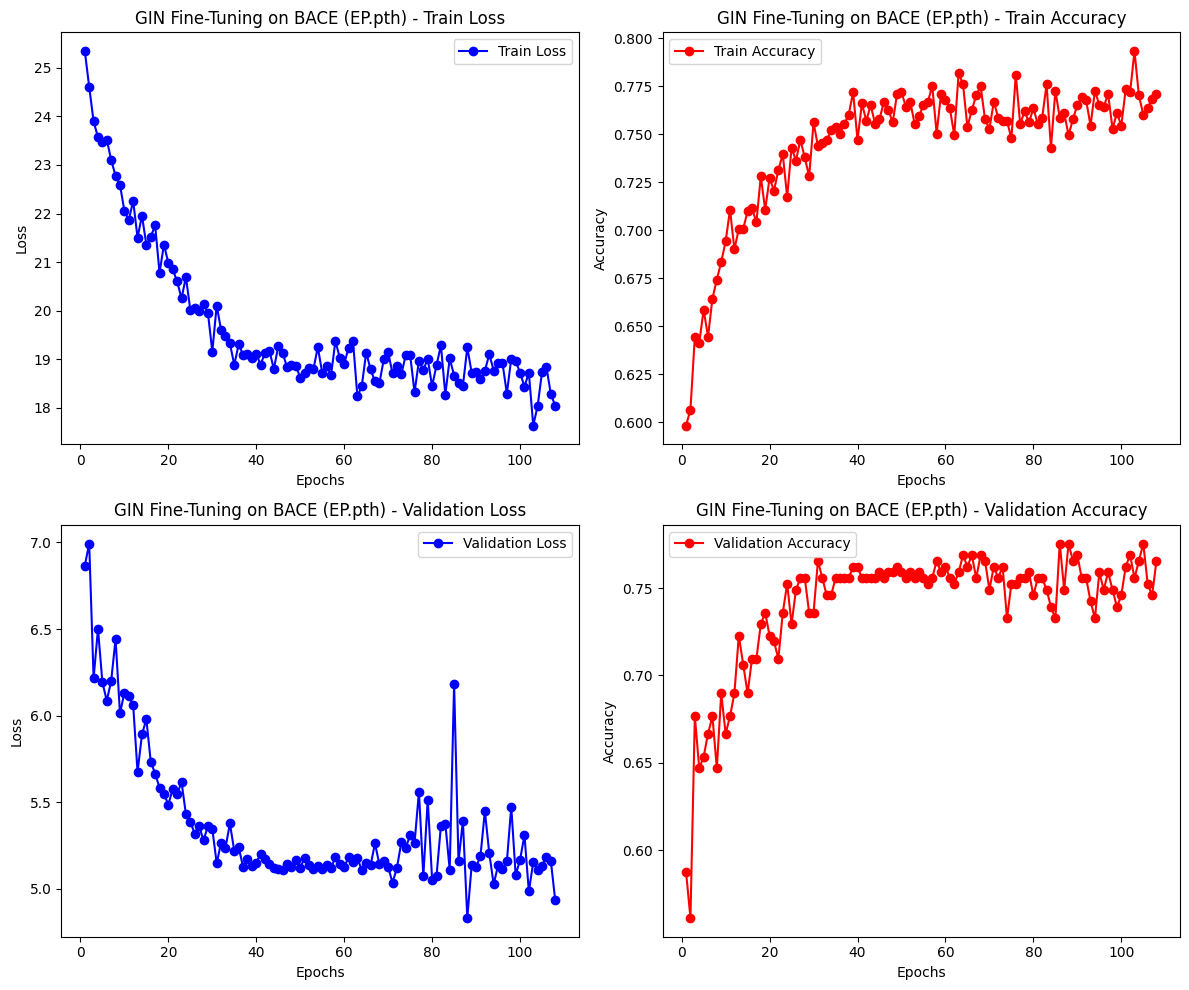

Results for GraphCL.pth:
  Final Training Loss: 16.0840
  Final Training Accuracy: 0.8008
  Final Validation Loss: 4.8082
  Final Validation Accuracy: 0.7921
Results for Contextual.pth:
  Final Training Loss: 18.6527
  Final Training Accuracy: 0.7860
  Final Validation Loss: 5.2651
  Final Validation Accuracy: 0.7327
Results for Motif.pth:
  Final Training Loss: 18.9712
  Final Training Accuracy: 0.7760
  Final Validation Loss: 5.1101
  Final Validation Accuracy: 0.7393
Results for GPT_TNN.pth:
  Final Training Loss: 18.8522
  Final Training Accuracy: 0.7702
  Final Validation Loss: 5.1996
  Final Validation Accuracy: 0.7723
Results for CP.pth:
  Final Training Loss: 16.5668
  Final Training Accuracy: 0.8041
  Final Validation Loss: 4.7009
  Final Validation Accuracy: 0.7855
Results for IG.pth:
  Final Training Loss: 16.4802
  Final Training Accuracy: 0.8050
  Final Validation Loss: 4.8580
  Final Validation Accuracy: 0.7822
Results for AM.pth:
  Final Training Loss: 19.0465
  Final Tr

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
from torch_geometric.datasets import MoleculeNet
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingLR

# Set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

# Load MoleculeNet BACE dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='BACE')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define GIN model
class GIN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GIN, self).__init__()
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GINConv(nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels)))
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.conv3(x, edge_index)))
        x = global_mean_pool(x, batch)  # pooling within graph
        x = self.fc(x)
        return torch.sigmoid(x)

# Function to load pretrained weights
def load_pretrained_weights(model, weight_path):
    pretrained_state_dict = torch.load(weight_path, map_location=device)
    model_state_dict = model.state_dict()
    for name, param in pretrained_state_dict.items():
        if 'generator' in name:
            continue
        if isinstance(param, torch.nn.Parameter):
            param = param.data
        if name in model_state_dict:  # Ensure the parameter exists in the model
            model_state_dict[name].copy_(param)
    model.load_state_dict(model_state_dict, strict=False)  # Allow partial load
    print(f"Loaded pretrained weights from {weight_path}")

# Function to freeze initial layers
def freeze_initial_layers(model, unfreeze_from=None):
    for name, param in model.named_parameters():
        if unfreeze_from and unfreeze_from in name:
            break
        param.requires_grad = False

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, scheduler=None, num_epochs=200, early_stopping_patience=20):
    best_val_loss = float('inf')
    patience_counter = 0

    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for data in train_loader:
            optimizer.zero_grad()
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = torch.round(out)
            total += data.y.size(0)
            correct += (predicted == data.y.view(-1, 1)).sum().item()

        accuracy = correct / total
        loss_history.append(total_loss)
        accuracy_history.append(accuracy)
        if scheduler:
            scheduler.step()

        # Validation step
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in val_loader:
                data = data.to(device)
                out = model(data)
                loss = criterion(out, data.y.view(-1, 1).to(torch.float32))
                val_loss += loss.item()
                predicted = torch.round(out)
                val_total += data.y.size(0)
                val_correct += (predicted == data.y.view(-1, 1)).sum().item()

        val_accuracy = val_correct / val_total
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss {total_loss:.4f}, Train Accuracy {accuracy:.4f}, Val Loss {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

def plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, title):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss_history, 'bo-', label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Train Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy_history, 'ro-', label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Train Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_loss_history, 'bo-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_accuracy_history, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=random_seed)

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize optimizer and criterion
criterion = nn.BCELoss()

# Dictionary to store results for each model
results = {}

# Pretrained weight paths
pretrained_weights_paths = {
    "GraphCL.pth": "pretrained_models/GraphCL.pth",
    "Contextual.pth": "pretrained_models/Contextual.pth",
    "Motif.pth": "pretrained_models/Motif.pth",
    "GPT_TNN.pth": "pretrained_models/GPT_TNN.pth",
    "CP.pth": "pretrained_models/CP.pth",
    "IG.pth": "pretrained_models/IG.pth",
    "AM.pth": "pretrained_models/AM.pth",
    "EP.pth": "pretrained_models/EP.pth"
}

for model_name, weight_path in pretrained_weights_paths.items():
    print(f"Evaluating model with {model_name} pretrained weights.")

    # Initialize the model
    model = GIN(dataset.num_features, 128, 1).to(device)

    # Load pretrained weights
    load_pretrained_weights(model, weight_path)

    # Freeze initial layers (if needed)
    freeze_initial_layers(model, unfreeze_from="conv2")

    # Initialize optimizer and scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6)

    # Train and evaluate the model
    loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=200
    )

    # Store results
    results[model_name] = {
        "train_loss": loss_history,
        "train_accuracy": accuracy_history,
        "val_loss": val_loss_history,
        "val_accuracy": val_accuracy_history
    }

    # Plotting the training and validation metrics
    plot_metrics(loss_history, accuracy_history, val_loss_history, val_accuracy_history, f'GIN Fine-Tuning on BACE ({model_name})')

# Summarize and compare results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Final Training Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")
